<img src=http://www.acofi.edu.co/eiei2016/wp-content/uploads/2016/09/Logo-Universidad-ICESI.jpg width="300" height="200" align="center">

#<big><big>Operaciones I</big></big><br><small>FIDCA</small><br><small>_PBL II_ (INVENTORY MANAGEMENT). </small></small><br><small>Geoffrey Pasaje  A00380495 . </small></small><br><small>Josué Manuel Ñañez  A00395928 . </small></small><br><small>Juan José Ramírez  A00394509 . </small>

##*Despliegue para seleccionar el apartado que desee:*



---



#DESARROLLO

#***Clasificación ABC de SKUS***

# Organizar Data Base

In [ ]:
import numpy as np
import pandas as pd
import io
#Se importan las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Operaciones I/Base de datos/Datos Ope1 Team 3 (1).xlsx")

In [ ]:
data

,Tipo,Familias,SKUS,Cargo de Mantener una unidad en un año,Rentabilidad,Total Demanda,Promedio semana,Desv. Estándar,Cv,Costo unitario,Costo Ordenar,Tasa Pdn (unid por semana)
0,compra y venta,Familia 1,SKU 1,0.18,0.18,100571.0,1117.455556,548.693672,0.491021,26478.0,3415860.0,NaN
1,compra y venta,NaN,SKU 2,0.18,0.25,108196.0,1202.177778,598.309990,0.497688,35621.0,5124610.0,NaN
2,compra y venta,NaN,SKU 3,0.18,0.22,106396.0,1182.177778,603.645267,0.510621,40218.0,2471600.0,NaN
3,Manufacturado,Familia 2,SKU 4,0.26,0.26,131526.0,1461.400000,274.140774,0.187588,64570.0,3451200.0,1800.0
4,Manufacturado,NaN,SKU 5,0.26,0.25,128338.0,1425.977778,253.785275,0.177973,56478.0,4023600.0,2000.0
5,Manufacturado,NaN,SKU 6,0.26,0.3,131255.0,1458.388889,281.232548,0.192838,34867.0,3845650.0,1700.0
6,compra y venta,Familia 3,SKU 7,0.20,0.15,120159.0,1335.100000,456.989761,0.342289,56416.0,6451870.0,NaN
7,compra y venta,NaN,SKU 8,0.20,0.21,123184.0,1368.711111,501.595393,0.366473,64179.0,4781900.0,NaN
8,compra y venta,NaN,SKU 9,0.20,0.25,120719.0,1341.322222,413.133431,0.308005,42351.0,2345640.0,NaN
9,Manufacturado,Familia 4,SKU 10,0.25,0.28,113177.0,1257.522222,434.914669,0.345850,62415.0,7845000.0,1500.0


In [ ]:
data.columns

Index(['Tipo', 'Familias', 'SKUS', 'Cargo de Mantener una unidad en un año',
       'Rentabilidad', 'Total Demanda', 'Promedio semana', 'Desv. Estándar',
       'Cv', 'Costo unitario ', 'Costo Ordenar', 'Tasa Pdn (unid por semana)'],
      dtype='object')

In [ ]:
data = data.drop([12,13,14])

In [ ]:
data.shape

(12, 12)

# Clasificación ABC - Ventas

## Clasificación ABC costo unitario (Demanda x costo)


In [ ]:
dataSubset = data[["SKUS",'Total Demanda','Costo unitario ']]

In [ ]:
dataSubset

,SKUS,Total Demanda,Costo unitario
0,SKU 1,100571.0,26478.0
1,SKU 2,108196.0,35621.0
2,SKU 3,106396.0,40218.0
3,SKU 4,131526.0,64570.0
4,SKU 5,128338.0,56478.0
5,SKU 6,131255.0,34867.0
6,SKU 7,120159.0,56416.0
7,SKU 8,123184.0,64179.0
8,SKU 9,120719.0,42351.0
9,SKU 10,113177.0,62415.0


In [ ]:
dataSubset["Valor Total costos por sku"] = dataSubset["Total Demanda"] * dataSubset['Costo unitario ']

<ipython-input-5641-ed143b097362>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataSubset["Valor Total costos por sku"] = dataSubset["Total Demanda"] * dataSubset['Costo unitario ']


In [ ]:
dataSubset = dataSubset.sort_values(by='Valor Total costos por sku', ascending=False)

In [ ]:
totalCosts = dataSubset["Valor Total costos por sku"].sum()
totalCosts

64651600203.0

In [ ]:
dataSubset

,SKUS,Total Demanda,Costo unitario,Valor Total costos por sku
3,SKU 4,131526.0,64570.0,8.492634e+09
7,SKU 8,123184.0,64179.0,7.905826e+09
4,SKU 5,128338.0,56478.0,7.248274e+09
9,SKU 10,113177.0,62415.0,7.063942e+09
6,SKU 7,120159.0,56416.0,6.778890e+09
8,SKU 9,120719.0,42351.0,5.112570e+09
5,SKU 6,131255.0,34867.0,4.576468e+09
2,SKU 3,106396.0,40218.0,4.279034e+09
10,SKU 11,112246.0,35468.0,3.981141e+09
1,SKU 2,108196.0,35621.0,3.854050e+09


In [ ]:
dataSubset["Costos Acumuludos"] = dataSubset["Valor Total costos por sku"].cumsum()

In [ ]:
dataSubset

,SKUS,Total Demanda,Costo unitario,Valor Total costos por sku,Costos Acumuludos
3,SKU 4,131526.0,64570.0,8.492634e+09,8.492634e+09
7,SKU 8,123184.0,64179.0,7.905826e+09,1.639846e+10
4,SKU 5,128338.0,56478.0,7.248274e+09,2.364673e+10
9,SKU 10,113177.0,62415.0,7.063942e+09,3.071068e+10
6,SKU 7,120159.0,56416.0,6.778890e+09,3.748957e+10
8,SKU 9,120719.0,42351.0,5.112570e+09,4.260214e+10
5,SKU 6,131255.0,34867.0,4.576468e+09,4.717860e+10
2,SKU 3,106396.0,40218.0,4.279034e+09,5.145764e+10
10,SKU 11,112246.0,35468.0,3.981141e+09,5.543878e+10
1,SKU 2,108196.0,35621.0,3.854050e+09,5.929283e+10


In [ ]:
dataSubset["Porcentaje de costos acumulados"] = dataSubset['Costos Acumuludos'] / totalCosts

In [ ]:
dataSubset

,SKUS,Total Demanda,Costo unitario,Valor Total costos por sku,Costos Acumuludos,Porcentaje de costos acumulados
3,SKU 4,131526.0,64570.0,8.492634e+09,8.492634e+09,0.131360
7,SKU 8,123184.0,64179.0,7.905826e+09,1.639846e+10,0.253644
4,SKU 5,128338.0,56478.0,7.248274e+09,2.364673e+10,0.365756
9,SKU 10,113177.0,62415.0,7.063942e+09,3.071068e+10,0.475018
6,SKU 7,120159.0,56416.0,6.778890e+09,3.748957e+10,0.579871
8,SKU 9,120719.0,42351.0,5.112570e+09,4.260214e+10,0.658949
5,SKU 6,131255.0,34867.0,4.576468e+09,4.717860e+10,0.729736
2,SKU 3,106396.0,40218.0,4.279034e+09,5.145764e+10,0.795922
10,SKU 11,112246.0,35468.0,3.981141e+09,5.543878e+10,0.857501
1,SKU 2,108196.0,35621.0,3.854050e+09,5.929283e+10,0.917113


In [ ]:
def ABC(cumPer):
    if cumPer >= 0 and cumPer < 0.50:
        return 'A'
    elif cumPer >= 0.50 and cumPer <= 0.90:
        return 'B'
    elif cumPer > 0.90:
        return 'C'

In [ ]:
dataSubset['Class'] = dataSubset['Porcentaje de costos acumulados'].apply(ABC)

In [ ]:
dataSubset

,SKUS,Total Demanda,Costo unitario,Valor Total costos por sku,Costos Acumuludos,Porcentaje de costos acumulados,Class
3,SKU 4,131526.0,64570.0,8.492634e+09,8.492634e+09,0.131360,A
7,SKU 8,123184.0,64179.0,7.905826e+09,1.639846e+10,0.253644,A
4,SKU 5,128338.0,56478.0,7.248274e+09,2.364673e+10,0.365756,A
9,SKU 10,113177.0,62415.0,7.063942e+09,3.071068e+10,0.475018,A
6,SKU 7,120159.0,56416.0,6.778890e+09,3.748957e+10,0.579871,B
8,SKU 9,120719.0,42351.0,5.112570e+09,4.260214e+10,0.658949,B
5,SKU 6,131255.0,34867.0,4.576468e+09,4.717860e+10,0.729736,B
2,SKU 3,106396.0,40218.0,4.279034e+09,5.145764e+10,0.795922,B
10,SKU 11,112246.0,35468.0,3.981141e+09,5.543878e+10,0.857501,B
1,SKU 2,108196.0,35621.0,3.854050e+09,5.929283e+10,0.917113,C


## Clasificación ABC ventas (Precio x Demanda)

In [ ]:
data

,Tipo,Familias,SKUS,Cargo de Mantener una unidad en un año,Rentabilidad,Total Demanda,Promedio semana,Desv. Estándar,Cv,Costo unitario,Costo Ordenar,Tasa Pdn (unid por semana)
0,compra y venta,Familia 1,SKU 1,0.18,0.18,100571.0,1117.455556,548.693672,0.491021,26478.0,3415860.0,NaN
1,compra y venta,NaN,SKU 2,0.18,0.25,108196.0,1202.177778,598.309990,0.497688,35621.0,5124610.0,NaN
2,compra y venta,NaN,SKU 3,0.18,0.22,106396.0,1182.177778,603.645267,0.510621,40218.0,2471600.0,NaN
3,Manufacturado,Familia 2,SKU 4,0.26,0.26,131526.0,1461.400000,274.140774,0.187588,64570.0,3451200.0,1800.0
4,Manufacturado,NaN,SKU 5,0.26,0.25,128338.0,1425.977778,253.785275,0.177973,56478.0,4023600.0,2000.0
5,Manufacturado,NaN,SKU 6,0.26,0.3,131255.0,1458.388889,281.232548,0.192838,34867.0,3845650.0,1700.0
6,compra y venta,Familia 3,SKU 7,0.20,0.15,120159.0,1335.100000,456.989761,0.342289,56416.0,6451870.0,NaN
7,compra y venta,NaN,SKU 8,0.20,0.21,123184.0,1368.711111,501.595393,0.366473,64179.0,4781900.0,NaN
8,compra y venta,NaN,SKU 9,0.20,0.25,120719.0,1341.322222,413.133431,0.308005,42351.0,2345640.0,NaN
9,Manufacturado,Familia 4,SKU 10,0.25,0.28,113177.0,1257.522222,434.914669,0.345850,62415.0,7845000.0,1500.0


In [ ]:
dataSub = data[["SKUS",'Total Demanda','Costo unitario ',"Rentabilidad" ]]

In [ ]:
dataSub["Precio"] =  data['Costo unitario '] * data["Rentabilidad"] +  data['Costo unitario ']

<ipython-input-5654-1a4cc0e08882>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataSub["Precio"] =  data['Costo unitario '] * data["Rentabilidad"] +  data['Costo unitario ']


In [ ]:
dataSub = dataSub.sort_values(by="Precio", ascending=False)

In [ ]:
totalPrecios = dataSub["Precio"].sum()
totalPrecios

673714.1900000002

In [ ]:
dataSub["Precios Acumulados"] = dataSub["Precio"].cumsum()

In [ ]:
dataSub

,SKUS,Total Demanda,Costo unitario,Rentabilidad,Precio,Precios Acumulados
3,SKU 4,131526.0,64570.0,0.26,81358.2,81358.2
9,SKU 10,113177.0,62415.0,0.28,79891.2,161249.4
7,SKU 8,123184.0,64179.0,0.21,77656.59,238905.99
4,SKU 5,128338.0,56478.0,0.25,70597.5,309503.49
6,SKU 7,120159.0,56416.0,0.15,64878.4,374381.89
8,SKU 9,120719.0,42351.0,0.25,52938.75,427320.64
2,SKU 3,106396.0,40218.0,0.22,49065.96,476386.6
10,SKU 11,112246.0,35468.0,0.3,46108.4,522495.0
5,SKU 6,131255.0,34867.0,0.3,45327.1,567822.1
1,SKU 2,108196.0,35621.0,0.25,44526.25,612348.35


In [ ]:
# Calcular el porcentaje de contribución de cada SKU al total de costo
dataSub['Porcentaje Contribución'] = (dataSub['Precios Acumulados'] / totalPrecios )

In [ ]:
dataSub = dataSub.sort_values(by='Precios Acumulados', ascending=True)
dataSub

,SKUS,Total Demanda,Costo unitario,Rentabilidad,Precio,Precios Acumulados,Porcentaje Contribución
3,SKU 4,131526.0,64570.0,0.26,81358.2,81358.2,0.120761
9,SKU 10,113177.0,62415.0,0.28,79891.2,161249.4,0.239344
7,SKU 8,123184.0,64179.0,0.21,77656.59,238905.99,0.35461
4,SKU 5,128338.0,56478.0,0.25,70597.5,309503.49,0.459399
6,SKU 7,120159.0,56416.0,0.15,64878.4,374381.89,0.555698
8,SKU 9,120719.0,42351.0,0.25,52938.75,427320.64,0.634276
2,SKU 3,106396.0,40218.0,0.22,49065.96,476386.6,0.707105
10,SKU 11,112246.0,35468.0,0.3,46108.4,522495.0,0.775544
5,SKU 6,131255.0,34867.0,0.3,45327.1,567822.1,0.842823
1,SKU 2,108196.0,35621.0,0.25,44526.25,612348.35,0.908914


In [ ]:
dataSub['Class'] = dataSub['Porcentaje Contribución'].apply(ABC)

In [ ]:
dataSub

,SKUS,Total Demanda,Costo unitario,Rentabilidad,Precio,Precios Acumulados,Porcentaje Contribución,Class
3,SKU 4,131526.0,64570.0,0.26,81358.2,81358.2,0.120761,A
9,SKU 10,113177.0,62415.0,0.28,79891.2,161249.4,0.239344,A
7,SKU 8,123184.0,64179.0,0.21,77656.59,238905.99,0.35461,A
4,SKU 5,128338.0,56478.0,0.25,70597.5,309503.49,0.459399,A
6,SKU 7,120159.0,56416.0,0.15,64878.4,374381.89,0.555698,B
8,SKU 9,120719.0,42351.0,0.25,52938.75,427320.64,0.634276,B
2,SKU 3,106396.0,40218.0,0.22,49065.96,476386.6,0.707105,B
10,SKU 11,112246.0,35468.0,0.3,46108.4,522495.0,0.775544,B
5,SKU 6,131255.0,34867.0,0.3,45327.1,567822.1,0.842823,B
1,SKU 2,108196.0,35621.0,0.25,44526.25,612348.35,0.908914,C


## Clasificación ABC margen (Ganancia x Demanda)

In [ ]:
dataSub2 = data[["SKUS",'Total Demanda','Costo unitario ',"Rentabilidad" ]]

In [ ]:
dataSub2["Margen total acumulado por sku"] =  data['Costo unitario '] * data["Rentabilidad"] * data['Total Demanda']

<ipython-input-5664-ae5e82fb92d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataSub2["Margen total acumulado por sku"] =  data['Costo unitario '] * data["Rentabilidad"] * data['Total Demanda']


In [ ]:
totalMargen = dataSub2["Margen total acumulado por sku"].sum()
totalMargen

15497852164.31

In [ ]:
dataSub2 = dataSub2.sort_values(by="Margen total acumulado por sku", ascending=False)

In [ ]:
dataSub2

,SKUS,Total Demanda,Costo unitario,Rentabilidad,Margen total acumulado por sku
3,SKU 4,131526.0,64570.0,0.26,2208084793.2
9,SKU 10,113177.0,62415.0,0.28,1977903887.4
4,SKU 5,128338.0,56478.0,0.25,1812068391.0
7,SKU 8,123184.0,64179.0,0.21,1660223446.56
5,SKU 6,131255.0,34867.0,0.3,1372940425.5
8,SKU 9,120719.0,42351.0,0.25,1278142592.25
10,SKU 11,112246.0,35468.0,0.3,1194342338.4
6,SKU 7,120159.0,56416.0,0.15,1016833521.6
1,SKU 2,108196.0,35621.0,0.25,963512429.0
2,SKU 3,106396.0,40218.0,0.22,941387552.16


In [ ]:
dataSub2["Margenes acumulados"] = dataSub2["Margen total acumulado por sku"].cumsum()

In [ ]:
dataSub2

,SKUS,Total Demanda,Costo unitario,Rentabilidad,Margen total acumulado por sku,Margenes acumulados
3,SKU 4,131526.0,64570.0,0.26,2208084793.2,2208084793.2
9,SKU 10,113177.0,62415.0,0.28,1977903887.4,4185988680.6
4,SKU 5,128338.0,56478.0,0.25,1812068391.0,5998057071.6
7,SKU 8,123184.0,64179.0,0.21,1660223446.56,7658280518.16
5,SKU 6,131255.0,34867.0,0.3,1372940425.5,9031220943.66
8,SKU 9,120719.0,42351.0,0.25,1278142592.25,10309363535.91
10,SKU 11,112246.0,35468.0,0.3,1194342338.4,11503705874.309999
6,SKU 7,120159.0,56416.0,0.15,1016833521.6,12520539395.91
1,SKU 2,108196.0,35621.0,0.25,963512429.0,13484051824.91
2,SKU 3,106396.0,40218.0,0.22,941387552.16,14425439377.07


In [ ]:
# Calcular el porcentaje de contribución de cada SKU al total de costo
dataSub2['Porcentaje Contribución'] = (dataSub2['Margenes acumulados'] / totalMargen )

In [ ]:
dataSub2['Class'] = dataSub2['Porcentaje Contribución'].apply(ABC)

In [ ]:
dataSub2

,SKUS,Total Demanda,Costo unitario,Rentabilidad,Margen total acumulado por sku,Margenes acumulados,Porcentaje Contribución,Class
3,SKU 4,131526.0,64570.0,0.26,2208084793.2,2208084793.2,0.142477,A
9,SKU 10,113177.0,62415.0,0.28,1977903887.4,4185988680.6,0.270101,A
4,SKU 5,128338.0,56478.0,0.25,1812068391.0,5998057071.6,0.387025,A
7,SKU 8,123184.0,64179.0,0.21,1660223446.56,7658280518.16,0.494151,A
5,SKU 6,131255.0,34867.0,0.3,1372940425.5,9031220943.66,0.58274,B
8,SKU 9,120719.0,42351.0,0.25,1278142592.25,10309363535.91,0.665212,B
10,SKU 11,112246.0,35468.0,0.3,1194342338.4,11503705874.309999,0.742277,B
6,SKU 7,120159.0,56416.0,0.15,1016833521.6,12520539395.91,0.807889,B
1,SKU 2,108196.0,35621.0,0.25,963512429.0,13484051824.91,0.870059,B
2,SKU 3,106396.0,40218.0,0.22,941387552.16,14425439377.07,0.930802,C


# Clasificación ABC Inventarios

## Clasificación ABC Inventario x Demanda

## Analisis comparativo

* Clasificación ABC - Ventas - Costos

In [ ]:
dataSubset

,SKUS,Total Demanda,Costo unitario,Valor Total costos por sku,Costos Acumuludos,Porcentaje de costos acumulados,Class
3,SKU 4,131526.0,64570.0,8.492634e+09,8.492634e+09,0.131360,A
7,SKU 8,123184.0,64179.0,7.905826e+09,1.639846e+10,0.253644,A
4,SKU 5,128338.0,56478.0,7.248274e+09,2.364673e+10,0.365756,A
9,SKU 10,113177.0,62415.0,7.063942e+09,3.071068e+10,0.475018,A
6,SKU 7,120159.0,56416.0,6.778890e+09,3.748957e+10,0.579871,B
8,SKU 9,120719.0,42351.0,5.112570e+09,4.260214e+10,0.658949,B
5,SKU 6,131255.0,34867.0,4.576468e+09,4.717860e+10,0.729736,B
2,SKU 3,106396.0,40218.0,4.279034e+09,5.145764e+10,0.795922,B
10,SKU 11,112246.0,35468.0,3.981141e+09,5.543878e+10,0.857501,B
1,SKU 2,108196.0,35621.0,3.854050e+09,5.929283e+10,0.917113,C


* Clasificación ABC - Ventas - Precios

In [ ]:
dataSub

,SKUS,Total Demanda,Costo unitario,Rentabilidad,Precio,Precios Acumulados,Porcentaje Contribución,Class
3,SKU 4,131526.0,64570.0,0.26,81358.2,81358.2,0.120761,A
9,SKU 10,113177.0,62415.0,0.28,79891.2,161249.4,0.239344,A
7,SKU 8,123184.0,64179.0,0.21,77656.59,238905.99,0.35461,A
4,SKU 5,128338.0,56478.0,0.25,70597.5,309503.49,0.459399,A
6,SKU 7,120159.0,56416.0,0.15,64878.4,374381.89,0.555698,B
8,SKU 9,120719.0,42351.0,0.25,52938.75,427320.64,0.634276,B
2,SKU 3,106396.0,40218.0,0.22,49065.96,476386.6,0.707105,B
10,SKU 11,112246.0,35468.0,0.3,46108.4,522495.0,0.775544,B
5,SKU 6,131255.0,34867.0,0.3,45327.1,567822.1,0.842823,B
1,SKU 2,108196.0,35621.0,0.25,44526.25,612348.35,0.908914,C


* Clasificación ABC - Ventas - Margen

In [ ]:
dataSub2

,SKUS,Total Demanda,Costo unitario,Rentabilidad,Margen total acumulado por sku,Margenes acumulados,Porcentaje Contribución,Class
3,SKU 4,131526.0,64570.0,0.26,2208084793.2,2208084793.2,0.142477,A
9,SKU 10,113177.0,62415.0,0.28,1977903887.4,4185988680.6,0.270101,A
4,SKU 5,128338.0,56478.0,0.25,1812068391.0,5998057071.6,0.387025,A
7,SKU 8,123184.0,64179.0,0.21,1660223446.56,7658280518.16,0.494151,A
5,SKU 6,131255.0,34867.0,0.3,1372940425.5,9031220943.66,0.58274,B
8,SKU 9,120719.0,42351.0,0.25,1278142592.25,10309363535.91,0.665212,B
10,SKU 11,112246.0,35468.0,0.3,1194342338.4,11503705874.309999,0.742277,B
6,SKU 7,120159.0,56416.0,0.15,1016833521.6,12520539395.91,0.807889,B
1,SKU 2,108196.0,35621.0,0.25,963512429.0,13484051824.91,0.870059,B
2,SKU 3,106396.0,40218.0,0.22,941387552.16,14425439377.07,0.930802,C


* Clasificación ABC - Inventarios -

* Analisis comparativo

In [ ]:
df_clasificaciones = pd.DataFrame({
    'SKUS': range(1, 13),  # Filas de 1 a 12 SKUs
    'Costos': dataSubset.Class,
    'Precios': dataSub.Class,
    'Margen': dataSub2.Class
})

In [ ]:
df_clasificaciones

,SKUS,Costos,Precios,Margen
0,1,C,C,C
1,2,C,C,B
2,3,B,B,C
3,4,A,A,A
4,5,A,A,A
5,6,B,B,B
6,7,B,B,B
7,8,A,A,A
8,9,B,B,B
9,10,A,A,A


# Definir base de datos y parametros

* Cargar base de datos de simulación de abastecimiento de inventarios en 90 semanas

In [ ]:
DataFrameInventory = pd.read_excel("/content/drive/MyDrive/Operaciones I/Base de datos/Datos SKUS.xlsx")

DataFrameInventory

,SKU,Semana,Demanda,Inv Final,Pedido,Recibo
0,SKU1,1,1376,6475,NaN,NaN
1,SKU1,2,1284,5191,NaN,NaN
2,SKU1,3,983,4208,6000.0,NaN
3,SKU1,4,1740,2468,NaN,NaN
4,SKU1,5,1442,1026,NaN,6000.0
...,...,...,...,...,...,...
1075,SKU12,86,690,10872,NaN,NaN
1076,SKU12,87,675,10197,NaN,NaN
1077,SKU12,88,739,9458,NaN,NaN
1078,SKU12,89,499,8959,NaN,NaN


In [ ]:
# Renombrar la columna 'Edad' a 'Años'
DataFrameInventory = DataFrameInventory.rename(columns={'SKU': 'SKUS'})

* Reajustar el cargo de mantener a 90 semanas.

In [ ]:
# Se reajusta la ventana de tiempo del cargo de mantener una unidad en un año a 90 semanas

data['Cargo de Mantener una unidad en un año'] = data['Cargo de Mantener una unidad en un año'] * (90 / 52)
data = data.rename(columns={'Cargo de Mantener una unidad en un año': 'Cargo de Mantener una unidad en 90 Semanas'})

* Creamos una copia de la tabla de caracterización

In [ ]:
DataFrameCharacterization = data.copy()

DataFrameCharacterization

,Tipo,Familias,SKUS,Cargo de Mantener una unidad en 90 Semanas,Rentabilidad,Total Demanda,Promedio semana,Desv. Estándar,Cv,Costo unitario,Costo Ordenar,Tasa Pdn (unid por semana)
0,compra y venta,Familia 1,SKU 1,0.311538,0.18,100571.0,1117.455556,548.693672,0.491021,26478.0,3415860.0,NaN
1,compra y venta,NaN,SKU 2,0.311538,0.25,108196.0,1202.177778,598.309990,0.497688,35621.0,5124610.0,NaN
2,compra y venta,NaN,SKU 3,0.311538,0.22,106396.0,1182.177778,603.645267,0.510621,40218.0,2471600.0,NaN
3,Manufacturado,Familia 2,SKU 4,0.450000,0.26,131526.0,1461.400000,274.140774,0.187588,64570.0,3451200.0,1800.0
4,Manufacturado,NaN,SKU 5,0.450000,0.25,128338.0,1425.977778,253.785275,0.177973,56478.0,4023600.0,2000.0
5,Manufacturado,NaN,SKU 6,0.450000,0.3,131255.0,1458.388889,281.232548,0.192838,34867.0,3845650.0,1700.0
6,compra y venta,Familia 3,SKU 7,0.346154,0.15,120159.0,1335.100000,456.989761,0.342289,56416.0,6451870.0,NaN
7,compra y venta,NaN,SKU 8,0.346154,0.21,123184.0,1368.711111,501.595393,0.366473,64179.0,4781900.0,NaN
8,compra y venta,NaN,SKU 9,0.346154,0.25,120719.0,1341.322222,413.133431,0.308005,42351.0,2345640.0,NaN
9,Manufacturado,Familia 4,SKU 10,0.432692,0.28,113177.0,1257.522222,434.914669,0.345850,62415.0,7845000.0,1500.0


* Contamos la cantidad de pedidos

In [ ]:
# Contar los pedidos para cada SKU donde 'Pedido' es mayor que 0
pedido_counts = DataFrameInventory[DataFrameInventory['Pedido'] > 0].groupby('SKUS').size().reset_index(name='Numero de pedidos')

# Suponiendo que pedido_counts es tu DataFrame
# Extraer el número después de 'SKU'
pedido_counts['SKU Number'] = pedido_counts['SKUS'].str.extract('(\d+)').astype(int)
# Ordenar el DataFrame por la columna 'SKU Number'
pedido_counts = pedido_counts.sort_values(by='SKU Number')

# Opcional: Eliminar la columna 'SKU Number' si ya no se necesita
pedido_counts = pedido_counts.drop(columns=['SKU Number'])


pedido_counts

,SKUS,Numero de pedidos
0,SKU1,17
4,SKU2,10
5,SKU3,12
6,SKU4,13
7,SKU5,13
8,SKU6,9
9,SKU7,15
10,SKU8,12
11,SKU9,14
1,SKU10,18


* Calcular inventario promedio (90 semanas)

In [ ]:
# Calcular el promedio del inventario final por SKU una vez q ya aplicamos los EOQ´s Y EPQ´s
average_inventory = DataFrameInventory.groupby('SKUS')['Inv Final'].mean().reset_index()
average_inventory.rename(columns={'Inv Final': 'Inventario promedio'}, inplace=True)

# Extraer el número después de 'SKU'
average_inventory['SKU Number'] = pedido_counts['SKUS'].str.extract('(\d+)').astype(int)
# Ordenar el DataFrame por la columna 'SKU Number'
average_inventory = average_inventory.sort_values(by='SKU Number')

# Opcional: Eliminar la columna 'SKU Number' si ya no se necesita
average_inventory = average_inventory.drop(columns=['SKU Number'])
average_inventory = average_inventory.reset_index(drop=True)


average_inventory

,SKUS,Inventario promedio
0,SKU1,4317.311111
1,SKU2,5962.733333
2,SKU3,6259.566667
3,SKU4,5592.433333
4,SKU5,10457.011111
5,SKU6,8337.655556
6,SKU7,5648.544444
7,SKU8,5714.466667
8,SKU9,5932.622222
9,SKU10,7760.033333


* Agregamos el inventario promedio final a la tabla de caracterización

In [ ]:
# Se calcula el inventario promedio en 90 semanas

DataFrameCharacterization['Inventario promedio (90 semanas)'] = average_inventory['Inventario promedio']

* Función para calcular los ciclos promedios

In [ ]:
# Función para calcular el tiempo promedio de duración de los ciclos
def calcular_tiempo_promedio(df):
    resultados = {}

    # Agrupar por SKU
    for sku, grupo in df.groupby('SKUS'):
        # Filtrar las filas donde "Pedido" no es 0
        grupo_reabastecido = grupo[grupo['Pedido'] != 0.0]

        if len(grupo_reabastecido) > 1:  # Asegurarse de que hay suficientes datos para calcular diferencias
            # Calcular las diferencias entre las semanas
            diferencias = grupo_reabastecido['Semana'].diff().dropna()

            # Calcular el tiempo promedio de duración de los ciclos
            tiempo_promedio = diferencias.mean()
        else:
            tiempo_promedio = np.nan  # O un valor predeterminado, por ejemplo, 0

        # Guardar el resultado en el diccionario
        resultados[sku] = tiempo_promedio

    return resultados

* Función para calcular tamaños de lotes

In [ ]:
def calcular_tamanos_lote_fijo(df):
    # Crear una columna nueva para almacenar los tamaños de los pedidos
    df['Tamano Pedido'] = df['Pedido'].fillna(0) + df['Recibo'].fillna(0)

    # Filtrar los tamaños de pedidos no nulos y distintos de cero
    df_pedidos = df[df['Tamano Pedido'] > 0]

    # Obtener el tamaño del lote fijo para cada SKU
    tamanos_lote_fijo = df_pedidos.groupby('SKUS')['Tamano Pedido'].unique().reset_index()
    tamanos_lote_fijo.columns = ['SKUS', 'Tamano Lotes']

    return tamanos_lote_fijo

# (KPI) Key Performance Indicator by SKUS. (ORIGINAL)

Key Performance Indicator (Indicador Clave de Rendimiento). Es una métrica cuantificable que se utiliza para evaluar el éxito de una organización, empleado, equipo o proceso en el logro de objetivos clave de rendimiento. Los KPIs son herramientas fundamentales en la gestión empresarial, ya que proporcionan una medida focal para el rendimiento operativo o estratégico y permiten a las empresas y a sus partes interesadas evaluar la eficacia de sus actividades en relación con sus objetivos definidos.

In [ ]:
DataFrameCharacterization

,Tipo,Familias,SKUS,Cargo de Mantener una unidad en 90 Semanas,Rentabilidad,Total Demanda,Promedio semana,Desv. Estándar,Cv,Costo unitario,Costo Ordenar,Tasa Pdn (unid por semana),Inventario promedio (90 semanas)
0,compra y venta,Familia 1,SKU 1,0.311538,0.18,100571.0,1117.455556,548.693672,0.491021,26478.0,3415860.0,NaN,4317.311111
1,compra y venta,NaN,SKU 2,0.311538,0.25,108196.0,1202.177778,598.309990,0.497688,35621.0,5124610.0,NaN,5962.733333
2,compra y venta,NaN,SKU 3,0.311538,0.22,106396.0,1182.177778,603.645267,0.510621,40218.0,2471600.0,NaN,6259.566667
3,Manufacturado,Familia 2,SKU 4,0.450000,0.26,131526.0,1461.400000,274.140774,0.187588,64570.0,3451200.0,1800.0,5592.433333
4,Manufacturado,NaN,SKU 5,0.450000,0.25,128338.0,1425.977778,253.785275,0.177973,56478.0,4023600.0,2000.0,10457.011111
5,Manufacturado,NaN,SKU 6,0.450000,0.3,131255.0,1458.388889,281.232548,0.192838,34867.0,3845650.0,1700.0,8337.655556
6,compra y venta,Familia 3,SKU 7,0.346154,0.15,120159.0,1335.100000,456.989761,0.342289,56416.0,6451870.0,NaN,5648.544444
7,compra y venta,NaN,SKU 8,0.346154,0.21,123184.0,1368.711111,501.595393,0.366473,64179.0,4781900.0,NaN,5714.466667
8,compra y venta,NaN,SKU 9,0.346154,0.25,120719.0,1341.322222,413.133431,0.308005,42351.0,2345640.0,NaN,5932.622222
9,Manufacturado,Familia 4,SKU 10,0.432692,0.28,113177.0,1257.522222,434.914669,0.345850,62415.0,7845000.0,1500.0,7760.033333


* Tamaños de lotes originales

In [ ]:
tamaño_lotes = calcular_tamanos_lote_fijo(DataFrameInventory)
tamaño_lotes

,SKUS,Tamano Lotes
0,SKU1,[6000.0]
1,SKU10,"[1500.0, 9000.0, 6500.0, 5500.0, 500.0, 5000.0]"
2,SKU11,"[2200.0, 10000.0, 2100.0, 1400.0, 1200.0, 2300..."
3,SKU12,"[5000.0, 2500.0, 7500.0]"
4,SKU2,[10000.0]
5,SKU3,[8500.0]
6,SKU4,"[9800.0, 1800.0, 800.0, 11000.0, 2000.0, 14000.0]"
7,SKU5,"[10000.0, 2000.0, 2400.0, 1800.0, 2200.0, 400...."
8,SKU6,"[13000.0, 1700.0, 1100.0, 1500.0, 1800.0, 1600.0]"
9,SKU7,"[7000.0, 8000.0, 9000.0]"


* Calculamos el costo total de pedir

In [ ]:
# Se calcula el costo total de pedir

DataFrameCharacterization["Costo Total de Pedir (90 semanas)"] = pedido_counts['Numero de pedidos'] * DataFrameCharacterization['Costo Ordenar']

* Calculamos el costo de mantener

In [ ]:
# Se calcula el costo de manteminimiento total
DataFrameCharacterization['Costo Total de Mantenimiento (90 semanas)'] = DataFrameCharacterization['Inventario promedio (90 semanas)'] * DataFrameCharacterization['Costo unitario '] * DataFrameCharacterization['Cargo de Mantener una unidad en 90 Semanas']

* Calculamos el costo total

In [ ]:
# Se calcula los costos totales

DataFrameCharacterization['Costo Totales'] = DataFrameCharacterization['Costo Total de Pedir (90 semanas)'] + DataFrameCharacterization['Costo Total de Mantenimiento (90 semanas)']

* Calculamos el tiempo de flujo

In [ ]:
DataFrameCharacterization['Tiempo de flujo'] = DataFrameCharacterization['Inventario promedio (90 semanas)'] / DataFrameCharacterization['Total Demanda']

* Calculamos la tasa de rotación

In [ ]:
DataFrameCharacterization['Tasa de rotacion'] = DataFrameCharacterization['Total Demanda'] / DataFrameCharacterization['Inventario promedio (90 semanas)']

* Tiempos promedios de duración de los ciclos

In [ ]:
# Calcular tiempos promedio
tiempos_promedio = calcular_tiempo_promedio(DataFrameInventory)

# Crear un DataFrame con los tiempos promedio
df_tiempos_promedio = pd.DataFrame(list(tiempos_promedio.items()), columns=['SKUS', 'Ciclos Promedios'])

print(df_tiempos_promedio)

# Extraer el número después de 'SKU'
df_tiempos_promedio['SKU Number'] = df_tiempos_promedio['SKUS'].str.extract('(\d+)').astype(int)
# Ordenar el DataFrame por la columna 'SKU Number'
df_tiempos_promedio = df_tiempos_promedio.sort_values(by='SKU Number')

# Opcional: Eliminar la columna 'SKU Number' si ya no se necesita
df_tiempos_promedio = df_tiempos_promedio.drop(columns=['SKU Number'])

df_tiempos_promedio = df_tiempos_promedio.reset_index(drop=True)

DataFrameCharacterization["Ciclos Promedios"] = df_tiempos_promedio["Ciclos Promedios"]

     SKUS  Ciclos Promedios
0    SKU1               1.0
1   SKU10               1.0
2   SKU11               1.0
3   SKU12               1.0
4    SKU2               1.0
5    SKU3               1.0
6    SKU4               1.0
7    SKU5               1.0
8    SKU6               1.0
9    SKU7               1.0
10   SKU8               1.0
11   SKU9               1.0


* Visualizamos la tabla con los valores KPI calculados

In [ ]:
DataFrameCharacterization

,Tipo,Familias,SKUS,Cargo de Mantener una unidad en 90 Semanas,Rentabilidad,Total Demanda,Promedio semana,Desv. Estándar,Cv,Costo unitario,Costo Ordenar,Tasa Pdn (unid por semana),Inventario promedio (90 semanas),Costo Total de Pedir (90 semanas),Costo Total de Mantenimiento (90 semanas),Costo Totales,Tiempo de flujo,Tasa de rotacion,Ciclos Promedios
0,compra y venta,Familia 1,SKU 1,0.311538,0.18,100571.0,1117.455556,548.693672,0.491021,26478.0,3415860.0,NaN,4317.311111,58069620.0,3.561313e+07,9.368275e+07,0.042928,23.294823,1.0
1,compra y venta,NaN,SKU 2,0.311538,0.25,108196.0,1202.177778,598.309990,0.497688,35621.0,5124610.0,NaN,5962.733333,92242980.0,6.617031e+07,1.584133e+08,0.055110,18.145370,1.0
2,compra y venta,NaN,SKU 3,0.311538,0.22,106396.0,1182.177778,603.645267,0.510621,40218.0,2471600.0,NaN,6259.566667,27187600.0,7.842895e+07,1.056166e+08,0.058833,16.997343,1.0
3,Manufacturado,Familia 2,SKU 4,0.450000,0.26,131526.0,1461.400000,274.140774,0.187588,64570.0,3451200.0,1800.0,5592.433333,75926400.0,1.624965e+08,2.384229e+08,0.042520,23.518564,1.0
4,Manufacturado,NaN,SKU 5,0.450000,0.25,128338.0,1425.977778,253.785275,0.177973,56478.0,4023600.0,2000.0,10457.011111,40236000.0,2.657660e+08,3.060020e+08,0.081480,12.272914,1.0
5,Manufacturado,NaN,SKU 6,0.450000,0.3,131255.0,1458.388889,281.232548,0.192838,34867.0,3845650.0,1700.0,8337.655556,46147800.0,1.308191e+08,1.769669e+08,0.063523,15.742435,1.0
6,compra y venta,Familia 3,SKU 7,0.346154,0.15,120159.0,1335.100000,456.989761,0.342289,56416.0,6451870.0,NaN,5648.544444,83874310.0,1.103083e+08,1.941826e+08,0.047009,21.272560,1.0
7,compra y venta,NaN,SKU 8,0.346154,0.21,123184.0,1368.711111,501.595393,0.366473,64179.0,4781900.0,NaN,5714.466667,62164700.0,1.269515e+08,1.891162e+08,0.046390,21.556517,1.0
8,compra y venta,NaN,SKU 9,0.346154,0.25,120719.0,1341.322222,413.133431,0.308005,42351.0,2345640.0,NaN,5932.622222,21110760.0,8.697201e+07,1.080828e+08,0.049144,20.348338,1.0
9,Manufacturado,Familia 4,SKU 10,0.432692,0.28,113177.0,1257.522222,434.914669,0.345850,62415.0,7845000.0,1500.0,7760.033333,117675000.0,2.095713e+08,3.272463e+08,0.068565,14.584602,1.0


# (KPI) Key Performance Indicator by SKUS. (EOQ Y EPQ)

## Calculo de EOQ Y EPQ

In [ ]:
DataFrameCharacterization

,Tipo,Familias,SKUS,Cargo de Mantener una unidad en 90 Semanas,Rentabilidad,Total Demanda,Promedio semana,Desv. Estándar,Cv,Costo unitario,Costo Ordenar,Tasa Pdn (unid por semana),Inventario promedio (90 semanas),Costo Total de Pedir (90 semanas),Costo Total de Mantenimiento (90 semanas),Costo Totales,Tiempo de flujo,Tasa de rotacion,Ciclos Promedios
0,compra y venta,Familia 1,SKU 1,0.311538,0.18,100571.0,1117.455556,548.693672,0.491021,26478.0,3415860.0,NaN,4317.311111,58069620.0,3.561313e+07,9.368275e+07,0.042928,23.294823,1.0
1,compra y venta,NaN,SKU 2,0.311538,0.25,108196.0,1202.177778,598.309990,0.497688,35621.0,5124610.0,NaN,5962.733333,92242980.0,6.617031e+07,1.584133e+08,0.055110,18.145370,1.0
2,compra y venta,NaN,SKU 3,0.311538,0.22,106396.0,1182.177778,603.645267,0.510621,40218.0,2471600.0,NaN,6259.566667,27187600.0,7.842895e+07,1.056166e+08,0.058833,16.997343,1.0
3,Manufacturado,Familia 2,SKU 4,0.450000,0.26,131526.0,1461.400000,274.140774,0.187588,64570.0,3451200.0,1800.0,5592.433333,75926400.0,1.624965e+08,2.384229e+08,0.042520,23.518564,1.0
4,Manufacturado,NaN,SKU 5,0.450000,0.25,128338.0,1425.977778,253.785275,0.177973,56478.0,4023600.0,2000.0,10457.011111,40236000.0,2.657660e+08,3.060020e+08,0.081480,12.272914,1.0
5,Manufacturado,NaN,SKU 6,0.450000,0.3,131255.0,1458.388889,281.232548,0.192838,34867.0,3845650.0,1700.0,8337.655556,46147800.0,1.308191e+08,1.769669e+08,0.063523,15.742435,1.0
6,compra y venta,Familia 3,SKU 7,0.346154,0.15,120159.0,1335.100000,456.989761,0.342289,56416.0,6451870.0,NaN,5648.544444,83874310.0,1.103083e+08,1.941826e+08,0.047009,21.272560,1.0
7,compra y venta,NaN,SKU 8,0.346154,0.21,123184.0,1368.711111,501.595393,0.366473,64179.0,4781900.0,NaN,5714.466667,62164700.0,1.269515e+08,1.891162e+08,0.046390,21.556517,1.0
8,compra y venta,NaN,SKU 9,0.346154,0.25,120719.0,1341.322222,413.133431,0.308005,42351.0,2345640.0,NaN,5932.622222,21110760.0,8.697201e+07,1.080828e+08,0.049144,20.348338,1.0
9,Manufacturado,Familia 4,SKU 10,0.432692,0.28,113177.0,1257.522222,434.914669,0.345850,62415.0,7845000.0,1500.0,7760.033333,117675000.0,2.095713e+08,3.272463e+08,0.068565,14.584602,1.0


* Economic Order Quantity (EOQ)

In [ ]:
import math
def eoq (D, S, h):
  return math.sqrt((2 * D * S) /  (h))

* Economic Production Quantity (EPQ)

In [ ]:
import math
def epq(D, S, h, p):
    return math.sqrt(   (2 * D * S) / ((1 - (D / p)) * h)   )

In [ ]:

def calculate_Annual_Demand(sku):
  demanda_promedio = DataFrameCharacterization.loc[DataFrameCharacterization['SKUS'] == sku, "Total Demanda"].iloc[0]
  return demanda_promedio

def fixed_Costs(sku):
  costo_por_ordenar = DataFrameCharacterization.loc[DataFrameCharacterization['SKUS'] == sku, "Costo Ordenar"].iloc[0] # El costo de ordenas un sku por pedido
  return costo_por_ordenar

def holding_Costs(sku):
    costo_por_mantener = DataFrameCharacterization.loc[DataFrameCharacterization['SKUS'] == sku, "Cargo de Mantener una unidad en 90 Semanas"].iloc[0]
    costo_unitario = unit_Cost(sku)
    return costo_por_mantener * costo_unitario # Se multiplica el costo por mantener un sku especifico por su costo unitario

def unit_Cost(sku):
    return DataFrameCharacterization.loc[DataFrameCharacterization['SKUS'] == sku, "Costo unitario "].iloc[0] #Se saca el costo unitario de un sku

def productionRate(sku):
  return DataFrameCharacterization.loc[DataFrameCharacterization['SKUS'] == sku, "Tasa Pdn (unid por semana)"].iloc[0]*90 #La tasa de pnd de una semana por 90 semanas


### Lot Sizing for a Single Product (Economic Order Quantity) (EOQ)

**1. Calcular el EOQ Del SKU 1, para 1 año (52 semanas)**

In [ ]:
D = calculate_Annual_Demand("SKU 1")

S = fixed_Costs("SKU 1")

h = holding_Costs("SKU 1")

c = unit_Cost("SKU 1")

In [ ]:
print("Demanda total: ", D ,

      " Costo por ordenar: ", S ,

      " Costos inventario: ", h ,

      " Costo unitario: ", c)

Demanda total:  100571.0  Costo por ordenar:  3415860.0  Costos inventario:  8248.915384615384  Costo unitario:  26478.0


In [ ]:
sku1_eoq = eoq(D,S,h)
print(" EOQ : ", sku1_eoq)

 EOQ :  9126.473330380311


***2. Calcular el EOQ Del SKU 2, para 1 año (52 semanas)***

In [ ]:
D2 = calculate_Annual_Demand("SKU 2")

S2 = fixed_Costs("SKU 2")

h2 = holding_Costs("SKU 2")

c2 = unit_Cost("SKU 2")

In [ ]:
print("Demanda total: ", D2 ,

      " Costo por ordenar: ", S2 ,

      " Costos inventario: ", h2 ,

      " Costo unitario: ", c2)

Demanda total:  108196.0  Costo por ordenar:  5124610.0  Costos inventario:  11097.31153846154  Costo unitario:  35621.0


In [ ]:
sku2_eoq = eoq(D2,S2,h2)
print(" EOQ : ", sku2_eoq)

 EOQ :  9996.365365948726


***3. Calcular el EOQ Del SKU 3, para 1 año (52 semanas)***

In [ ]:
D3 = calculate_Annual_Demand("SKU 3")

S3 = fixed_Costs("SKU 3")

h3 = holding_Costs("SKU 3")

c3 = unit_Cost("SKU 3")

In [ ]:
print("Demanda total: ", D3,

      " Costo por ordenar: ", S3,

      " Costos inventario: ", h3,

      " Costo unitario: ", c3)

Demanda total:  106396.0  Costo por ordenar:  2471600.0  Costos inventario:  12529.453846153847  Costo unitario:  40218.0


In [ ]:
sku3_eoq = eoq(D3,S3,h3)
print(" EOQ : ", sku3_eoq)

 EOQ :  6478.890965127125


***7. Calcular el EOQ Del SKU 7, para 1 año (52 semanas)***

In [ ]:
D7 = calculate_Annual_Demand("SKU 7")

S7 = fixed_Costs("SKU 7")

h7 = holding_Costs("SKU 7")

c7 = unit_Cost("SKU 7")

In [ ]:
print("Demanda total: ", D7,

      " Costo por ordenar: ", S7,

      " Costos inventario: ", h7,

      " Costo unitario: ", c7)

Demanda total:  120159.0  Costo por ordenar:  6451870.0  Costos inventario:  19528.615384615387  Costo unitario:  56416.0


In [ ]:
sku7_eoq = eoq(D7,S7,h7)

print(" EOQ : ", sku7_eoq)


 EOQ :  8910.462125023618


***8. Calcular el EOQ Del SKU 3, para 1 año (52 semanas)***

In [ ]:
D8 = calculate_Annual_Demand("SKU 8")

S8 = fixed_Costs("SKU 8")

h8 = holding_Costs("SKU 8")

c8 = unit_Cost("SKU 8")

In [ ]:
print("Demanda total: ", D8 ,

      " Costo por ordenar: ", S8,

      " Costos inventario: ", h8 ,

      " Costo unitario: ", c8)

Demanda total:  123184.0  Costo por ordenar:  4781900.0  Costos inventario:  22215.807692307695  Costo unitario:  64179.0


In [ ]:
sku8_eoq = eoq(D8,S8,h8)

print(" EOQ : ", sku8_eoq)


 EOQ :  7282.178837036799


***9. Calcular el EOQ Del SKU 3, para 1 año (52 semanas)***

In [ ]:
D9 = calculate_Annual_Demand("SKU 9")

S9 = fixed_Costs("SKU 9")

h9 = holding_Costs("SKU 9")

c9 = unit_Cost("SKU 9")

In [ ]:
print("Demanda total: ", D9 ,

      " Costo por ordenar: ", S9,

      " Costos inventario: ", h9 ,

      " Costo unitario: ", c9)

Demanda total:  120719.0  Costo por ordenar:  2345640.0  Costos inventario:  14659.96153846154  Costo unitario:  42351.0


In [ ]:
sku9_eoq = eoq(D9,S9,h9)
print(" EOQ : ", sku9_eoq)

 EOQ :  6215.371277520861


### Lot Sizing for a Single Product (Economic production Quantity) (EPQ)

**1. Calcular el EPQ Del SKU 4, para 1 año (52 semanas)**

In [ ]:
D4 = calculate_Annual_Demand("SKU 4")

S4 = fixed_Costs("SKU 4")

h4 = holding_Costs("SKU 4")

c4 = unit_Cost("SKU 4")

p4 = productionRate("SKU 4")

In [ ]:
print("Demanda total: ", D4 ,

      " Costo por ordenar: ", S4 ,

      " Costos inventario: ", h4 ,

      " Costo unitario: ", c4 ,

      " Tasa de producción: ", p4)

Demanda total:  131526.0  Costo por ordenar:  3451200.0  Costos inventario:  29056.5  Costo unitario:  64570.0  Tasa de producción:  162000.0


In [ ]:
sku4_epq = epq(D4,S4,h4,p4)

print(" EPQ : ", sku4_epq)


 EPQ :  12887.74675285781


**2. Calcular el EPQ Del SKU 5, para 1 año (52 semanas)**

In [ ]:
D5 = calculate_Annual_Demand("SKU 5")

S5 = fixed_Costs("SKU 5")

h5 = holding_Costs("SKU 5")

c5 = unit_Cost("SKU 5")

p5 = productionRate("SKU 5")

In [ ]:
print("Demanda total: ", D5 ,

      " Costo por ordenar: ", S5 ,

      " Costos inventario: ", h5 ,

      " Costo unitario: ", c5,

      " Tasa de producción: ", p5)

Demanda total:  128338.0  Costo por ordenar:  4023600.0  Costos inventario:  25415.100000000002  Costo unitario:  56478.0  Tasa de producción:  180000.0


In [ ]:
sku5_epq = epq(D5,S5,h5,p5)
print(" EPQ : ", sku5_epq)

 EPQ :  11898.84383385189


**3. Calcular el EPQ Del SKU 6, para 1 año (52 semanas)**

In [ ]:
D6 = calculate_Annual_Demand("SKU 6")

S6 = fixed_Costs("SKU 6")

h6 = holding_Costs("SKU 6")

c6 = unit_Cost("SKU 6")

p6 = productionRate("SKU 6")

In [ ]:
print("Demanda total: ", D6,

      " Costo por ordenar: ", S6,

      " Costos inventario: ", h6,

      " Costo unitario: ", c6,

      " Tasa de producción: ", p6)

Demanda total:  131255.0  Costo por ordenar:  3845650.0  Costos inventario:  15690.15  Costo unitario:  34867.0  Tasa de producción:  153000.0


In [ ]:
sku6_epq = epq(D6,S6,h6,p6)
print(" EPQ : ", sku6_epq)

 EPQ :  21276.993724993536


**4. Calcular el EOQ Del SKU 10, para 1 año (52 semanas)**

In [ ]:
D10 = calculate_Annual_Demand("SKU 10")

S10 = fixed_Costs("SKU 10")

h10 = holding_Costs("SKU 10")

c10 = unit_Cost("SKU 10")

p10 = productionRate("SKU 10")

In [ ]:
print("Demanda total: ", D10,

      " Costo por ordenar: ", S10,

      " Costos inventario: ", h10,

      " Costo unitario: ", c10,

      " Tasa de producción: ", p10)

Demanda total:  113177.0  Costo por ordenar:  7845000.0  Costos inventario:  27006.490384615387  Costo unitario:  62415.0  Tasa de producción:  135000.0


In [ ]:
sku10_epq = epq(D6,S6,h6,p6)

print(" EPQ : ", sku10_epq)

 EPQ :  21276.993724993536


**5. Calcular el EOQ Del SKU 11, para 1 año (52 semanas)**

In [ ]:
D11 = calculate_Annual_Demand("SKU 11")

S11 = fixed_Costs("SKU 11")

h11 = holding_Costs("SKU 11")

c11 = unit_Cost("SKU 11")

p11 = productionRate("SKU 11")

In [ ]:
print("Demanda total: ", D11,

      " Costo por ordenar: ", S11,

      " Costos inventario: ", h11,

      " Costo unitario: ", c11,

      " Tasa de producción: ", p11)

Demanda total:  112246.0  Costo por ordenar:  4567180.0  Costos inventario:  15346.73076923077  Costo unitario:  35468.0  Tasa de producción:  198000.0


In [ ]:
sku11_epq = epq(D11,S11,h11,p11)
print(" EPQ : ", sku11_epq)

 EPQ :  12420.010505833696


**6. Calcular el EOQ Del SKU 12, para 1 año (52 semanas)**

In [ ]:
D12 = calculate_Annual_Demand("SKU 12")

S12 = fixed_Costs("SKU 12")

h12 = holding_Costs("SKU 12")

c12 = unit_Cost("SKU 12")

p12 = productionRate("SKU 12")

In [ ]:
print("Demanda total: ", D12,

      " Costo por ordenar: ", S12,

      " Costos inventario: ", h12,

      " Costo unitario: ", c12,

      " Tasa de producción: ", p12)

Demanda total:  109188.0  Costo por ordenar:  3654130.0  Costos inventario:  10683.173076923078  Costo unitario:  24690.0  Tasa de producción:  225000.0


In [ ]:
sku12_epq = epq(D12,S12,h12,p12)
print(" EPQ : ", sku12_epq)

 EPQ :  12046.442064733568


## Simulación de reabastecimiento por EQO y EPQ

4.	Retomar las 90 semanas de demanda y simular la aplicación de cantidades de reabastecimiento según valores calculados de EOQ y EPQ, asumiendo reabastecimiento automático (lead time igual a 0). Calcular el costo promedio semanal y revisar el impacto en la gestión de los inventarios de los SKUs con demandas no estables. Calcular los tiempos promedio de ciclos y la tasa promedio de rotación de los inventarios.

In [ ]:
dataInventoryOriginal = pd.read_excel("/content/drive/MyDrive/Operaciones I/Base de datos/datos de invetarios.xlsx")

In [ ]:
dataInventory1 = dataInventoryOriginal.copy()

In [ ]:
dataInventory1

,SKU,Semana,Demanda,Inv Final,Pedido,Recibo
0,SKU1,1,1376,6475,0,0
1,SKU1,2,1284,5191,0,0
2,SKU1,3,983,4208,0,0
3,SKU1,4,1740,2468,0,0
4,SKU1,5,1442,1026,0,0
...,...,...,...,...,...,...
1075,SKU12,86,690,-99128,0,0
1076,SKU12,87,675,-99803,0,0
1077,SKU12,88,739,-100542,0,0
1078,SKU12,89,499,-101041,0,0


**Paso 1: Simulación del Reabastecimiento.**


Vamos a simular el reabastecimiento de inventario durante 90 semanas utilizando los valores de EOQ (Economic Order Quantity) y EPQ (Economic Production Quantity) para los diferentes SKUs. Se asumirá que el reabastecimiento es automático (lead time = 0), lo que significa que cualquier pedido realizado en una semana estará disponible de inmediato.

In [ ]:
def simular_reabastecimiento(df, eoq_epq_dict):
    # Iniciar con el inventario inicial (asumiendo que se proporciona en una columna 'Inv Inicial')
    df['Pedido'] = 0
    df['Recibo'] = 0

    for index, row in df.iterrows():
        # Calcula la demanda de la semana y actualiza el inventario
        if index > 0:  # Asegura que usamos el inventario final de la semana anterior como inicial para la nueva
            df.at[index, 'Inv Final'] = df.at[index - 1, 'Inv Final']

        df.at[index, 'Inv Final'] -= row['Demanda'] + row['Pedido']

        # Revisa si es necesario reabastecer
        if df.at[index, 'Inv Final'] <= 0:
            sku = row['SKU']
            order_quantity = eoq_epq_dict.get(sku, 0)
            df.at[index, 'Pedido'] = order_quantity
            df.at[index, 'Recibo'] = order_quantity
            # Asegurarnos de que el inventario se actualiza considerando el nuevo stock recibido
            df.at[index, 'Inv Final'] += order_quantity


    return df

# Asegurarse de que eoq_epq_dict contiene los valores correctos para cada SKU
eoq_epq_dict = {
    'SKU1': sku1_eoq,  # Ejemplo: Asumir que el EOQ para SKU1 es 1000
    'SKU2': sku2_eoq,
    'SKU3': sku3_eoq,
    'SKU4': sku4_epq,
    'SKU5': sku5_epq,
    'SKU6': sku6_epq,
    'SKU7': sku7_eoq,
    'SKU8': sku8_eoq,
    'SKU9': sku9_eoq,
    'SKU10': sku10_epq,
    'SKU11': sku11_epq,
    'SKU12': sku12_epq,
}

# Llamar a la función reabastecer y asignar el resultado a la variable df si se desea mantener los cambios

Inventory_EPQ_EOQ_Simulation = simular_reabastecimiento(dataInventory1, eoq_epq_dict)
Inventory_EPQ_EOQ_Simulation

,SKU,Semana,Demanda,Inv Final,Pedido,Recibo
0,SKU1,1,1376,5099.000000,0.00000,0.00000
1,SKU1,2,1284,3815.000000,0.00000,0.00000
2,SKU1,3,983,2832.000000,0.00000,0.00000
3,SKU1,4,1740,1092.000000,0.00000,0.00000
4,SKU1,5,1442,8776.473330,9126.47333,9126.47333
...,...,...,...,...,...,...
1075,SKU12,86,690,7495.782385,0.00000,0.00000
1076,SKU12,87,675,6820.782385,0.00000,0.00000
1077,SKU12,88,739,6081.782385,0.00000,0.00000
1078,SKU12,89,499,5582.782385,0.00000,0.00000


## Una vez hecho la simulación del reabastecimiento calculamos los nuevos KPI:

* 1. Inventario promedio
* 2. Costo totales (Costo de pedir + costo de mantener)
* 3. Tiempo de flujo
* 4. Tasa de rotación

In [ ]:
# Hacemos una copia de la base de datos de caracterización de los skus original

DataFrameCharacterizationEPQ_EOQ = data.copy()
DataFrameCharacterizationEPQ_EOQ

,Tipo,Familias,SKUS,Cargo de Mantener una unidad en 90 Semanas,Rentabilidad,Total Demanda,Promedio semana,Desv. Estándar,Cv,Costo unitario,Costo Ordenar,Tasa Pdn (unid por semana)
0,compra y venta,Familia 1,SKU 1,0.311538,0.18,100571.0,1117.455556,548.693672,0.491021,26478.0,3415860.0,NaN
1,compra y venta,NaN,SKU 2,0.311538,0.25,108196.0,1202.177778,598.309990,0.497688,35621.0,5124610.0,NaN
2,compra y venta,NaN,SKU 3,0.311538,0.22,106396.0,1182.177778,603.645267,0.510621,40218.0,2471600.0,NaN
3,Manufacturado,Familia 2,SKU 4,0.450000,0.26,131526.0,1461.400000,274.140774,0.187588,64570.0,3451200.0,1800.0
4,Manufacturado,NaN,SKU 5,0.450000,0.25,128338.0,1425.977778,253.785275,0.177973,56478.0,4023600.0,2000.0
5,Manufacturado,NaN,SKU 6,0.450000,0.3,131255.0,1458.388889,281.232548,0.192838,34867.0,3845650.0,1700.0
6,compra y venta,Familia 3,SKU 7,0.346154,0.15,120159.0,1335.100000,456.989761,0.342289,56416.0,6451870.0,NaN
7,compra y venta,NaN,SKU 8,0.346154,0.21,123184.0,1368.711111,501.595393,0.366473,64179.0,4781900.0,NaN
8,compra y venta,NaN,SKU 9,0.346154,0.25,120719.0,1341.322222,413.133431,0.308005,42351.0,2345640.0,NaN
9,Manufacturado,Familia 4,SKU 10,0.432692,0.28,113177.0,1257.522222,434.914669,0.345850,62415.0,7845000.0,1500.0


* Recalculamos el inventario promedio

In [ ]:
# Calcular el promedio del inventario final por SKU una vez q ya aplicamos los EOQ´s Y EPQ´s
average_inventory = Inventory_EPQ_EOQ_Simulation.groupby('SKU')['Inv Final'].mean().reset_index()
average_inventory.rename(columns={'Inv Final': 'promedio semana'}, inplace=True)

# Extraer el número después de 'SKU'
average_inventory['SKU Number'] = pedido_counts['SKUS'].str.extract('(\d+)').astype(int)
# Ordenar el DataFrame por la columna 'SKU Number'
average_inventory = average_inventory.sort_values(by='SKU Number')

# Opcional: Eliminar la columna 'SKU Number' si ya no se necesita
average_inventory = average_inventory.drop(columns=['SKU Number'])

average_inventory

,SKU,promedio semana
0,SKU1,4660.803835
4,SKU2,5115.888586
5,SKU3,3249.808729
6,SKU4,6418.668474
7,SKU5,6197.353583
8,SKU6,10208.656213
9,SKU7,4607.345878
10,SKU8,3683.607558
11,SKU9,3138.549124
1,SKU10,10914.559896


In [ ]:
# ACTUALIZAMOS EL PROMEDIO del inventario final por SKU una vez q ya aplicamos los EOQ´s Y EPQ´s

DataFrameCharacterizationEPQ_EOQ['Inventario promedio (90 Semanas)'] = average_inventory['promedio semana']

* Recalculamos el número de pedidos

In [ ]:
# Contar los pedidos para cada SKU donde 'Pedido' es mayor que 0
pedido_counts_EOQ_EPQ_Simulation = Inventory_EPQ_EOQ_Simulation[Inventory_EPQ_EOQ_Simulation['Pedido'] > 0].groupby('SKU').size().reset_index(name='Numero de pedidos')

# Suponiendo que pedido_counts es tu DataFrame
# Extraer el número después de 'SKU'
pedido_counts_EOQ_EPQ_Simulation['SKU Number'] = pedido_counts_EOQ_EPQ_Simulation['SKU'].str.extract('(\d+)').astype(int)
# Ordenar el DataFrame por la columna 'SKU Number'
pedido_counts_EOQ_EPQ_Simulation = pedido_counts_EOQ_EPQ_Simulation.sort_values(by='SKU Number')

# Opcional: Eliminar la columna 'SKU Number' si ya no se necesita
pedido_counts_EOQ_EPQ_Simulation = pedido_counts_EOQ_EPQ_Simulation.drop(columns=['SKU Number'])


pedido_counts_EOQ_EPQ_Simulation

,SKU,Numero de pedidos
0,SKU1,11
4,SKU2,11
5,SKU3,16
6,SKU4,10
7,SKU5,11
8,SKU6,6
9,SKU7,14
10,SKU8,17
11,SKU9,19
1,SKU10,6


In [ ]:
Inventory_EPQ_EOQ_Simulation.rename(columns={'SKU': 'SKUS'}, inplace=True)

* Calculamos el tamaño de lotes de los EOQs & EPQs

In [ ]:
tamaño_lotes = calcular_tamanos_lote_fijo(Inventory_EPQ_EOQ_Simulation)
tamaño_lotes

,SKUS,Tamano Lotes
0,SKU1,[18252.946660760623]
1,SKU10,[42553.98744998707]
2,SKU11,[24840.02101166739]
3,SKU12,[24092.884129467137]
4,SKU2,[19992.730731897453]
5,SKU3,[12957.78193025425]
6,SKU4,[25775.49350571562]
7,SKU5,[23797.68766770378]
8,SKU6,[42553.98744998707]
9,SKU7,[17820.924250047236]


* Calculamos el costo de mantener

In [ ]:
## Ahora vamos a calcular el nuevo costo de mantener con la simulación de reabastecimiento determinado por los EOQ´s y EPQ´s

DataFrameCharacterizationEPQ_EOQ['Costo Total de Mantenimiento (90 semanas)'] = DataFrameCharacterizationEPQ_EOQ['Inventario promedio (90 Semanas)'] * DataFrameCharacterizationEPQ_EOQ['Costo unitario '] * DataFrameCharacterizationEPQ_EOQ['Cargo de Mantener una unidad en 90 Semanas']

* Calculamos el costo de pedir

In [ ]:
## Ahora vamos a calcular el nuevo costo de pedir con la simulación de reabastecimiento determinado por los EOQ´s y EPQ´s

DataFrameCharacterizationEPQ_EOQ["Costo Total de Pedir (90 semanas)"] = pedido_counts_EOQ_EPQ_Simulation['Numero de pedidos'] * DataFrameCharacterizationEPQ_EOQ['Costo Ordenar']

* Calculamos los costos totales

In [ ]:
## Ahora vamos a calcular el nuevo costo total de los inventarios con la simulación de reabastecimiento determinado por los EOQ´s y EPQ´s
## para compararlos con la base de datos original..

DataFrameCharacterizationEPQ_EOQ['Costo Totales'] = DataFrameCharacterizationEPQ_EOQ['Costo Total de Pedir (90 semanas)'] + DataFrameCharacterizationEPQ_EOQ['Costo Total de Mantenimiento (90 semanas)']

* Calculamos el tiempo de flujo

In [ ]:
DataFrameCharacterizationEPQ_EOQ['Tiempo de flujo'] = DataFrameCharacterizationEPQ_EOQ['Inventario promedio (90 Semanas)'] / DataFrameCharacterizationEPQ_EOQ['Total Demanda']

* Calculamos la tasa de rotación

In [ ]:
DataFrameCharacterizationEPQ_EOQ['Tasa de rotacion'] = DataFrameCharacterizationEPQ_EOQ['Total Demanda'] / DataFrameCharacterizationEPQ_EOQ['Inventario promedio (90 Semanas)']

In [ ]:
# Renombrar la columna 'Edad' a 'Años'
Inventory_EPQ_EOQ_Simulation = Inventory_EPQ_EOQ_Simulation.rename(columns={'SKU': 'SKUS'})

* Tiempo de duración de ciclo promedio

In [ ]:
# Calcular tiempos promedio
tiempos_promedio = calcular_tiempo_promedio(Inventory_EPQ_EOQ_Simulation)

# Crear un DataFrame con los tiempos promedio
df_tiempos_promedio = pd.DataFrame(list(tiempos_promedio.items()), columns=['SKUS', 'Ciclos Promedios'])

# Extraer el número después de 'SKU'
df_tiempos_promedio['SKU Number'] = df_tiempos_promedio['SKUS'].str.extract('(\d+)').astype(int)
# Ordenar el DataFrame por la columna 'SKU Number'
df_tiempos_promedio = df_tiempos_promedio.sort_values(by='SKU Number')

# Opcional: Eliminar la columna 'SKU Number' si ya no se necesita
df_tiempos_promedio = df_tiempos_promedio.drop(columns=['SKU Number'])

df_tiempos_promedio = df_tiempos_promedio.reset_index(drop=True)

DataFrameCharacterizationEPQ_EOQ["Ciclos Promedios"] = df_tiempos_promedio["Ciclos Promedios"]

* Visualizamos la tabla caracterización con los nuevos resultados de los KPI´s:

In [ ]:
DataFrameCharacterizationEPQ_EOQ

,Tipo,Familias,SKUS,Cargo de Mantener una unidad en 90 Semanas,Rentabilidad,Total Demanda,Promedio semana,Desv. Estándar,Cv,Costo unitario,Costo Ordenar,Tasa Pdn (unid por semana),Inventario promedio (90 Semanas),Costo Total de Mantenimiento (90 semanas),Costo Total de Pedir (90 semanas),Costo Totales,Tiempo de flujo,Tasa de rotacion,Ciclos Promedios
0,compra y venta,Familia 1,SKU 1,0.311538,0.18,100571.0,1117.455556,548.693672,0.491021,26478.0,3415860.0,NaN,4660.803835,3.844658e+07,37574460.0,7.602104e+07,0.046343,21.578038,8.200000
1,compra y venta,NaN,SKU 2,0.311538,0.25,108196.0,1202.177778,598.309990,0.497688,35621.0,5124610.0,NaN,10914.559896,1.211223e+08,30747660.0,1.518699e+08,0.100878,9.912997,8.400000
2,compra y venta,NaN,SKU 3,0.311538,0.22,106396.0,1182.177778,603.645267,0.510621,40218.0,2471600.0,NaN,7037.560261,8.817679e+07,19772800.0,1.079496e+08,0.066145,15.118307,5.600000
3,Manufacturado,Familia 2,SKU 4,0.450000,0.26,131526.0,1461.400000,274.140774,0.187588,64570.0,3451200.0,1800.0,5805.435536,1.686856e+08,31060800.0,1.997464e+08,0.044139,22.655665,8.888889
4,Manufacturado,NaN,SKU 5,0.450000,0.25,128338.0,1425.977778,253.785275,0.177973,56478.0,4023600.0,2000.0,5115.888586,1.300208e+08,44259600.0,1.742804e+08,0.039863,25.086160,8.400000
5,Manufacturado,NaN,SKU 6,0.450000,0.3,131255.0,1458.388889,281.232548,0.192838,34867.0,3845650.0,1700.0,3249.808729,5.098999e+07,61530400.0,1.125204e+08,0.024760,40.388531,14.800000
6,compra y venta,Familia 3,SKU 7,0.346154,0.15,120159.0,1335.100000,456.989761,0.342289,56416.0,6451870.0,NaN,6418.668474,1.253477e+08,64518700.0,1.898664e+08,0.053418,18.720238,6.538462
7,compra y venta,NaN,SKU 8,0.346154,0.21,123184.0,1368.711111,501.595393,0.366473,64179.0,4781900.0,NaN,6197.353583,1.376792e+08,52600900.0,1.902801e+08,0.050310,19.876871,5.375000
8,compra y venta,NaN,SKU 9,0.346154,0.25,120719.0,1341.322222,413.133431,0.308005,42351.0,2345640.0,NaN,10208.656213,1.496585e+08,14073840.0,1.637323e+08,0.084565,11.825161,4.666667
9,Manufacturado,Familia 4,SKU 10,0.432692,0.28,113177.0,1257.522222,434.914669,0.345850,62415.0,7845000.0,1500.0,4607.345878,1.244282e+08,109830000.0,2.342582e+08,0.040709,24.564468,16.600000


* ***Comparación de las metricas KPI´s usando el metodo de reabastecimiento por EOQ´s y EPQ´s, comparando con la tabla original***

**1. Inventarios promedios**

In [ ]:
print("KPI original" )

print(DataFrameCharacterization['Inventario promedio (90 semanas)'])


print("   ")

print("KPI EPQ & EOQ Aplicado" )


print(DataFrameCharacterizationEPQ_EOQ['Inventario promedio (90 Semanas)'])

KPI original
0      4317.311111
1      5962.733333
2      6259.566667
3      5592.433333
4     10457.011111
5      8337.655556
6      5648.544444
7      5714.466667
8      5932.622222
9      7760.033333
10    12224.244444
11     7897.900000
Name: Inventario promedio (90 semanas), dtype: float64
   
KPI EPQ & EOQ Aplicado
0      4660.803835
1     10914.559896
2      7037.560261
3      5805.435536
4      5115.888586
5      3249.808729
6      6418.668474
7      6197.353583
8     10208.656213
9      4607.345878
10     3683.607558
11     3138.549124
Name: Inventario promedio (90 Semanas), dtype: float64


**2. Costos totales de inventarios**

In [ ]:
print("KPI original" )

print(DataFrameCharacterization['Costo Totales'])

print("   ")

print("KPI EPQ & EOQ Aplicado" )

print(DataFrameCharacterizationEPQ_EOQ['Costo Totales'])

KPI original
0     9.368275e+07
1     1.584133e+08
2     1.056166e+08
3     2.384229e+08
4     3.060020e+08
5     1.769669e+08
6     1.941826e+08
7     1.891162e+08
8     1.080828e+08
9     3.272463e+08
10    2.424083e+08
11    1.355325e+08
Name: Costo Totales, dtype: float64
   
KPI EPQ & EOQ Aplicado
0     7.602104e+07
1     1.518699e+08
2     1.079496e+08
3     1.997464e+08
4     1.742804e+08
5     1.125204e+08
6     1.898664e+08
7     1.902801e+08
8     1.637323e+08
9     2.342582e+08
10    1.341734e+08
11    1.029581e+08
Name: Costo Totales, dtype: float64


**3. Tiempo de flujo**

In [ ]:
print("KPI original" )

print( DataFrameCharacterization['Tiempo de flujo'])

print("KPI EPQ & EOQ Aplicado" )

print(DataFrameCharacterizationEPQ_EOQ['Tiempo de flujo'])

KPI original
0     0.042928
1     0.055110
2     0.058833
3     0.042520
4     0.081480
5     0.063523
6     0.047009
7     0.046390
8     0.049144
9     0.068565
10    0.108906
11    0.072333
Name: Tiempo de flujo, dtype: float64
KPI EPQ & EOQ Aplicado
0     0.046343
1     0.100878
2     0.066145
3     0.044139
4     0.039863
5     0.024760
6     0.053418
7     0.050310
8     0.084565
9     0.040709
10    0.032817
11    0.028744
Name: Tiempo de flujo, dtype: float64


**4. Tasa de rotación**

In [ ]:
print("KPI original" )

print( DataFrameCharacterization['Tasa de rotacion'])

print("   ")

print("KPI EPQ & EOQ Aplicado" )

print(DataFrameCharacterizationEPQ_EOQ['Tasa de rotacion'])

KPI original
0     23.294823
1     18.145370
2     16.997343
3     23.518564
4     12.272914
5     15.742435
6     21.272560
7     21.556517
8     20.348338
9     14.584602
10     9.182244
11    13.824941
Name: Tasa de rotacion, dtype: float64
   
KPI EPQ & EOQ Aplicado
0     21.578038
1      9.912997
2     15.118307
3     22.655665
4     25.086160
5     40.388531
6     18.720238
7     19.876871
8     11.825161
9     24.564468
10    30.471759
11    34.789323
Name: Tasa de rotacion, dtype: float64


# (KPI) Key Performance Indicator by SKUS. (Dynamic Lot - sizing)

Para el paso 6 de aplicar métodos heurísticos y/o algoritmos de optimización de lot sizing a los SKUs con demandas irregulares durante 90 semanas, vamos a centrarnos en cómo implementar un enfoque heurístico común, el Método de Silver-Meal, y cómo calcular posteriormente el costo promedio semanal y la tasa promedio de rotación de los inventarios. Estos cálculos ayudarán a evaluar la efectividad de la estrategia de lot sizing aplicada.



## ***Heuristic (Silver-meal)***

### **Aplicación del Método de Silver-Meal**

El método de Silver-Meal es una heurística de programación de lotes que busca minimizar el costo total por unidad de tiempo al decidir cuándo y cuánto reordenar. Es especialmente útil para demandas que no son constantes (irregulares).

#### Paso a Paso del Método de Silver-Meal

1. **Inicialización**: Empieza con el primer periodo como el inicio del lote.
2. **Cálculo de Costos**: Calcula el costo total por unidad de tiempo para cada periodo adicional agregado al lote.
3. **Decisión**: Si agregar otro periodo al lote reduce el costo promedio por unidad de tiempo, inclúyelo en el lote. Si no, termina el lote y comienza otro.

In [ ]:
#Realiza una copia del Inventario sin pedidos realizados
dataInventorySilverMeal = dataInventoryOriginal.copy()
dataInventorySilverMeal.rename(columns={'SKU': 'SKUS'}, inplace=True)
dataInventorySilverMeal

,SKUS,Semana,Demanda,Inv Final,Pedido,Recibo
0,SKU1,1,1376,6475,0,0
1,SKU1,2,1284,5191,0,0
2,SKU1,3,983,4208,0,0
3,SKU1,4,1740,2468,0,0
4,SKU1,5,1442,1026,0,0
...,...,...,...,...,...,...
1075,SKU12,86,690,-99128,0,0
1076,SKU12,87,675,-99803,0,0
1077,SKU12,88,739,-100542,0,0
1078,SKU12,89,499,-101041,0,0


In [ ]:
# Realiza una copia de la tabla de caracterización original
DataFrameCharacterizationSM = data.copy()

In [ ]:
DataFrameCharacterizationSM

,Tipo,Familias,SKUS,Cargo de Mantener una unidad en 90 Semanas,Rentabilidad,Total Demanda,Promedio semana,Desv. Estándar,Cv,Costo unitario,Costo Ordenar,Tasa Pdn (unid por semana)
0,compra y venta,Familia 1,SKU 1,0.311538,0.18,100571.0,1117.455556,548.693672,0.491021,26478.0,3415860.0,NaN
1,compra y venta,NaN,SKU 2,0.311538,0.25,108196.0,1202.177778,598.309990,0.497688,35621.0,5124610.0,NaN
2,compra y venta,NaN,SKU 3,0.311538,0.22,106396.0,1182.177778,603.645267,0.510621,40218.0,2471600.0,NaN
3,Manufacturado,Familia 2,SKU 4,0.450000,0.26,131526.0,1461.400000,274.140774,0.187588,64570.0,3451200.0,1800.0
4,Manufacturado,NaN,SKU 5,0.450000,0.25,128338.0,1425.977778,253.785275,0.177973,56478.0,4023600.0,2000.0
5,Manufacturado,NaN,SKU 6,0.450000,0.3,131255.0,1458.388889,281.232548,0.192838,34867.0,3845650.0,1700.0
6,compra y venta,Familia 3,SKU 7,0.346154,0.15,120159.0,1335.100000,456.989761,0.342289,56416.0,6451870.0,NaN
7,compra y venta,NaN,SKU 8,0.346154,0.21,123184.0,1368.711111,501.595393,0.366473,64179.0,4781900.0,NaN
8,compra y venta,NaN,SKU 9,0.346154,0.25,120719.0,1341.322222,413.133431,0.308005,42351.0,2345640.0,NaN
9,Manufacturado,Familia 4,SKU 10,0.432692,0.28,113177.0,1257.522222,434.914669,0.345850,62415.0,7845000.0,1500.0


#### Definición de funciones

* ***Función para simulación de Inventario durante 90 semanas de todos los skus.***

Está función es con el objetivo de crear una tabla con las columnas: SKUS,	Semana,	Costo unitario de mantener una unidad (90 semanas) Y costo de ordenar

In [ ]:
# Eliminar espacios en la columna SKUS
DataFrameCharacterizationSM['SKUS'] = DataFrameCharacterizationSM['SKUS'].str.replace(' ', '')

In [ ]:
dataInventorySilverMeal.drop(columns=['Inv Final', 'Pedido', 'Recibo'], inplace=True)

In [ ]:
import pandas as pd

def calcular_costos(dataInventory, dataCharacterization):
    # Crear copias de los dataframes para evitar modificar los originales
    dataInventory = dataInventory.copy()
    dataCharacterization = dataCharacterization.copy()

    # Crear columnas de costo de mantener y costo de ordenar en el dataframe de inventario
    dataInventory['Costo de mantener'] = 0.0
    dataInventory['Costo Ordenar'] = 0.0

    # Recorrer cada SKU en el dataframe de caracterización
    for sku in dataCharacterization['SKUS']:
        # Filtrar por SKU en dataInventory
        df_sku = dataInventory[dataInventory['SKUS'] == sku]

        if df_sku.empty:
            continue

        # Filtrar por SKU en dataCharacterization
        char_sku = dataCharacterization[dataCharacterization['SKUS'] == sku]

        if char_sku.empty:
            raise ValueError(f"El SKU {sku} no se encuentra en el DataFrame de caracterización.")

        # Obtener los datos de caracterización para el SKU específico
        char_sku = char_sku.iloc[0]

        # Extraer los valores necesarios
        costo_mantener_una_unidad = (char_sku['Cargo de Mantener una unidad en 90 Semanas'] * char_sku['Costo unitario ']) / 90
        costo_ordenar = char_sku['Costo Ordenar']

        # Asignar los costos al DataFrame de inventario para el SKU específico
        dataInventory.loc[dataInventory['SKUS'] == sku, 'Costo de mantener'] = costo_mantener_una_unidad
        dataInventory.loc[dataInventory['SKUS'] == sku, 'Costo Ordenar'] = costo_ordenar

    # Retornar el dataframe resultante con los costos añadidos
    return dataInventory

* ***Algoritmo Silvear & Meal***

Aplicar una heurística de lot sizing como Silver-Meal permite optimizar los tamaños de lote de reabastecimiento basados en la minimización de costos a lo largo del tiempo, lo que es crucial para manejar eficientemente inventarios con demandas irregulares. Posteriormente, el cálculo del costo promedio semanal y la tasa de rotación proporciona métricas clave para evaluar el rendimiento de la estrategia de inventario implementada.

La función silver_meal implementa el método de Silver-Meal para determinar la cantidad de producción y los momentos óptimos para satisfacer la demanda de inventario de manera que minimice los costos totales.

In [ ]:
# Definir la función Silver-Meal generalizada
def silver_meal(initial_inventory, df):
    # Extraer los datos necesarios del DataFrame
    demand = df['Demanda'].values
    holding_cost = df['Costo de mantener'].values[0]
    ordering_cost = df['Costo Ordenar'].values[0]

    # Inicializar variables
    n_periods = len(demand)
    order_quantities = np.zeros(n_periods)
    inventory_levels = np.zeros(n_periods + 1)
    inventory_levels[0] = initial_inventory

    # Función para calcular el costo promedio por periodo
    def average_cost(m, total_order_cost, total_holding_cost):
        return (total_order_cost + total_holding_cost) / m

    # Implementación del método de Silver-Meal
    t = 0
    while t < n_periods:
        total_order_cost = ordering_cost
        total_holding_cost = 0
        m = 0
        previous_avg_cost = float('inf')  # Inicializar con infinito

        while t + m < n_periods:
            m += 1
            total_holding_cost += holding_cost * demand[t + m - 1] * (m - 1)
            current_avg_cost = average_cost(m, total_order_cost, total_holding_cost)

            if current_avg_cost <= previous_avg_cost:
                previous_avg_cost = current_avg_cost
            else:
                break

        order_quantity = sum(demand[t:t + m])

        # Ajustar el tamaño de la orden si ya hay suficiente inventario inicial
        if t == 0 and initial_inventory >= order_quantity:
            order_quantity = 0  # No ordenar en la primera semana si el inventario inicial es suficiente

        order_quantities[t] = order_quantity

        for i in range(m):
            if t + i < n_periods:
                inventory_levels[t + i + 1] = inventory_levels[t + i] + order_quantity - demand[t + i]
                order_quantity = 0

        t += m

    # Crear el DataFrame de resultados
    df['Inventario inicial'] = inventory_levels[:-1]
    df['Cantidad reabastecida'] = order_quantities
    df['Inventario final'] = inventory_levels[1:]

    return df

#### Simulación de reabastecimiento con el metodo silver & meal

* Obtenemos el dataframe organizado

In [ ]:
df_resultado_SM = calcular_costos(dataInventorySilverMeal, DataFrameCharacterizationSM)
df_resultado_SM

,SKUS,Semana,Demanda,Costo de mantener,Costo Ordenar
0,SKU1,1,1376,91.654615,3415860.0
1,SKU1,2,1284,91.654615,3415860.0
2,SKU1,3,983,91.654615,3415860.0
3,SKU1,4,1740,91.654615,3415860.0
4,SKU1,5,1442,91.654615,3415860.0
...,...,...,...,...,...
1075,SKU12,86,690,118.701923,3654130.0
1076,SKU12,87,675,118.701923,3654130.0
1077,SKU12,88,739,118.701923,3654130.0
1078,SKU12,89,499,118.701923,3654130.0


* Aplicamos el método silver & meal

In [ ]:
# Inventarios iniciales por SKU
initial_inventories = {
    'SKU1': 0, 'SKU2': 0, 'SKU3': 0, 'SKU4': 0, 'SKU5': 0,
    'SKU6': 0, 'SKU7': 0, 'SKU8': 0, 'SKU9': 0, 'SKU10': 0,
    'SKU11': 0, 'SKU12': 0
}

# Aplicar la función Silver-Meal a cada SKU
result_dfs = []
for sku in df_resultado_SM['SKUS'].unique():
    sku_df = df_resultado_SM[df_resultado_SM['SKUS'] == sku].copy()
    initial_inventory = initial_inventories[sku]
    result_df = silver_meal(initial_inventory, sku_df)
    result_dfs.append(result_df)

# Concatenar todos los resultados
final_result = pd.concat(result_dfs, ignore_index=True)

final_result

,SKUS,Semana,Demanda,Costo de mantener,Costo Ordenar,Inventario inicial,Cantidad reabastecida,Inventario final
0,SKU1,1,1376,91.654615,3415860.0,0.0,11573.0,10197.0
1,SKU1,2,1284,91.654615,3415860.0,10197.0,0.0,8913.0
2,SKU1,3,983,91.654615,3415860.0,8913.0,0.0,7930.0
3,SKU1,4,1740,91.654615,3415860.0,7930.0,0.0,6190.0
4,SKU1,5,1442,91.654615,3415860.0,6190.0,0.0,4748.0
...,...,...,...,...,...,...,...,...
1075,SKU12,86,690,118.701923,3654130.0,3150.0,0.0,2460.0
1076,SKU12,87,675,118.701923,3654130.0,2460.0,0.0,1785.0
1077,SKU12,88,739,118.701923,3654130.0,1785.0,0.0,1046.0
1078,SKU12,89,499,118.701923,3654130.0,1046.0,0.0,547.0


#### ***Tabla con metricas KPI Finales Silver & meal***

Una vez hecho la simulación del reabastecimiento calculamos los nuevos KPI:

* 1. Inventario promedio
* 2. Costo totales (Costo de pedir + costo de mantener)
* 3. Tiempo de flujo
* 4. Tasa de rotación

* Función para calcular tamaños de lotes por SKU

In [ ]:
def calcular_tamanos_lote(df):
    # Crear una columna nueva para almacenar los tamaños de los pedidos
    df['Tamano Pedido'] = df['Cantidad reabastecida'].fillna(0)

    # Filtrar los tamaños de pedidos no nulos y distintos de cero
    df_pedidos = df[df['Tamano Pedido'] > 0]

    # Obtener el tamaño del lote fijo para cada SKU
    tamanos_lote_fijo = df_pedidos.groupby('SKUS')['Tamano Pedido'].unique().reset_index()
    tamanos_lote_fijo.columns = ['SKUS', 'Tamano Lotes']

    return tamanos_lote_fijo

* Recalculamos el inventario promedio

In [ ]:
# Calcular el promedio del inventario final por SKU una vez q ya aplicamos los EOQ´s Y EPQ´s
average_inventory = final_result.groupby('SKUS')['Inventario final'].mean().reset_index()
average_inventory.rename(columns={'Inventario final': 'Inventario promedio'}, inplace=True)

# Extraer el número después de 'SKU'
average_inventory['SKU Number'] = pedido_counts['SKUS'].str.extract('(\d+)').astype(int)
# Ordenar el DataFrame por la columna 'SKU Number'
average_inventory = average_inventory.sort_values(by='SKU Number')

# Opcional: Eliminar la columna 'SKU Number' si ya no se necesita
average_inventory = average_inventory.drop(columns=['SKU Number'])

average_inventory

,SKUS,Inventario promedio
0,SKU1,4071.977778
4,SKU2,4313.222222
5,SKU3,2997.333333
6,SKU4,2954.333333
7,SKU5,3157.044444
8,SKU6,4022.388889
9,SKU7,4441.066667
10,SKU8,3589.177778
11,SKU9,3049.600000
1,SKU10,3985.888889


* Actualizamos el inventario promedio

In [ ]:
# ACTUALIZAMOS EL PROMEDIO del inventario final por SKU una vez q ya aplicamos los EOQ´s Y EPQ´s

DataFrameCharacterizationSM['Inventario promedio'] = average_inventory['Inventario promedio']

* Veces que se pidio

In [ ]:
# Contar los pedidos para cada SKU donde 'Pedido' es mayor que 0
pedido_counts_SM_Simulation = final_result[final_result['Cantidad reabastecida'] > 0].groupby('SKUS').size().reset_index(name='Numero de pedidos')

# Suponiendo que pedido_counts es tu DataFrame
# Extraer el número después de 'SKU'
pedido_counts_SM_Simulation['SKU Number'] = pedido_counts_SM_Simulation['SKUS'].str.extract('(\d+)').astype(int)
# Ordenar el DataFrame por la columna 'SKU Number'
pedido_counts_SM_Simulation = pedido_counts_SM_Simulation.sort_values(by='SKU Number')

# Opcional: Eliminar la columna 'SKU Number' si ya no se necesita
pedido_counts_SM_Simulation = pedido_counts_SM_Simulation.drop(columns=['SKU Number'])


pedido_counts_SM_Simulation

,SKUS,Numero de pedidos
0,SKU1,11
4,SKU2,11
5,SKU3,15
6,SKU4,18
7,SKU5,17
8,SKU6,14
9,SKU7,12
10,SKU8,14
11,SKU9,16
1,SKU10,12


* Tamaños de lotes por SKU

In [ ]:
tamaño_lote_SM = calcular_tamanos_lote(final_result)
tamaño_lote_SM

,SKUS,Tamano Lotes
0,SKU1,"[11573.0, 10896.0, 8774.0, 11173.0, 6840.0, 11..."
1,SKU10,"[10202.0, 10578.0, 11763.0, 9463.0, 9349.0, 61..."
2,SKU11,"[10262.0, 10164.0, 12198.0, 13120.0, 5659.0, 6..."
3,SKU12,"[10390.0, 12500.0, 10370.0, 9646.0, 6612.0, 80..."
4,SKU2,"[12003.0, 8553.0, 11424.0, 10666.0, 10025.0, 9..."
5,SKU3,"[8181.0, 10175.0, 5056.0, 5974.0, 8966.0, 8889..."
6,SKU4,"[6798.0, 6483.0, 6792.0, 5928.0, 6357.0, 6431...."
7,SKU5,"[7184.0, 6705.0, 6710.0, 9005.0, 7651.0, 6492...."
8,SKU6,"[8109.0, 7963.0, 8596.0, 8745.0, 10413.0, 9936..."
9,SKU7,"[16394.0, 12527.0, 11651.0, 11206.0, 9836.0, 1..."


* Calculamos el costo de mantener

In [ ]:
DataFrameCharacterizationSM['Costo Total de Mantenimiento (90 semanas)'] = DataFrameCharacterizationSM['Inventario promedio'] * DataFrameCharacterizationSM['Costo unitario '] * DataFrameCharacterizationSM['Cargo de Mantener una unidad en 90 Semanas']

* Calculamos el costo de pedir

In [ ]:
DataFrameCharacterizationSM["Costo Total de Pedir (90 semanas)"] = pedido_counts_SM_Simulation['Numero de pedidos'] * DataFrameCharacterizationSM['Costo Ordenar']

* Calculamos los costos totales

In [ ]:
DataFrameCharacterizationSM['Costo Totales'] = DataFrameCharacterizationSM['Costo Total de Pedir (90 semanas)'] + DataFrameCharacterizationSM['Costo Total de Mantenimiento (90 semanas)']

* Calculamos el tiempo de flujo

In [ ]:
DataFrameCharacterizationSM['Tiempo de flujo'] = DataFrameCharacterizationSM['Inventario promedio'] / DataFrameCharacterizationSM['Total Demanda']

* Calculamos la tasa de rotación

In [ ]:
DataFrameCharacterizationSM['Tasa de rotacion'] = DataFrameCharacterizationSM['Total Demanda'] / DataFrameCharacterizationSM['Inventario promedio']

* Tiempo de ciclos promedios

In [ ]:
def calcular_tiempo_promedio(df):
    resultados = {}

    # Agrupar por SKU
    for sku, grupo in df.groupby('SKUS'):
        # Filtrar las filas donde "Cantidad reabastecida" no es 0
        grupo_reabastecido = grupo[grupo['Cantidad reabastecida'] != 0.0]

        # Calcular las diferencias entre las semanas
        diferencias = grupo_reabastecido['Semana'].diff()

        # Calcular el tiempo promedio de duración de los ciclos
        tiempo_promedio = diferencias.mean()

        # Guardar el resultado en el diccionario
        resultados[sku] = tiempo_promedio

    return resultados



tiempos_promedio = calcular_tiempo_promedio(final_result)

# Crear un DataFrame con los tiempos promedio
df_tiempos_promedio = pd.DataFrame(list(tiempos_promedio.items()), columns=['SKUS', 'Ciclos Promedios'])

# Unir el DataFrame original con los tiempos promedio
DataFrameCharacterizationSM = DataFrameCharacterizationSM.merge(df_tiempos_promedio, on='SKUS', how='left')


* Visualizamos la tabla con los nuevos resultados de los KPI´S

In [ ]:
DataFrameCharacterizationSM

,Tipo,Familias,SKUS,Cargo de Mantener una unidad en 90 Semanas,Rentabilidad,Total Demanda,Promedio semana,Desv. Estándar,Cv,Costo unitario,Costo Ordenar,Tasa Pdn (unid por semana),Inventario promedio,Costo Total de Mantenimiento (90 semanas),Costo Total de Pedir (90 semanas),Costo Totales,Tiempo de flujo,Tasa de rotacion,Ciclos Promedios
0,compra y venta,Familia 1,SKU1,0.311538,0.18,100571.0,1117.455556,548.693672,0.491021,26478.0,3415860.0,NaN,4071.977778,3.358940e+07,37574460.0,7.116386e+07,0.040489,24.698317,8.500000
1,compra y venta,NaN,SKU2,0.311538,0.25,108196.0,1202.177778,598.309990,0.497688,35621.0,5124610.0,NaN,3985.888889,4.423265e+07,61495320.0,1.057280e+08,0.036840,27.144761,8.400000
2,compra y venta,NaN,SKU3,0.311538,0.22,106396.0,1182.177778,603.645267,0.510621,40218.0,2471600.0,NaN,4194.588889,5.255591e+07,29659200.0,8.221511e+07,0.039424,25.365060,6.142857
3,Manufacturado,Familia 2,SKU4,0.450000,0.26,131526.0,1461.400000,274.140774,0.187588,64570.0,3451200.0,1800.0,4240.133333,1.232034e+08,37963200.0,1.611666e+08,0.032238,31.019308,5.117647
4,Manufacturado,NaN,SKU5,0.450000,0.25,128338.0,1425.977778,253.785275,0.177973,56478.0,4023600.0,2000.0,4313.222222,1.096210e+08,44259600.0,1.538806e+08,0.033608,29.754553,5.500000
5,Manufacturado,NaN,SKU6,0.450000,0.3,131255.0,1458.388889,281.232548,0.192838,34867.0,3845650.0,1700.0,2997.333333,4.702861e+07,57684750.0,1.047134e+08,0.022836,43.790592,6.692308
6,compra y venta,Familia 3,SKU7,0.346154,0.15,120159.0,1335.100000,456.989761,0.342289,56416.0,6451870.0,NaN,2954.333333,5.769404e+07,116133660.0,1.738277e+08,0.024587,40.672120,7.818182
7,compra y venta,NaN,SKU8,0.346154,0.21,123184.0,1368.711111,501.595393,0.366473,64179.0,4781900.0,NaN,3157.044444,7.013629e+07,81292300.0,1.514286e+08,0.025629,39.018773,6.384615
8,compra y venta,NaN,SKU9,0.346154,0.25,120719.0,1341.322222,413.133431,0.308005,42351.0,2345640.0,NaN,4022.388889,5.896807e+07,32838960.0,9.180703e+07,0.033320,30.011767,5.600000
9,Manufacturado,Familia 4,SKU10,0.432692,0.28,113177.0,1257.522222,434.914669,0.345850,62415.0,7845000.0,1500.0,4441.066667,1.199376e+08,94140000.0,2.140776e+08,0.039240,25.484193,7.636364


## ***Wagner-Whitin***

El algoritmo de Wagner-Whitin es un método utilizado en la gestión de inventarios y la planificación de la producción para determinar el programa de producción óptimo y los niveles de inventario asociados con el fin de minimizar los costos totales.

Se considera una extensión natural y dinamica del problema del modelo EOQ, dónde la demanda es conocida pero presenta una variabilidad durante el periodo de planeación

In [ ]:
dataInventoryWW = dataInventoryOriginal.copy()
dataInventoryWW.rename(columns={"SKU" : "SKUS"}, inplace=True)
dataInventoryWW

,SKUS,Semana,Demanda,Inv Final,Pedido,Recibo
0,SKU1,1,1376,6475,0,0
1,SKU1,2,1284,5191,0,0
2,SKU1,3,983,4208,0,0
3,SKU1,4,1740,2468,0,0
4,SKU1,5,1442,1026,0,0
...,...,...,...,...,...,...
1075,SKU12,86,690,-99128,0,0
1076,SKU12,87,675,-99803,0,0
1077,SKU12,88,739,-100542,0,0
1078,SKU12,89,499,-101041,0,0


In [ ]:
DataFrameCharacterizationWW = data.copy()
DataFrameCharacterizationWW['SKUS'] = DataFrameCharacterizationWW['SKUS'].str.replace(' ', '')
DataFrameCharacterizationWW

,Tipo,Familias,SKUS,Cargo de Mantener una unidad en 90 Semanas,Rentabilidad,Total Demanda,Promedio semana,Desv. Estándar,Cv,Costo unitario,Costo Ordenar,Tasa Pdn (unid por semana)
0,compra y venta,Familia 1,SKU1,0.311538,0.18,100571.0,1117.455556,548.693672,0.491021,26478.0,3415860.0,NaN
1,compra y venta,NaN,SKU2,0.311538,0.25,108196.0,1202.177778,598.309990,0.497688,35621.0,5124610.0,NaN
2,compra y venta,NaN,SKU3,0.311538,0.22,106396.0,1182.177778,603.645267,0.510621,40218.0,2471600.0,NaN
3,Manufacturado,Familia 2,SKU4,0.450000,0.26,131526.0,1461.400000,274.140774,0.187588,64570.0,3451200.0,1800.0
4,Manufacturado,NaN,SKU5,0.450000,0.25,128338.0,1425.977778,253.785275,0.177973,56478.0,4023600.0,2000.0
5,Manufacturado,NaN,SKU6,0.450000,0.3,131255.0,1458.388889,281.232548,0.192838,34867.0,3845650.0,1700.0
6,compra y venta,Familia 3,SKU7,0.346154,0.15,120159.0,1335.100000,456.989761,0.342289,56416.0,6451870.0,NaN
7,compra y venta,NaN,SKU8,0.346154,0.21,123184.0,1368.711111,501.595393,0.366473,64179.0,4781900.0,NaN
8,compra y venta,NaN,SKU9,0.346154,0.25,120719.0,1341.322222,413.133431,0.308005,42351.0,2345640.0,NaN
9,Manufacturado,Familia 4,SKU10,0.432692,0.28,113177.0,1257.522222,434.914669,0.345850,62415.0,7845000.0,1500.0


In [ ]:
inventory_WW = calcular_costos(dataInventoryWW, DataFrameCharacterizationWW)
inventory_WW.drop(columns=['Inv Final', 'Pedido', 'Recibo'], inplace=True)
inventory_WW

,SKUS,Semana,Demanda,Costo de mantener,Costo Ordenar
0,SKU1,1,1376,91.654615,3415860.0
1,SKU1,2,1284,91.654615,3415860.0
2,SKU1,3,983,91.654615,3415860.0
3,SKU1,4,1740,91.654615,3415860.0
4,SKU1,5,1442,91.654615,3415860.0
...,...,...,...,...,...
1075,SKU12,86,690,118.701923,3654130.0
1076,SKU12,87,675,118.701923,3654130.0
1077,SKU12,88,739,118.701923,3654130.0
1078,SKU12,89,499,118.701923,3654130.0


#### ***Algoritmo WAGNER-WITHIN Aplicado***

* Función que determina el tamaño de lote optimo usando el metodo wagner within

In [ ]:
import pandas as pd

# Definición de la clase CumSumList
class CumSumList:
    """Fast sums from index i to j, by storing cumulative sums."""
    def __init__(self, elements):
        self.cumsums = [0] * len(elements)
        partial_sum = 0
        for i, element in enumerate(elements):
            partial_sum += element
            self.cumsums[i] = partial_sum

    def sum_between(self, i, j):
        """Compute sum: elements[i] + elements[i+1] + ... + elements[j]"""
        if i > j:
            return 0
        top = self.cumsums[j] if j < len(self.cumsums) else self.cumsums[-1]
        low = self.cumsums[i - 1] if i >= 1 else 0
        return top - low

# Definición del algoritmo de Wagner-Whitin
def wagner_whitin(demands, order_costs, holding_costs, initial_inventory):
    """Compute the optimal cost and program for the dynamic lot size problem."""
    d, o, h = demands, order_costs, holding_costs
    d_cumsum = CumSumList(d)
    assert d[-1] > 0, "Final demand should be positive"

    T = len(d)  # Problem size
    F = {-1: 0}  # Base case for recursion. F[t] = min cost from period 0 to t
    t_star_star = 0  # Highest period where minimum was achieved

    # Used to construct the solution
    cover_by = {}  # cover_by[t] = j => cover period j to t by ordering at j

    inventory = initial_inventory

    # Main forward recursion loop. At time t, choose a period j to order from
    # to cover from period j to period t (inclusive on both ends)
    for t in range(len(demands)):

        # If there is no demand in period t
        if d[t] == 0:
            F[t] = F[t - 1]
            cover_by[t] = t
            continue

        # There is demand in period t
        assert d[t] > 0

        S_t = 0  # Partial sum S_t(j) := h_j * d_cumsum.sum_between(j + 1, t) + S_t(j+1)
        min_args = []  # List of arguments for the min() function
        for j in reversed(range(t_star_star, t + 1)):
            holding_cost = h[j] * (inventory + d_cumsum.sum_between(j + 1, t))
            S_t += holding_cost
            min_args.append(o[j] + S_t + F[j - 1])

        # Index of minimum value in list `min_args`
        argmin = min_args.index(min(min_args))

        # Update the t** variable - using the Planning Horizon Theorem
        t_star_star = max(t_star_star, t - argmin)

        # Update the variables for cost and program
        F[t] = min_args[argmin]
        cover_by[t] = t - argmin

        # Update inventory
        inventory = max(0, inventory - d[t])

    # Construct the optimal solution. Order d[j:t+1] at time j to cover
    # demands in period from j to t (inclusive)
    t = T - 1
    solution = [0] * T
    while True:
        j = cover_by[t]  # Get order time in period from j to t
        solution[j] = sum(d[j : t + 1])
        t = j - 1  # Set t (period end) to (period start) minus one
        if j == 0:
            break  # Break out if this period started at 0

    return {"cost": F[len(demands) - 1], "solution": solution}

# Función para procesar el DataFrame y aplicar el algoritmo por SKU
def apply_wagner_whitin(df, initial_inventories):
    # Lista para almacenar los resultados de los pedidos
    all_skus = df['SKUS'].unique()
    pedido_optimo = []

    for sku in all_skus:
        # Filtrar el DataFrame para obtener los datos de cada SKU
        sku_data = df[df['SKUS'] == sku].copy()
        demands = sku_data['Demanda'].tolist()
        order_costs = sku_data['Costo Ordenar'].tolist()
        holding_costs = sku_data['Costo de mantener'].tolist()
        initial_inventory = initial_inventories[sku]

        # Aplicar el algoritmo de Wagner-Whitin
        resultado = wagner_whitin(demands, order_costs, holding_costs, initial_inventory)

        # Añadir los resultados a la lista de pedido_optimo
        pedido_optimo.extend(resultado['solution'])

    # Agregar la columna 'pedido' al DataFrame original
    df['Cantidad reabastecida'] = pedido_optimo

    # Calcular inventarios iniciales y finales
    df['Inventario inicial'] = 0
    df['Inventario final'] = 0

    for sku in all_skus:
        sku_indices = df[df['SKUS'] == sku].index
        inventory = initial_inventories[sku]

        for index in sku_indices:
            df.at[index, 'Inventario inicial'] = inventory
            inventory = inventory + df.at[index, 'Cantidad reabastecida'] - df.at[index, 'Demanda']
            df.at[index, 'Inventario final'] = inventory

    return df


* Aplicación a los 12 skus

In [ ]:
# Ejemplo de uso

initial_inventories = {
    'SKU1': 0, 'SKU2': 0, 'SKU3': 0, 'SKU4': 0, 'SKU5': 0,
    'SKU6': 0, 'SKU7': 0, 'SKU8': 0, 'SKU9': 0, 'SKU10': 0,
    'SKU11': 0, 'SKU12': 0
}

# Cargar datos desde un archivo CSV

# Aplicar la función y obtener el DataFrame con la columna 'pedido'
result_df_ww = apply_wagner_whitin(inventory_WW, initial_inventories)

result_df_ww

,SKUS,Semana,Demanda,Costo de mantener,Costo Ordenar,Cantidad reabastecida,Inventario inicial,Inventario final
0,SKU1,1,1376,91.654615,3415860.0,9717,0,8341
1,SKU1,2,1284,91.654615,3415860.0,0,8341,7057
2,SKU1,3,983,91.654615,3415860.0,0,7057,6074
3,SKU1,4,1740,91.654615,3415860.0,0,6074,4334
4,SKU1,5,1442,91.654615,3415860.0,0,4334,2892
...,...,...,...,...,...,...,...,...
1075,SKU12,86,690,118.701923,3654130.0,0,3150,2460
1076,SKU12,87,675,118.701923,3654130.0,0,2460,1785
1077,SKU12,88,739,118.701923,3654130.0,0,1785,1046
1078,SKU12,89,499,118.701923,3654130.0,0,1046,547


#### Tabla con metricas KPI Finales Wagner-Within

* Tamaños de lotes

In [ ]:
tamañon_lote_WW = calcular_tamanos_lote(result_df_ww)
tamañon_lote_WW

,SKUS,Tamano Lotes
0,SKU1,"[9717, 11129, 10397, 9855, 8158, 12751, 5725, ..."
1,SKU10,"[8761, 9922, 8916, 10713, 7562, 6142, 6351, 86..."
2,SKU11,"[7150, 7636, 11209, 9449, 9120, 5939, 4523, 63..."
3,SKU12,"[8738, 10343, 11178, 11455, 8302, 6091, 8392, ..."
4,SKU2,"[10321, 10235, 9653, 9574, 11110, 10819, 11866..."
5,SKU3,"[6297, 7963, 5927, 9199, 7466, 5563, 6351, 701..."
6,SKU4,"[4775, 4251, 4255, 4467, 4685, 4767, 5158, 502..."
7,SKU5,"[6033, 5717, 5538, 5793, 4997, 6623, 6414, 684..."
8,SKU6,"[7118, 7840, 7160, 7508, 6384, 7816, 8491, 918..."
9,SKU7,"[11146, 10287, 10625, 11325, 11056, 10470, 114..."


* Cantidad de veces que se pidio

In [ ]:
# Contar los pedidos para cada SKU donde 'Pedido' es mayor que 0
pedido_counts_WW_Simulation = result_df_ww[result_df_ww['Cantidad reabastecida'] > 0].groupby('SKUS').size().reset_index(name='Numero de pedidos')

# Suponiendo que pedido_counts es tu DataFrame
# Extraer el número después de 'SKU'
pedido_counts_WW_Simulation['SKU Number'] = pedido_counts_WW_Simulation['SKUS'].str.extract('(\d+)').astype(int)
# Ordenar el DataFrame por la columna 'SKU Number'
pedido_counts_WW_Simulation = pedido_counts_WW_Simulation.sort_values(by='SKU Number')

# Opcional: Eliminar la columna 'SKU Number' si ya no se necesita
pedido_counts_WW_Simulation = pedido_counts_WW_Simulation.drop(columns=['SKU Number'])

pedido_counts_WW_Simulation

,SKUS,Numero de pedidos
0,SKU1,11
4,SKU2,10
5,SKU3,16
6,SKU4,24
7,SKU5,20
8,SKU6,16
9,SKU7,13
10,SKU8,16
11,SKU9,18
1,SKU10,13


* Recalcular el inventario promedio

In [ ]:
# Calcular el promedio del inventario final por SKU una vez q ya aplicamos los EOQ´s Y EPQ´s
average_inventory_ww = result_df_ww.groupby('SKUS')['Inventario final'].mean().reset_index()
average_inventory_ww.rename(columns={'Inventario final': 'Inventario promedio'}, inplace=True)

# Extraer el número después de 'SKU'
average_inventory_ww['SKU Number'] = pedido_counts['SKUS'].str.extract('(\d+)').astype(int)
# Ordenar el DataFrame por la columna 'SKU Number'
average_inventory_ww = average_inventory_ww.sort_values(by='SKU Number')

# Opcional: Eliminar la columna 'SKU Number' si ya no se necesita
average_inventory_ww = average_inventory_ww.drop(columns=['SKU Number'])

average_inventory_ww

,SKUS,Inventario promedio
0,SKU1,3438.744444
4,SKU2,4255.477778
5,SKU3,2309.344444
6,SKU4,1994.444444
7,SKU5,2474.855556
8,SKU6,3341.055556
9,SKU7,3714.266667
10,SKU8,2930.511111
11,SKU9,2531.033333
1,SKU10,3476.455556


* Actualizamos el inventario promedio

In [ ]:
DataFrameCharacterizationWW['Inventario promedio'] = average_inventory_ww['Inventario promedio']

* Calculamos el costo de mantener

In [ ]:
DataFrameCharacterizationWW['Costo Total de Mantenimiento (90 semanas)'] = DataFrameCharacterizationWW['Inventario promedio'] * DataFrameCharacterizationWW['Costo unitario '] * DataFrameCharacterizationWW['Cargo de Mantener una unidad en 90 Semanas']

* Calculamos el costo de pedir

In [ ]:
DataFrameCharacterizationWW["Costo Total de Pedir (90 semanas)"] = pedido_counts_WW_Simulation['Numero de pedidos'] * DataFrameCharacterizationWW['Costo Ordenar']

* Calculamos los costos totales

In [ ]:
DataFrameCharacterizationWW['Costo Totales'] = DataFrameCharacterizationWW['Costo Total de Pedir (90 semanas)'] + DataFrameCharacterizationWW['Costo Total de Mantenimiento (90 semanas)']

* Calculamos el tiempo de flujo

In [ ]:
DataFrameCharacterizationWW['Tiempo de flujo'] = DataFrameCharacterizationWW['Inventario promedio'] / DataFrameCharacterizationWW['Total Demanda']

* Calculamos la tasa de rotación

In [ ]:
DataFrameCharacterizationWW['Tasa de rotacion'] = DataFrameCharacterizationWW['Total Demanda'] / DataFrameCharacterizationWW['Inventario promedio']

* Tiempo de ciclos promedios

In [ ]:
tiempos_promedio_ww = calcular_tiempo_promedio(inventory_WW)

# Crear un DataFrame con los tiempos promedio
df_tiempos_promedio = pd.DataFrame(list(tiempos_promedio.items()), columns=['SKUS', 'Ciclos Promedios'])

# Unir el DataFrame original con los tiempos promedio
DataFrameCharacterizationWW = DataFrameCharacterizationWW.merge(df_tiempos_promedio, on='SKUS', how='left')


* Visualizamos la tabla con los nuevos KPI's calculados

In [ ]:
DataFrameCharacterizationWW

,Tipo,Familias,SKUS,Cargo de Mantener una unidad en 90 Semanas,Rentabilidad,Total Demanda,Promedio semana,Desv. Estándar,Cv,Costo unitario,Costo Ordenar,Tasa Pdn (unid por semana),Inventario promedio,Costo Total de Mantenimiento (90 semanas),Costo Total de Pedir (90 semanas),Costo Totales,Tiempo de flujo,Tasa de rotacion,Ciclos Promedios
0,compra y venta,Familia 1,SKU1,0.311538,0.18,100571.0,1117.455556,548.693672,0.491021,26478.0,3415860.0,NaN,3438.744444,2.836591e+07,37574460.0,6.594037e+07,0.034192,29.246430,8.500000
1,compra y venta,NaN,SKU2,0.311538,0.25,108196.0,1202.177778,598.309990,0.497688,35621.0,5124610.0,NaN,3476.455556,3.857931e+07,66619930.0,1.051992e+08,0.032131,31.122503,8.400000
2,compra y venta,NaN,SKU3,0.311538,0.22,106396.0,1182.177778,603.645267,0.510621,40218.0,2471600.0,NaN,3191.311111,3.998539e+07,34602400.0,7.458779e+07,0.029995,33.339275,6.142857
3,Manufacturado,Familia 2,SKU4,0.450000,0.26,131526.0,1461.400000,274.140774,0.187588,64570.0,3451200.0,1800.0,3708.844444,1.077660e+08,41414400.0,1.491804e+08,0.028199,35.462798,5.117647
4,Manufacturado,NaN,SKU5,0.450000,0.25,128338.0,1425.977778,253.785275,0.177973,56478.0,4023600.0,2000.0,4255.477778,1.081534e+08,40236000.0,1.483894e+08,0.033158,30.158306,5.500000
5,Manufacturado,NaN,SKU6,0.450000,0.3,131255.0,1458.388889,281.232548,0.192838,34867.0,3845650.0,1700.0,2309.344444,3.623396e+07,61530400.0,9.776436e+07,0.017594,56.836476,6.692308
6,compra y venta,Familia 3,SKU7,0.346154,0.15,120159.0,1335.100000,456.989761,0.342289,56416.0,6451870.0,NaN,1994.444444,3.894874e+07,154844880.0,1.937936e+08,0.016598,60.246852,7.818182
7,compra y venta,NaN,SKU8,0.346154,0.21,123184.0,1368.711111,501.595393,0.366473,64179.0,4781900.0,NaN,2474.855556,5.498092e+07,95638000.0,1.506189e+08,0.020091,49.774218,6.384615
8,compra y venta,NaN,SKU9,0.346154,0.25,120719.0,1341.322222,413.133431,0.308005,42351.0,2345640.0,NaN,3341.055556,4.897975e+07,37530240.0,8.650999e+07,0.027676,36.131994,5.600000
9,Manufacturado,Familia 4,SKU10,0.432692,0.28,113177.0,1257.522222,434.914669,0.345850,62415.0,7845000.0,1500.0,3714.266667,1.003093e+08,101985000.0,2.022943e+08,0.032818,30.470887,7.636364


# COMPARACIONES DE METRICAS DE REPOSICIÓN DE INVENTARIOS

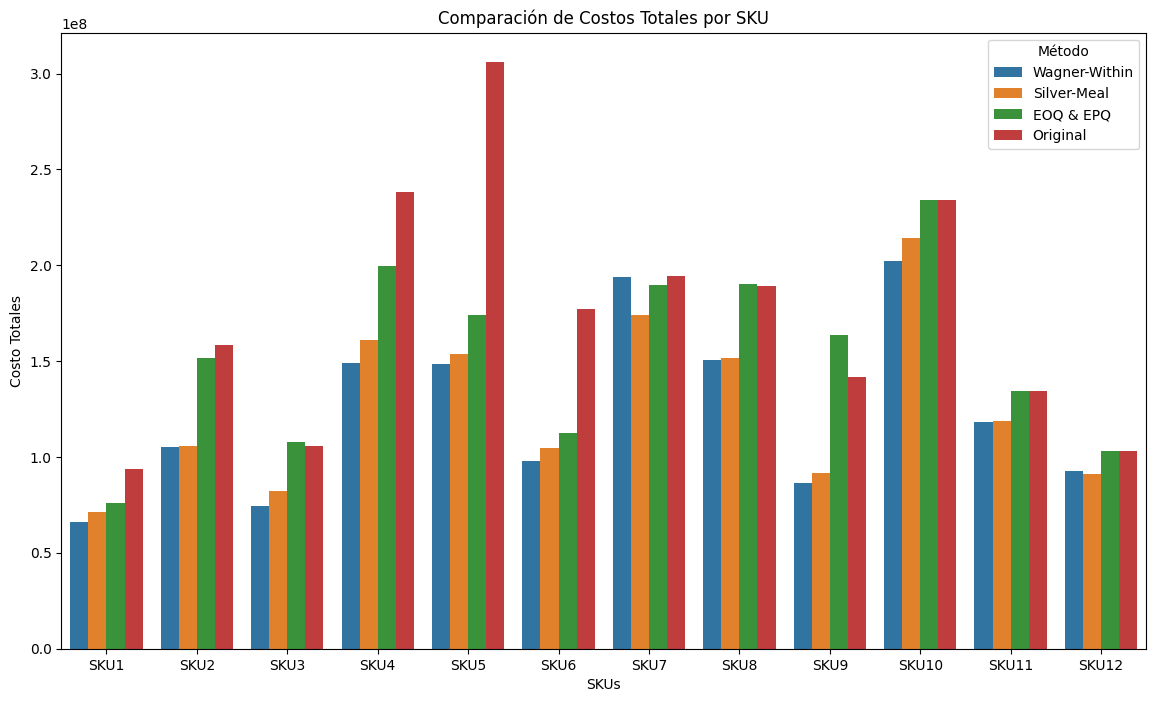

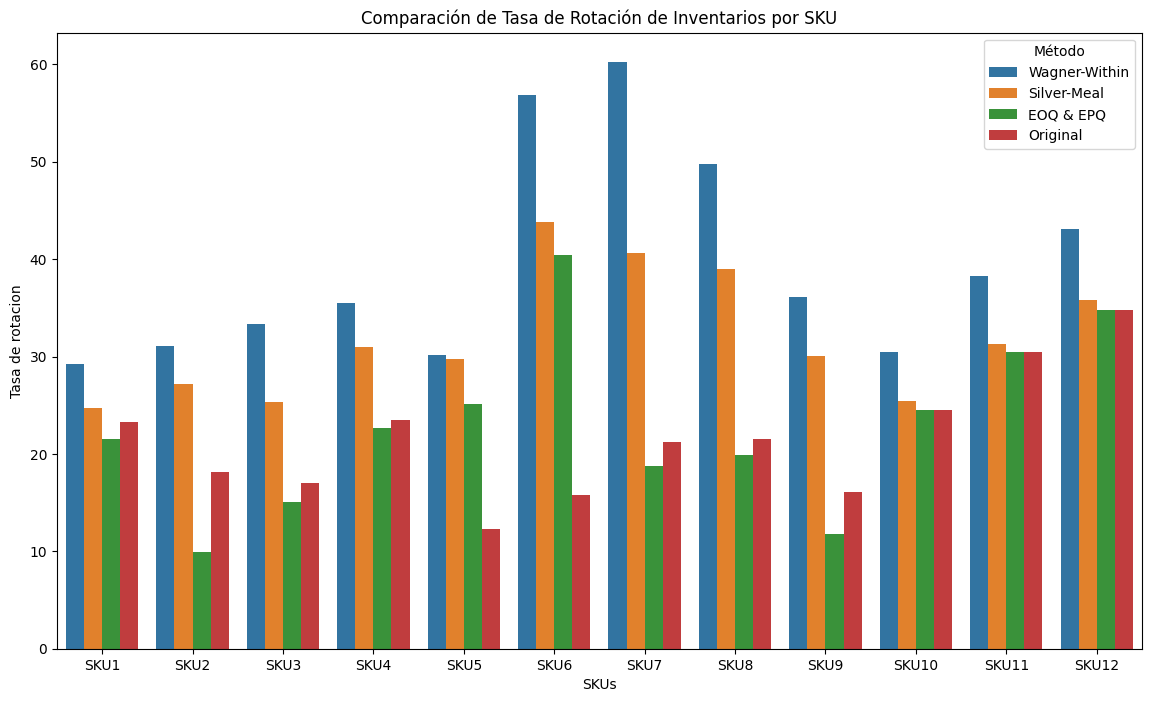

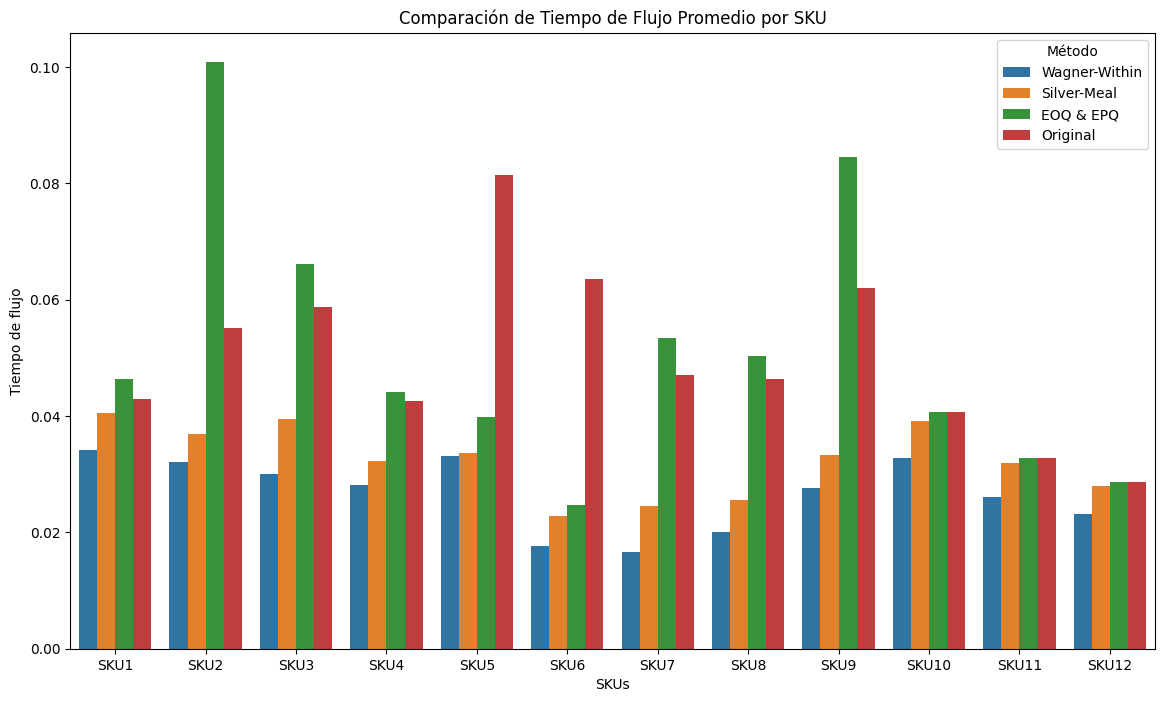

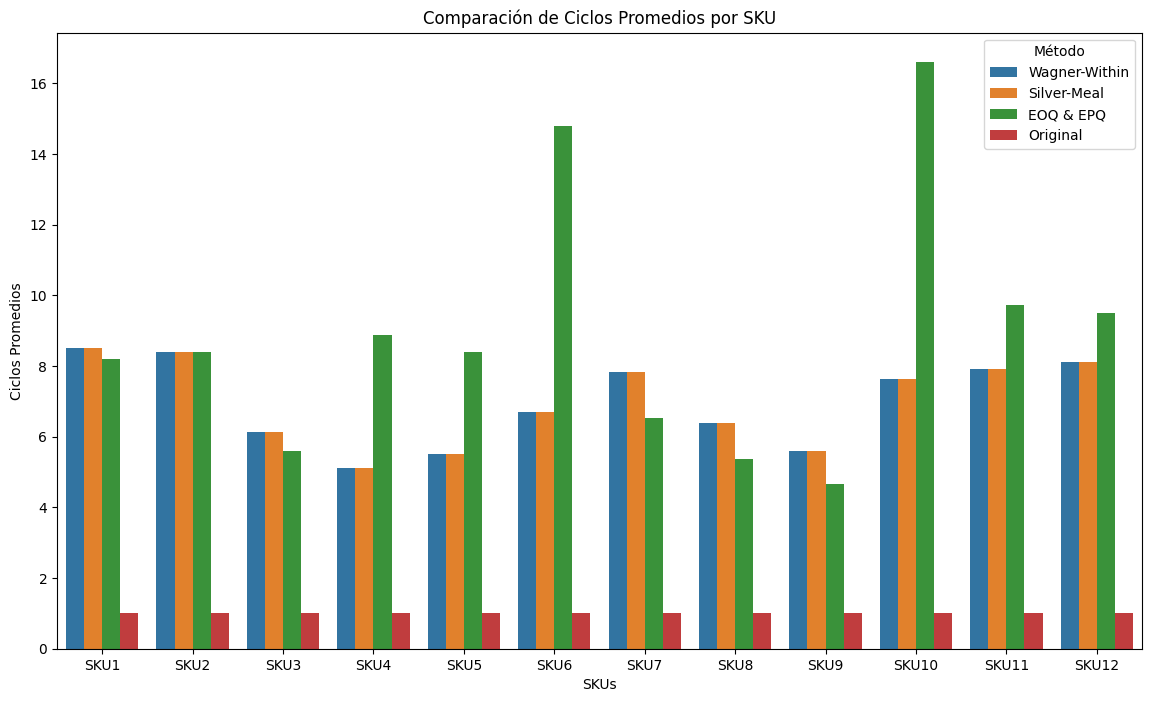

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Datos de ejemplo para los diferentes métodos (se deben reemplazar con los datos completos)
wagner_within1 = {
    'SKUS': [f'SKU{i}' for i in range(1, 13)],
    'Costo Totales': [6.594037e+07, 1.051992e+08, 7.458779e+07, 1.491804e+08, 1.483894e+08, 9.776436e+07, 1.937936e+08, 1.506189e+08, 8.650999e+07, 2.022943e+08, 1.180486e+08, 9.281381e+07],
    'Tasa de rotacion': [29.246430, 31.122503, 33.339275, 35.462798, 30.158306, 56.836476, 60.246852, 49.774218, 36.131994, 30.470887, 38.302533, 43.139693],
    'Tiempo de flujo': [0.034192, 0.032131, 0.029995, 0.028199, 0.033158, 0.017594, 0.016598, 0.020091, 0.027676, 0.032818, 0.026108, 0.023181],
    'Ciclos Promedios': [8.500000, 8.400000, 6.142857, 5.117647, 5.500000, 6.692308, 7.818182, 6.384615, 5.600000, 7.636364, 7.909091, 8.100000],
    'Método': ['Wagner-Within']*12
}

silver_meal1 = {
    'SKUS': [f'SKU{i}' for i in range(1, 13)],
    'Costo Totales': [7.116386e+07, 1.057280e+08, 8.221511e+07, 1.611666e+08, 1.538806e+08, 1.047134e+08, 1.738277e+08, 1.514286e+08, 9.180703e+07, 2.140776e+08, 1.190227e+08, 9.104548e+07],
    'Tasa de rotacion': [24.698317, 27.144761, 25.365060, 31.019308, 29.754553, 43.790592, 40.672120, 39.018773, 30.011767, 25.484193, 31.273458, 35.804040],
    'Tiempo de flujo': [0.040489, 0.036840, 0.039424, 0.032238, 0.033608, 0.022836, 0.024587, 0.025629, 0.033320, 0.039240, 0.031976, 0.027930],
    'Ciclos Promedios': [8.500000, 8.400000, 6.142857, 5.117647, 5.500000, 6.692308, 7.818182, 6.384615, 5.600000, 7.636364, 7.909091, 8.100000],
    'Método': ['Silver-Meal']*12
}

eoq_epq1 = {
    'SKUS': [f'SKU{i}' for i in range(1, 13)],
    'Costo Totales': [7.602104e+07, 1.518699e+08, 1.079496e+08, 1.997464e+08, 1.742804e+08, 1.125204e+08, 1.898664e+08, 1.902801e+08, 1.637323e+08, 2.342582e+08, 1.341734e+08, 1.029581e+08],
    'Tasa de rotacion': [21.578038, 9.912997, 15.118307, 22.655665, 25.086160, 40.388531, 18.720238, 19.876871, 11.825161, 24.564468, 30.471759, 34.789323],
    'Tiempo de flujo': [0.046343, 0.100878, 0.066145, 0.044139, 0.039863, 0.024760, 0.053418, 0.050310, 0.084565, 0.040709, 0.032817, 0.028744],
    'Ciclos Promedios': [8.200000, 8.400000, 5.600000, 8.888889, 8.400000, 14.800000, 6.538462, 5.375000, 4.666667, 16.600000, 9.714286, 9.500000],
    'Método': ['EOQ & EPQ']*12
}

original1 = {
    'SKUS': [f'SKU{i}' for i in range(1, 13)],
    'Costo Totales': [9.368275e+07, 1.584133e+08, 1.056166e+08, 2.384229e+08, 3.060020e+08, 1.769669e+08, 1.941826e+08, 1.891162e+08, 1.416323e+08, 2.342582e+08, 1.341734e+08, 1.029581e+08],
    'Tasa de rotacion': [23.294823, 18.145370, 16.997343, 23.518564, 12.272914, 15.742435, 21.272560, 21.556517, 16.123897, 24.564468, 30.471759, 34.789323],
    'Tiempo de flujo': [0.042928, 0.055110, 0.058833, 0.042520, 0.081480, 0.063523, 0.047009, 0.046390, 0.061949, 0.040709, 0.032817, 0.028744],
    'Ciclos Promedios': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
    'Método': ['Original']*12
}

# Crear DataFrames
df_wagner_within = pd.DataFrame(wagner_within1)
df_silver_meal = pd.DataFrame(silver_meal1)
df_eoq_epq = pd.DataFrame(eoq_epq1)
df_original = pd.DataFrame(original1)

# Unir todos los DataFrames en uno solo
df = pd.concat([df_wagner_within, df_silver_meal, df_eoq_epq, df_original])

# Función para crear gráficos
def crear_grafico(df, y, titulo):
    plt.figure(figsize=(14, 8))
    sns.barplot(x='SKUS', y=y, hue='Método', data=df)
    plt.title(titulo)
    plt.xlabel('SKUs')
    plt.ylabel(y)
    plt.legend(title='Método')
    plt.show()

# Crear gráficos
crear_grafico(df, 'Costo Totales', 'Comparación de Costos Totales por SKU')
crear_grafico(df, 'Tasa de rotacion', 'Comparación de Tasa de Rotación de Inventarios por SKU')
crear_grafico(df, 'Tiempo de flujo', 'Comparación de Tiempo de Flujo Promedio por SKU')
crear_grafico(df, 'Ciclos Promedios', 'Comparación de Ciclos Promedios por SKU')


# (KPI) Key Performance Indicator by SKUS. (Jointly replenishment based on : Total & Partial)

* ***reabastecimiento conjunto de los modelos M1 y M2 para los skus 1,2,3***

In [ ]:
data_characterization_JR = data.copy()
data_characterization_JR

,Tipo,Familias,SKUS,Cargo de Mantener una unidad en 90 Semanas,Rentabilidad,Total Demanda,Promedio semana,Desv. Estándar,Cv,Costo unitario,Costo Ordenar,Tasa Pdn (unid por semana)
0,compra y venta,Familia 1,SKU 1,0.311538,0.18,100571.0,1117.455556,548.693672,0.491021,26478.0,3415860.0,NaN
1,compra y venta,NaN,SKU 2,0.311538,0.25,108196.0,1202.177778,598.309990,0.497688,35621.0,5124610.0,NaN
2,compra y venta,NaN,SKU 3,0.311538,0.22,106396.0,1182.177778,603.645267,0.510621,40218.0,2471600.0,NaN
3,Manufacturado,Familia 2,SKU 4,0.450000,0.26,131526.0,1461.400000,274.140774,0.187588,64570.0,3451200.0,1800.0
4,Manufacturado,NaN,SKU 5,0.450000,0.25,128338.0,1425.977778,253.785275,0.177973,56478.0,4023600.0,2000.0
5,Manufacturado,NaN,SKU 6,0.450000,0.3,131255.0,1458.388889,281.232548,0.192838,34867.0,3845650.0,1700.0
6,compra y venta,Familia 3,SKU 7,0.346154,0.15,120159.0,1335.100000,456.989761,0.342289,56416.0,6451870.0,NaN
7,compra y venta,NaN,SKU 8,0.346154,0.21,123184.0,1368.711111,501.595393,0.366473,64179.0,4781900.0,NaN
8,compra y venta,NaN,SKU 9,0.346154,0.25,120719.0,1341.322222,413.133431,0.308005,42351.0,2345640.0,NaN
9,Manufacturado,Familia 4,SKU 10,0.432692,0.28,113177.0,1257.522222,434.914669,0.345850,62415.0,7845000.0,1500.0


In [ ]:
data_characterization_JR['Familias'] = data_characterization_JR['Familias'].ffill()
data_characterization_JR

,Tipo,Familias,SKUS,Cargo de Mantener una unidad en 90 Semanas,Rentabilidad,Total Demanda,Promedio semana,Desv. Estándar,Cv,Costo unitario,Costo Ordenar,Tasa Pdn (unid por semana)
0,compra y venta,Familia 1,SKU 1,0.311538,0.18,100571.0,1117.455556,548.693672,0.491021,26478.0,3415860.0,NaN
1,compra y venta,Familia 1,SKU 2,0.311538,0.25,108196.0,1202.177778,598.309990,0.497688,35621.0,5124610.0,NaN
2,compra y venta,Familia 1,SKU 3,0.311538,0.22,106396.0,1182.177778,603.645267,0.510621,40218.0,2471600.0,NaN
3,Manufacturado,Familia 2,SKU 4,0.450000,0.26,131526.0,1461.400000,274.140774,0.187588,64570.0,3451200.0,1800.0
4,Manufacturado,Familia 2,SKU 5,0.450000,0.25,128338.0,1425.977778,253.785275,0.177973,56478.0,4023600.0,2000.0
5,Manufacturado,Familia 2,SKU 6,0.450000,0.3,131255.0,1458.388889,281.232548,0.192838,34867.0,3845650.0,1700.0
6,compra y venta,Familia 3,SKU 7,0.346154,0.15,120159.0,1335.100000,456.989761,0.342289,56416.0,6451870.0,NaN
7,compra y venta,Familia 3,SKU 8,0.346154,0.21,123184.0,1368.711111,501.595393,0.366473,64179.0,4781900.0,NaN
8,compra y venta,Familia 3,SKU 9,0.346154,0.25,120719.0,1341.322222,413.133431,0.308005,42351.0,2345640.0,NaN
9,Manufacturado,Familia 4,SKU 10,0.432692,0.28,113177.0,1257.522222,434.914669,0.345850,62415.0,7845000.0,1500.0


     Familia    SKU  Número de órdenes (n*)  Tamaño de lote óptimo (Q)  \
0  Familia 1  SKU 1               11.019700                9126.473330   
1  Familia 1  SKU 2               10.823534                9996.365366   
2  Familia 1  SKU 3               16.421946                6478.890965   
3  Familia 3  SKU 7               13.485159                8910.462125   
4  Familia 3  SKU 8               16.915816                7282.178837   
5  Familia 3  SKU 9               19.422653                6215.371278   

   Frecuencia de reposición (T)  Costo de pedido  Costo de mantenimiento  \
0                      8.167191     3.764175e+07             1421.623730   
1                      8.315214     5.546639e+07             1557.126144   
2                      5.480471     4.058848e+07             1009.211862   
3                      6.674004     8.700449e+07             1542.195368   
4                      5.320464     8.088974e+07             1260.377106   
5                      4.

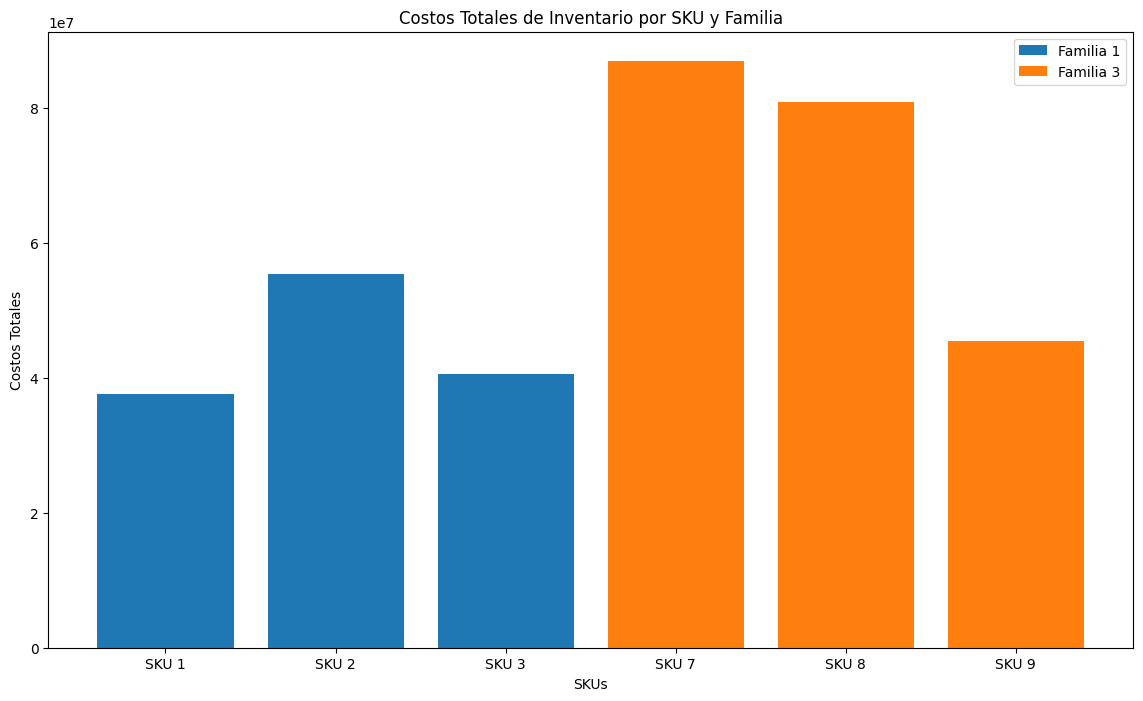

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Supuestos
# Existen varios productos en el sistema de inventarios
# La demanda es uniforme y determinística
# No se permiten faltantes
# No hay un tiempo de entrega
# Tasa de reabastecimiento infinita

def analyze_inventory_joint_replenishment(data_characterization):
    # Filtrar los datos para las familias 1 y 3
    family_1 = data_characterization[data_characterization['Familias'] == 'Familia 1']
    family_3 = data_characterization[data_characterization['Familias'] == 'Familia 3']

    families = {'Familia 1': family_1, 'Familia 3': family_3}

    results = []

    for family_name, family_data in families.items():
        for index, row in family_data.iterrows():
            sku = row['SKUS']
            D = row['Total Demanda']
            S = row['Costo Ordenar']
            H = row['Cargo de Mantener una unidad en 90 Semanas'] # Ajuste para el costo semanal
            C = row['Costo unitario ']

            # Calcular el número óptimo de órdenes en 90 semanas (n*)
            n_opt = np.sqrt((D * H * C ) / (2*S))


            # Calcular el tamaño de lote óptimo (Q) y la frecuencia de reposición (T)
            Q_opt = D / n_opt
            T_opt = 90 / n_opt

            # Calcular los costos teóricos
            CostoPedido = n_opt * S
            CostoMantenimiento = (Q_opt / 2) * H
            CostoTotal = CostoPedido + CostoMantenimiento

            results.append({
                'Familia': family_name,
                'SKU': sku,
                'Número de órdenes (n*)': n_opt,
                'Tamaño de lote óptimo (Q)': Q_opt,
                'Frecuencia de reposición (T)': T_opt,
                'Costo de pedido': CostoPedido,
                'Costo de mantenimiento': CostoMantenimiento,
                'Costo total': CostoTotal
            })

    return pd.DataFrame(results)

# Ejecutar la función con los datos cargados
result_df_JR = analyze_inventory_joint_replenishment(data_characterization_JR)
print(result_df_JR)

# Visualización de los resultados
plt.figure(figsize=(14, 8))
for family in result_df_JR['Familia'].unique():
    family_data = result_df_JR[result_df_JR['Familia'] == family]
    plt.bar(family_data['SKU'], family_data['Costo total'], label=family)

plt.title('Costos Totales de Inventario por SKU y Familia')
plt.xlabel('SKUs')
plt.ylabel('Costos Totales')
plt.legend()
plt.show()


# Metricas KPI´s y metodos aplicados para las 13 semanas predichas y stock de seguridad

In [ ]:
DataFrameCharacterizationPrediction = data.copy()
DataFrameCharacterizationPredictionSM = DataFrameCharacterizationPrediction.head(5)
DataFrameCharacterizationPredictionWW = DataFrameCharacterizationPrediction.head(5)

## Familia 1

### SKU 1

In [ ]:
  #Se ingresa la base de datos
df1 = pd.read_excel("/content/drive/MyDrive/Operaciones I/Base de datos/SKU1.xlsx")
df1

,SKU,Semana,Demanda
0,SKU1,1,1376
1,SKU1,2,1284
2,SKU1,3,983
3,SKU1,4,1740
4,SKU1,5,1442
...,...,...,...
85,SKU1,86,1733
86,SKU1,87,887
87,SKU1,88,1311
88,SKU1,89,0


Resultados del pronóstico para las próximas 13 semanas:
     Semana      Demanda
90       91  1446.297789
91       92   949.377241
92       93  1311.319471
93       94  1613.230470
94       95  1320.451428
95       96  1376.665012
96       97  1505.945106
97       98  1054.572531
98       99  1297.200771
99      100   881.840365
100     101   756.544917
101     102  1161.778761
102     103   961.554171


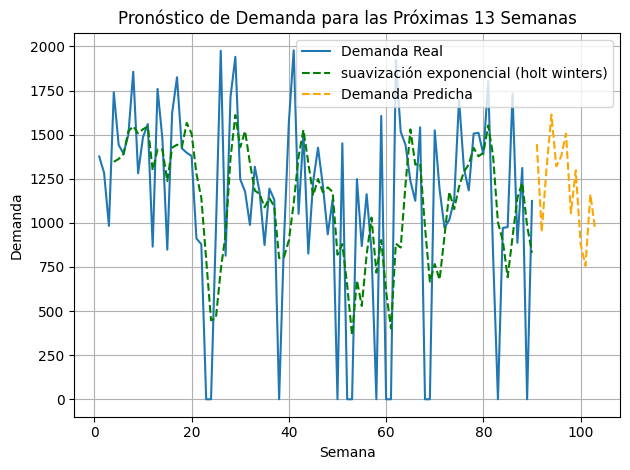

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing



# Calcular el promedio móvil simple (SMA)
window_size = 4
df1['suavización exponencial (holt winters)'] = df1['Demanda'].rolling(window=window_size).mean()

# Configuración del modelo de Holt-Winters
model = ExponentialSmoothing(df1['Demanda'], trend='add', seasonal='add', seasonal_periods=16)
fit = model.fit()

# Pronosticar las próximas 13 semanas
n_weeks_forecast = 13
forecast = fit.forecast(steps=n_weeks_forecast)

# Crear un DataFrame con los pronósticos
last_week = df1['Semana'].max()
forecast_weeks = list(range(last_week + 1, last_week + 1 + n_weeks_forecast))
forecast_df1 = pd.DataFrame({
    'SKU' : 'SKU 1',
    'Semana': forecast_weeks,
    'Demanda': forecast
})

# Imprimir los resultados del pronóstico
print("Resultados del pronóstico para las próximas 13 semanas:")
print(forecast_df1[['Semana', 'Demanda']])

# Combinar los datos reales con los pronósticos
combined_df1 = pd.concat([df1, forecast_df1], ignore_index=True)

# Graficar los resultados
plt.plot(df1['Semana'], df1['Demanda'], label='Demanda Real')
plt.plot(df1['Semana'], df1['suavización exponencial (holt winters)'], label='suavización exponencial (holt winters)', linestyle='--', color='green')
plt.plot(forecast_df1['Semana'], forecast_df1['Demanda'], label='Demanda Predicha', linestyle='--', color='orange')

plt.title("Pronóstico de Demanda para las Próximas 13 Semanas")
plt.xlabel("Semana")
plt.ylabel("Demanda")
plt.legend()

plt.tight_layout()
plt.grid()
plt.show()


* Aplicación de politicas de inventario para las ultimas 13 semanas.

* Sacamos las ultimas 13 semanas para

In [ ]:
combined_df1 = combined_df1.tail(13)

In [ ]:
combined_df1 = combined_df1.drop(columns={"suavización exponencial (holt winters)"})
combined_df1 = combined_df1.rename(columns={'SKU': 'SKUS'})

In [ ]:
combined_df1 = combined_df1.reset_index(drop=True)

* Calculamos costos de pedir y mantener para las tablas

In [ ]:
inventory_sku_1 = calcular_costos(combined_df1, DataFrameCharacterizationPrediction)
inventory_sku_1

,SKUS,Semana,Demanda,Costo de mantener,Costo Ordenar
0,SKU 1,91,1446.297789,91.654615,3415860.0
1,SKU 1,92,949.377241,91.654615,3415860.0
2,SKU 1,93,1311.319471,91.654615,3415860.0
3,SKU 1,94,1613.230470,91.654615,3415860.0
4,SKU 1,95,1320.451428,91.654615,3415860.0
5,SKU 1,96,1376.665012,91.654615,3415860.0
6,SKU 1,97,1505.945106,91.654615,3415860.0
7,SKU 1,98,1054.572531,91.654615,3415860.0
8,SKU 1,99,1297.200771,91.654615,3415860.0
9,SKU 1,100,881.840365,91.654615,3415860.0


In [ ]:
inventory_sku_1['SKUS'] = inventory_sku_1['SKUS'].str.replace(' ', '')

### SKU 2

In [ ]:
  #Se ingresa la base de datos
df2 = pd.read_excel("/content/drive/MyDrive/Operaciones I/Base de datos/SKU2.xlsx")
df2

,SKU,Semana,Demanda
0,SKU2,1,1123
1,SKU2,2,1827
2,SKU2,3,1931
3,SKU2,4,1211
4,SKU2,5,1324
...,...,...,...
85,SKU2,86,1461
86,SKU2,87,858
87,SKU2,88,947
88,SKU2,89,1729


Resultados del pronóstico para las próximas 13 semanas:
     Semana      Demanda
90       91  1232.516574
91       92  1714.963659
92       93   511.888679
93       94  1107.805954
94       95  1209.698469
95       96  1566.640562
96       97   919.743073
97       98  1436.345988
98       99  1305.987747
99      100   585.879165
100     101  1287.417638
101     102   876.657374
102     103  1378.720820


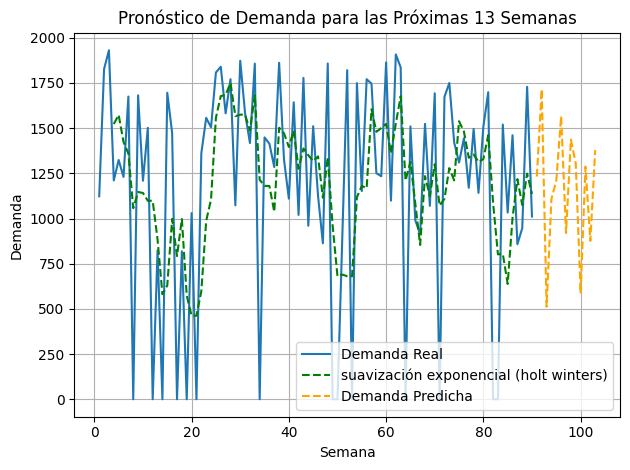

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing


# Calcular el promedio móvil simple (SMA)
window_size = 4
df2['suavización exponencial (holt winters)'] = df2['Demanda'].rolling(window=window_size).mean()

# Configuración del modelo de Holt-Winters
model = ExponentialSmoothing(df2['Demanda'], trend='add', seasonal='add', seasonal_periods=22)
fit = model.fit()

# Pronosticar las próximas 13 semanas
n_weeks_forecast = 13
forecast = fit.forecast(steps=n_weeks_forecast)

# Crear un DataFrame con los pronósticos
last_week = df2['Semana'].max()
forecast_weeks = list(range(last_week + 1, last_week + 1 + n_weeks_forecast))
forecast_df2 = pd.DataFrame({
    'SKU' : 'SKU 2',
    'Semana': forecast_weeks,
    'Demanda': forecast
})

# Imprimir los resultados del pronóstico
print("Resultados del pronóstico para las próximas 13 semanas:")
print(forecast_df2[['Semana', 'Demanda']])

# Combinar los datos reales con los pronósticos
combined_df2 = pd.concat([df2, forecast_df2], ignore_index=True)

# Graficar los resultados
plt.plot(df2['Semana'], df2['Demanda'], label='Demanda Real')
plt.plot(df2['Semana'], df2['suavización exponencial (holt winters)'], label='suavización exponencial (holt winters)', linestyle='--', color='green')
plt.plot(forecast_df2['Semana'], forecast_df2['Demanda'], label='Demanda Predicha', linestyle='--', color='orange')

plt.title("Pronóstico de Demanda para las Próximas 13 Semanas")
plt.xlabel("Semana")
plt.ylabel("Demanda")
plt.legend()

plt.tight_layout()
plt.grid()
plt.show()


In [ ]:
combined_df2 = combined_df2.tail(13)

In [ ]:
combined_df2 = combined_df2.drop(columns={"suavización exponencial (holt winters)"})
combined_df2 = combined_df2.rename(columns={'SKU': 'SKUS'})

In [ ]:
combined_df2 = combined_df2.reset_index(drop=True)

In [ ]:
inventory_sku_2 = calcular_costos(combined_df2, DataFrameCharacterizationPrediction)
inventory_sku_2

,SKUS,Semana,Demanda,Costo de mantener,Costo Ordenar
0,SKU 2,91,1232.516574,123.303462,5124610.0
1,SKU 2,92,1714.963659,123.303462,5124610.0
2,SKU 2,93,511.888679,123.303462,5124610.0
3,SKU 2,94,1107.805954,123.303462,5124610.0
4,SKU 2,95,1209.698469,123.303462,5124610.0
5,SKU 2,96,1566.640562,123.303462,5124610.0
6,SKU 2,97,919.743073,123.303462,5124610.0
7,SKU 2,98,1436.345988,123.303462,5124610.0
8,SKU 2,99,1305.987747,123.303462,5124610.0
9,SKU 2,100,585.879165,123.303462,5124610.0


### SKU 3

In [ ]:
  #Se ingresa la base de datos
df3 = pd.read_excel("/content/drive/MyDrive/Operaciones I/Base de datos/SKU3.xlsx")
df3

,SKU,Semana,Demanda
0,SKU3,1,1904
1,SKU3,2,1690
2,SKU3,3,1568
3,SKU3,4,1135
4,SKU3,5,1884
...,...,...,...
85,SKU3,86,1779
86,SKU3,87,1398
87,SKU3,88,1795
88,SKU3,89,1137


Resultados del pronóstico para las próximas 13 semanas:
     Semana      Demanda
90       91  1600.001132
91       92   334.270948
92       93  1621.934053
93       94  1356.511737
94       95  1296.581194
95       96  1219.009340
96       97  1204.192939
97       98  1403.354469
98       99  1341.484498
99      100  1556.990399
100     101  1215.220030
101     102   908.129463
102     103   854.361216


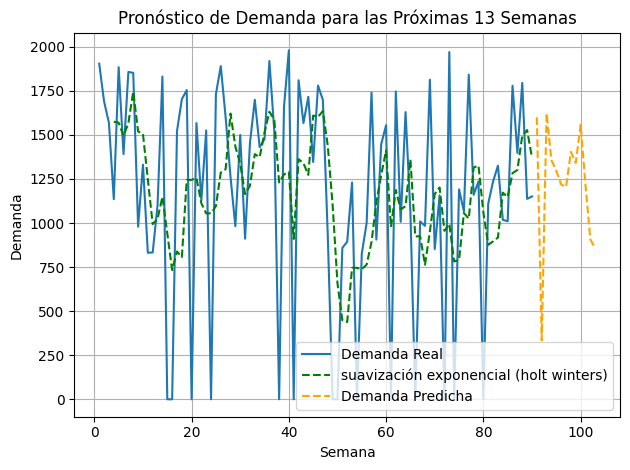

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing


# Calcular el promedio móvil simple (SMA)
window_size = 4
df3['suavización exponencial (holt winters)'] = df3['Demanda'].rolling(window=window_size).mean()

# Configuración del modelo de Holt-Winters
model = ExponentialSmoothing(df3['Demanda'], trend='add', seasonal='add', seasonal_periods=18)
fit = model.fit()

# Pronosticar las próximas 13 semanas
n_weeks_forecast = 13
forecast = fit.forecast(steps=n_weeks_forecast)

# Crear un DataFrame con los pronósticos
last_week = df3['Semana'].max()
forecast_weeks = list(range(last_week + 1, last_week + 1 + n_weeks_forecast))
forecast_df3 = pd.DataFrame({
    'SKU' : 'SKU 3',
    'Semana': forecast_weeks,
    'Demanda': forecast
})

# Imprimir los resultados del pronóstico
print("Resultados del pronóstico para las próximas 13 semanas:")
print(forecast_df3[['Semana', 'Demanda']])

# Combinar los datos reales con los pronósticos
combined_df3 = pd.concat([df3, forecast_df3], ignore_index=True)

# Graficar los resultados
plt.plot(df3['Semana'], df3['Demanda'], label='Demanda Real')
plt.plot(df3['Semana'], df3['suavización exponencial (holt winters)'], label='suavización exponencial (holt winters)', linestyle='--', color='green')
plt.plot(forecast_df3['Semana'], forecast_df3['Demanda'], label='Demanda Predicha', linestyle='--', color='orange')

plt.title("Pronóstico de Demanda para las Próximas 13 Semanas")
plt.xlabel("Semana")
plt.ylabel("Demanda")
plt.legend()

plt.tight_layout()
plt.grid()
plt.show()


In [ ]:
combined_df3 = combined_df3.tail(13)
combined_df3 = combined_df3.drop(columns={"suavización exponencial (holt winters)"})
combined_df3 = combined_df3.rename(columns={'SKU': 'SKUS'})
combined_df3 = combined_df3.reset_index(drop=True)

In [ ]:
inventory_sku_3 = calcular_costos(combined_df3, DataFrameCharacterizationPrediction)
inventory_sku_3

,SKUS,Semana,Demanda,Costo de mantener,Costo Ordenar
0,SKU 3,91,1600.001132,139.216154,2471600.0
1,SKU 3,92,334.270948,139.216154,2471600.0
2,SKU 3,93,1621.934053,139.216154,2471600.0
3,SKU 3,94,1356.511737,139.216154,2471600.0
4,SKU 3,95,1296.581194,139.216154,2471600.0
5,SKU 3,96,1219.009340,139.216154,2471600.0
6,SKU 3,97,1204.192939,139.216154,2471600.0
7,SKU 3,98,1403.354469,139.216154,2471600.0
8,SKU 3,99,1341.484498,139.216154,2471600.0
9,SKU 3,100,1556.990399,139.216154,2471600.0


## Familia 2

### SKU 4

In [ ]:
  #Se ingresa la base de datos
df4 = pd.read_excel("/content/drive/MyDrive/Operaciones I/Base de datos/SKU4.xlsx")
df4

,SKU,Semana,Demanda
0,SKU4,1,1268
1,SKU4,2,1259
2,SKU4,3,1078
3,SKU4,4,1170
4,SKU4,5,911
...,...,...,...
85,SKU4,86,1697
86,SKU4,87,2095
87,SKU4,88,1937
88,SKU4,89,1710


Resultados del pronóstico para las próximas 13 semanas:
     Semana      Demanda
90       91  1969.616783
91       92  1924.637364
92       93  1966.622743
93       94  1877.430537
94       95  1910.487115
95       96  1942.661523
96       97  1941.170817
97       98  2028.643632
98       99  1950.168063
99      100  1967.743370
100     101  1887.859260
101     102  1973.068924
102     103  1972.817732


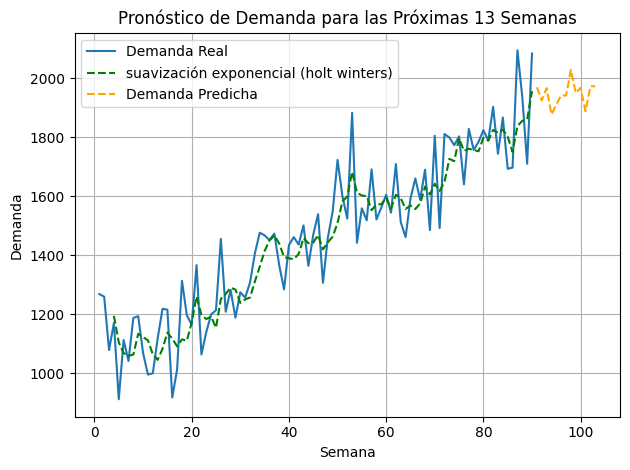

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing


# Calcular el promedio móvil simple (SMA)
window_size = 4
df4['suavización exponencial (holt winters)'] = df4['Demanda'].rolling(window=window_size).mean()

# Configuración del modelo de Holt-Winters
model = ExponentialSmoothing(df4['Demanda'], trend='add', seasonal='add', seasonal_periods=18)
fit = model.fit()

# Pronosticar las próximas 13 semanas
n_weeks_forecast = 13
forecast = fit.forecast(steps=n_weeks_forecast)

# Crear un DataFrame con los pronósticos
last_week = df4['Semana'].max()
forecast_weeks = list(range(last_week + 1, last_week + 1 + n_weeks_forecast))
forecast_df4 = pd.DataFrame({
    'SKU' : 'SKU 4',
    'Semana': forecast_weeks,
    'Demanda': forecast
})

# Imprimir los resultados del pronóstico
print("Resultados del pronóstico para las próximas 13 semanas:")
print(forecast_df4[['Semana', 'Demanda']])

# Combinar los datos reales con los pronósticos
combined_df4 = pd.concat([df4, forecast_df4], ignore_index=True)

# Graficar los resultados
plt.plot(df4['Semana'], df4['Demanda'], label='Demanda Real')
plt.plot(df4['Semana'], df4['suavización exponencial (holt winters)'], label='suavización exponencial (holt winters)', linestyle='--', color='green')
plt.plot(forecast_df4['Semana'], forecast_df4['Demanda'], label='Demanda Predicha', linestyle='--', color='orange')

plt.title("Pronóstico de Demanda para las Próximas 13 Semanas")
plt.xlabel("Semana")
plt.ylabel("Demanda")
plt.legend()

plt.tight_layout()
plt.grid()
plt.show()


In [ ]:
combined_df4 = combined_df4.tail(13)
combined_df4 = combined_df4.drop(columns={"suavización exponencial (holt winters)"})
combined_df4 = combined_df4.rename(columns={'SKU': 'SKUS'})
combined_df4 = combined_df4.reset_index(drop=True)

In [ ]:
inventory_sku_4 = calcular_costos(combined_df4, DataFrameCharacterizationPrediction)
inventory_sku_4

,SKUS,Semana,Demanda,Costo de mantener,Costo Ordenar
0,SKU 4,91,1969.616783,322.85,3451200.0
1,SKU 4,92,1924.637364,322.85,3451200.0
2,SKU 4,93,1966.622743,322.85,3451200.0
3,SKU 4,94,1877.430537,322.85,3451200.0
4,SKU 4,95,1910.487115,322.85,3451200.0
5,SKU 4,96,1942.661523,322.85,3451200.0
6,SKU 4,97,1941.170817,322.85,3451200.0
7,SKU 4,98,2028.643632,322.85,3451200.0
8,SKU 4,99,1950.168063,322.85,3451200.0
9,SKU 4,100,1967.743370,322.85,3451200.0


### SKU 5

In [ ]:
  #Se ingresa la base de datos
df5 = pd.read_excel("/content/drive/MyDrive/Operaciones I/Base de datos/SKU5.xlsx")
df5

,SKU,Semana,Demanda
0,SKU5,1,986
1,SKU5,2,1021
2,SKU5,3,1002
3,SKU5,4,1007
4,SKU5,5,1058
...,...,...,...
85,SKU5,86,1837
86,SKU5,87,1841
87,SKU5,88,1857
88,SKU5,89,1718


Resultados del pronóstico para las próximas 13 semanas:
     Semana      Demanda
90       91  1861.637600
91       92  1929.325287
92       93  1908.624279
93       94  1900.065331
94       95  1817.287697
95       96  1913.514363
96       97  1928.849246
97       98  1922.491674
98       99  1917.382703
99      100  1889.289584
100     101  1914.985409
101     102  1929.853916
102     103  1913.710914


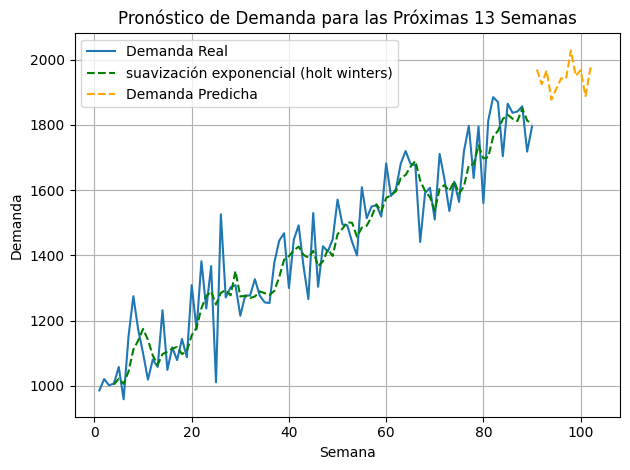

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing


# Calcular el promedio móvil simple (SMA)
window_size = 4
df5['suavización exponencial (holt winters)'] = df5['Demanda'].rolling(window=window_size).mean()

# Configuración del modelo de Holt-Winters
model = ExponentialSmoothing(df5['Demanda'], trend='add', seasonal='add', seasonal_periods=14)
fit = model.fit()

# Pronosticar las próximas 13 semanas
n_weeks_forecast = 13
forecast = fit.forecast(steps=n_weeks_forecast)

# Crear un DataFrame con los pronósticos
last_week = df5['Semana'].max()
forecast_weeks = list(range(last_week + 1, last_week + 1 + n_weeks_forecast))
forecast_df5 = pd.DataFrame({
    'SKU' : 'SKU 5',
    'Semana': forecast_weeks,
    'Demanda': forecast
})

# Imprimir los resultados del pronóstico
print("Resultados del pronóstico para las próximas 13 semanas:")
print(forecast_df5[['Semana', 'Demanda']])

# Combinar los datos reales con los pronósticos
combined_df5 = pd.concat([df5, forecast_df5], ignore_index=True)

# Graficar los resultados
plt.plot(df5['Semana'], df5['Demanda'], label='Demanda Real')
plt.plot(df5['Semana'], df5['suavización exponencial (holt winters)'], label='suavización exponencial (holt winters)', linestyle='--', color='green')
plt.plot(forecast_df4['Semana'], forecast_df4['Demanda'], label='Demanda Predicha', linestyle='--', color='orange')

plt.title("Pronóstico de Demanda para las Próximas 13 Semanas")
plt.xlabel("Semana")
plt.ylabel("Demanda")
plt.legend()

plt.tight_layout()
plt.grid()
plt.show()


In [ ]:
combined_df5 = combined_df5.tail(13)
combined_df5 = combined_df5.drop(columns={"suavización exponencial (holt winters)"})
combined_df5 = combined_df5.rename(columns={'SKU': 'SKUS'})
combined_df5 = combined_df5.reset_index(drop=True)

In [ ]:
inventory_sku_5 = calcular_costos(combined_df5, DataFrameCharacterizationPrediction)
inventory_sku_5

,SKUS,Semana,Demanda,Costo de mantener,Costo Ordenar
0,SKU 5,91,1861.637600,282.39,4023600.0
1,SKU 5,92,1929.325287,282.39,4023600.0
2,SKU 5,93,1908.624279,282.39,4023600.0
3,SKU 5,94,1900.065331,282.39,4023600.0
4,SKU 5,95,1817.287697,282.39,4023600.0
5,SKU 5,96,1913.514363,282.39,4023600.0
6,SKU 5,97,1928.849246,282.39,4023600.0
7,SKU 5,98,1922.491674,282.39,4023600.0
8,SKU 5,99,1917.382703,282.39,4023600.0
9,SKU 5,100,1889.289584,282.39,4023600.0


## KPI's

In [ ]:
import pandas as pd

df_concatenado = pd.concat([inventory_sku_1, inventory_sku_2, inventory_sku_3, inventory_sku_4, inventory_sku_5], ignore_index=True)

df_concatenado

,SKUS,Semana,Demanda,Costo de mantener,Costo Ordenar
0,SKU1,91,1446.297789,91.654615,3415860.0
1,SKU1,92,949.377241,91.654615,3415860.0
2,SKU1,93,1311.319471,91.654615,3415860.0
3,SKU1,94,1613.230470,91.654615,3415860.0
4,SKU1,95,1320.451428,91.654615,3415860.0
...,...,...,...,...,...
60,SKU 5,99,1917.382703,282.390000,4023600.0
61,SKU 5,100,1889.289584,282.390000,4023600.0
62,SKU 5,101,1914.985409,282.390000,4023600.0
63,SKU 5,102,1929.853916,282.390000,4023600.0


In [ ]:
df_concatenado['SKUS'] = df_concatenado['SKUS'].str.replace(' ', '')

* Silver & Meal Aplicado

In [ ]:
# Inventarios iniciales por SKU
initial_inventories_1 = {
    'SKU1': 0, 'SKU2': 0, 'SKU3': 0, 'SKU4': 0, 'SKU5': 0
}

# Aplicar la función Silver-Meal a cada SKU
result_dfs = []  # Asegúrate de que la lista se llame result_dfs, no result_dfs_sm
for sku in df_concatenado['SKUS'].unique():
    sku_df_3 = df_concatenado[df_concatenado['SKUS'] == sku].copy()
    initial_inventory_1 = initial_inventories_1[sku]  # Ajusta el nombre de la variable aquí
    result_dfs_sm = silver_meal(initial_inventory_1, sku_df_3)
    result_dfs.append(result_dfs_sm)

# Concatenar todos los resultados
final_result_sww = pd.concat(result_dfs, ignore_index=True)

final_result_sww


,SKUS,Semana,Demanda,Costo de mantener,Costo Ordenar,Inventario inicial,Cantidad reabastecida,Inventario final
0,SKU1,91,1446.297789,91.654615,3415860.0,0.000000e+00,11875.059821,1.042876e+04
1,SKU1,92,949.377241,91.654615,3415860.0,1.042876e+04,0.000000,9.479385e+03
2,SKU1,93,1311.319471,91.654615,3415860.0,9.479385e+03,0.000000,8.168065e+03
3,SKU1,94,1613.230470,91.654615,3415860.0,8.168065e+03,0.000000,6.554835e+03
4,SKU1,95,1320.451428,91.654615,3415860.0,6.554835e+03,0.000000,5.234383e+03
...,...,...,...,...,...,...,...,...
60,SKU5,99,1917.382703,282.390000,4023600.0,3.806672e+03,0.000000,1.889290e+03
61,SKU5,100,1889.289584,282.390000,4023600.0,1.889290e+03,0.000000,4.547474e-13
62,SKU5,101,1914.985409,282.390000,4023600.0,4.547474e-13,5758.550239,3.843565e+03
63,SKU5,102,1929.853916,282.390000,4023600.0,3.843565e+03,0.000000,1.913711e+03


* Números de pedidos

In [ ]:
# Contar los pedidos para cada SKU donde 'Pedido' es mayor que 0
pedido_counts_SWW = final_result_sww[final_result_sww['Cantidad reabastecida'] > 0].groupby('SKUS').size().reset_index(name='Numero de pedidos')

# Suponiendo que pedido_counts es tu DataFrame
# Extraer el número después de 'SKU'
pedido_counts_SWW['SKU Number'] = pedido_counts_SWW['SKUS'].str.extract('(\d+)').astype(int)
# Ordenar el DataFrame por la columna 'SKU Number'
pedido_counts_SWW = pedido_counts_SWW.sort_values(by='SKU Number')

# Opcional: Eliminar la columna 'SKU Number' si ya no se necesita
pedido_counts_SWW = pedido_counts_SWW.drop(columns=['SKU Number'])

pedido_counts_SWW

,SKUS,Numero de pedidos
0,SKU1,2
1,SKU2,2
2,SKU3,2
3,SKU4,4
4,SKU5,3


* Inventario promedio

In [ ]:
# Calcular el promedio del inventario final por SKU una vez q ya aplicamos los EOQ´s Y EPQ´s
average_inventory_smm = final_result_sww.groupby('SKUS')['Inventario final'].mean().reset_index()
average_inventory_smm.rename(columns={'Inventario final': 'Inventario promedio'}, inplace=True)

# Extraer el número después de 'SKU'
average_inventory_smm['SKU Number'] = pedido_counts['SKUS'].str.extract('(\d+)').astype(int)
# Ordenar el DataFrame por la columna 'SKU Number'
average_inventory_smm = average_inventory_smm.sort_values(by='SKU Number')

# Opcional: Eliminar la columna 'SKU Number' si ya no se necesita
average_inventory_smm = average_inventory_smm.drop(columns=['SKU Number'])

average_inventory_smm

,SKUS,Inventario promedio
0,SKU1,4102.837527
4,SKU5,3350.487339
1,SKU2,3508.661981
2,SKU3,3243.050207
3,SKU4,2697.213629


* Actualizamos el inventario

In [ ]:
DataFrameCharacterizationPredictionSM['Inventario promedio'] = average_inventory_smm['Inventario promedio']

<ipython-input-5830-b7cc6a23a058>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataFrameCharacterizationPredictionSM['Inventario promedio'] = average_inventory_smm['Inventario promedio']


* Costo de mantener

In [ ]:
DataFrameCharacterizationPredictionSM['Costo Total de Mantenimiento (90 semanas)'] = DataFrameCharacterizationPredictionSM['Inventario promedio'] * DataFrameCharacterizationPredictionSM['Costo unitario '] * DataFrameCharacterizationPredictionSM['Cargo de Mantener una unidad en 90 Semanas']

<ipython-input-5831-230ca54875fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataFrameCharacterizationPredictionSM['Costo Total de Mantenimiento (90 semanas)'] = DataFrameCharacterizationPredictionSM['Inventario promedio'] * DataFrameCharacterizationPredictionSM['Costo unitario '] * DataFrameCharacterizationPredictionSM['Cargo de Mantener una unidad en 90 Semanas']


* Costo de pedir

In [ ]:
DataFrameCharacterizationPredictionSM["Costo Total de Pedir (90 semanas)"] = pedido_counts_SWW['Numero de pedidos'] * DataFrameCharacterizationPredictionSM['Costo Ordenar']

<ipython-input-5832-3232393408d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataFrameCharacterizationPredictionSM["Costo Total de Pedir (90 semanas)"] = pedido_counts_SWW['Numero de pedidos'] * DataFrameCharacterizationPredictionSM['Costo Ordenar']


* Costos totales

In [ ]:
DataFrameCharacterizationPredictionSM['Costo Totales'] = DataFrameCharacterizationPredictionSM['Costo Total de Pedir (90 semanas)'] + DataFrameCharacterizationPredictionSM['Costo Total de Mantenimiento (90 semanas)']

<ipython-input-5833-c11753425d5f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataFrameCharacterizationPredictionSM['Costo Totales'] = DataFrameCharacterizationPredictionSM['Costo Total de Pedir (90 semanas)'] + DataFrameCharacterizationPredictionSM['Costo Total de Mantenimiento (90 semanas)']


* tiempo de flujos

In [ ]:
DataFrameCharacterizationPredictionSM['Tiempo de flujo'] = DataFrameCharacterizationPredictionSM['Inventario promedio'] / DataFrameCharacterizationPredictionSM['Total Demanda']

<ipython-input-5834-fa48126036f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataFrameCharacterizationPredictionSM['Tiempo de flujo'] = DataFrameCharacterizationPredictionSM['Inventario promedio'] / DataFrameCharacterizationPredictionSM['Total Demanda']


* Tasa de rotación

In [ ]:
DataFrameCharacterizationPredictionSM['Tasa de rotacion'] = DataFrameCharacterizationPredictionSM['Total Demanda'] / DataFrameCharacterizationPredictionSM['Inventario promedio']

<ipython-input-5835-aefa6d543abd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataFrameCharacterizationPredictionSM['Tasa de rotacion'] = DataFrameCharacterizationPredictionSM['Total Demanda'] / DataFrameCharacterizationPredictionSM['Inventario promedio']


* KPI'S Finales calculados SILVER & MEAL

In [ ]:
DataFrameCharacterizationPredictionSM.rename(columns={"Costo Total de Mantenimiento (90 semanas)": "Costo Total de Mantenimiento (13 semanas)","Costo Total de Pedir (90 semanas)": "Costo Total de Pedir (13 semanas)"})

,Tipo,Familias,SKUS,Cargo de Mantener una unidad en 90 Semanas,Rentabilidad,Total Demanda,Promedio semana,Desv. Estándar,Cv,Costo unitario,Costo Ordenar,Tasa Pdn (unid por semana),Inventario promedio,Costo Total de Mantenimiento (13 semanas),Costo Total de Pedir (13 semanas),Costo Totales,Tiempo de flujo,Tasa de rotacion
0,compra y venta,Familia 1,SKU 1,0.311538,0.18,100571.0,1117.455556,548.693672,0.491021,26478.0,3415860.0,NaN,4102.837527,3.384396e+07,6831720.0,4.067568e+07,0.040795,24.512548
1,compra y venta,NaN,SKU 2,0.311538,0.25,108196.0,1202.177778,598.309990,0.497688,35621.0,5124610.0,NaN,3508.661981,3.893672e+07,10249220.0,4.918594e+07,0.032429,30.836826
2,compra y venta,NaN,SKU 3,0.311538,0.22,106396.0,1182.177778,603.645267,0.510621,40218.0,2471600.0,NaN,3243.050207,4.063365e+07,4943200.0,4.557685e+07,0.030481,32.807386
3,Manufacturado,Familia 2,SKU 4,0.450000,0.26,131526.0,1461.400000,274.140774,0.187588,64570.0,3451200.0,1800.0,2697.213629,7.837159e+07,13804800.0,9.217639e+07,0.020507,48.763657
4,Manufacturado,NaN,SKU 5,0.450000,0.25,128338.0,1425.977778,253.785275,0.177973,56478.0,4023600.0,2000.0,3350.487339,8.515297e+07,12070800.0,9.722377e+07,0.026107,38.304278


* Stock de seguridad SKU 1 SILVER & MEAL APLICADO

In [ ]:
from scipy.stats import norm

# Supuestos
D = combined_df1['Demanda'].mean()  # Demanda promedio
σ_D = combined_df1['Demanda'].std()  # Desviación estándar de la demanda
L = 1  # Tiempo de entrega en semanas (supuesto)
Q = 4102  # Tamaño del lote (supuesto) PORQUE LA VARIABILIDAD DE LA DEMANDA CAMBIA
CSL = 0.95  # Nivel de servicio del ciclo (95%)

# Calcular el inventario de seguridad (ss)
D_L = D * L
σ_L = np.sqrt(L) * σ_D
z = norm.ppf(CSL)
ss = z * σ_L

# Calcular el punto de reorden (ROP)
ROP = D_L + ss

# Calcular el inventario de ciclo (CI)
CI = Q / 2

# Calcular el inventario promedio (WIP)
WIP = ss + CI

# Calcular el flujo de tiempo promedio (AFT)
AFT = WIP / D

# Imprimir los resultados
print(f"El stock de seguridad es {ss:.2f} unidades")
print(f"El inventario promedio por ciclo es {CI:.2f} unidades")
print(f"El inventario promedio es {WIP:.2f} unidades")
print(f"El tiempo de flujo promedio es de {AFT:.2f} semanas")

# Estimar los costos
costo_ordenar = 50  # Costo por orden (supuesto)
costo_mantener = 2  # Costo por unidad por semana (supuesto)
costo_faltante = 10  # Costo por unidad faltante (supuesto)

# Calcular el costo total
costo_total_ordenar = (D / Q) * costo_ordenar
costo_total_mantener = WIP * costo_mantener
ESC = (1 - CSL) * Q  # Escasez esperada por ciclo de reabastecimiento
costo_total_faltante = ESC * costo_faltante

costo_total = costo_total_ordenar + costo_total_mantener + costo_total_faltante

# Imprimir los resultados de costos
print(f"Costo total de ordenar: ${costo_total_ordenar:.2f}")
print(f"Costo total de mantener: ${costo_total_mantener:.2f}")
print(f"Costo total de faltantes: ${costo_total_faltante:.2f}")
print(f"Costo total: ${costo_total:.2f}")


El stock de seguridad es 433.28 unidades
El inventario promedio por ciclo es 2051.00 unidades
El inventario promedio es 2484.28 unidades
El tiempo de flujo promedio es de 2.07 semanas
Costo total de ordenar: $14.66
Costo total de mantener: $4968.55
Costo total de faltantes: $2051.00
Costo total: $7034.21


* Wagner Within Aplicado

In [ ]:
# Ejemplo de uso

initial_inventories = {
    'SKU1': 0, 'SKU2': 0, 'SKU3': 0, 'SKU4': 0, 'SKU5': 0,
}

# Cargar datos desde un archivo CSV

# Aplicar la función y obtener el DataFrame con la columna 'pedido'
result_df_ww = apply_wagner_whitin(df_concatenado, initial_inventories)

result_df_ww

,SKUS,Semana,Demanda,Costo de mantener,Costo Ordenar,Cantidad reabastecida,Inventario inicial,Inventario final
0,SKU1,91,1446.297789,91.654615,3415860.0,8017.341412,0.000000e+00,6.571044e+03
1,SKU1,92,949.377241,91.654615,3415860.0,0.000000,6.571044e+03,5.621666e+03
2,SKU1,93,1311.319471,91.654615,3415860.0,0.000000,5.621666e+03,4.310347e+03
3,SKU1,94,1613.230470,91.654615,3415860.0,0.000000,4.310347e+03,2.697116e+03
4,SKU1,95,1320.451428,91.654615,3415860.0,0.000000,2.697116e+03,1.376665e+03
...,...,...,...,...,...,...,...,...
60,SKU5,99,1917.382703,282.390000,4023600.0,0.000000,1.917383e+03,4.547474e-13
61,SKU5,100,1889.289584,282.390000,4023600.0,7647.839824,4.547474e-13,5.758550e+03
62,SKU5,101,1914.985409,282.390000,4023600.0,0.000000,5.758550e+03,3.843565e+03
63,SKU5,102,1929.853916,282.390000,4023600.0,0.000000,3.843565e+03,1.913711e+03


* Número de pedidos

In [ ]:
# Contar los pedidos para cada SKU donde 'Pedido' es mayor que 0
pedido_counts_WWW = result_df_ww[result_df_ww['Cantidad reabastecida'] > 0].groupby('SKUS').size().reset_index(name='Numero de pedidos')

# Suponiendo que pedido_counts es tu DataFrame
# Extraer el número después de 'SKU'
pedido_counts_WWW['SKU Number'] = pedido_counts_WWW['SKUS'].str.extract('(\d+)').astype(int)
# Ordenar el DataFrame por la columna 'SKU Number'
pedido_counts_WWW = pedido_counts_WWW.sort_values(by='SKU Number')

# Opcional: Eliminar la columna 'SKU Number' si ya no se necesita
pedido_counts_WWW = pedido_counts_WWW.drop(columns=['SKU Number'])

pedido_counts_WWW

,SKUS,Numero de pedidos
0,SKU1,2
1,SKU2,2
2,SKU3,2
3,SKU4,4
4,SKU5,3


* Inventario promedio

In [ ]:
# Calcular el promedio del inventario final por SKU una vez q ya aplicamos los EOQ´s Y EPQ´s
average_inventory_www = result_df_ww.groupby('SKUS')['Inventario final'].mean().reset_index()
average_inventory_www.rename(columns={'Inventario final': 'Inventario promedio'}, inplace=True)

# Extraer el número después de 'SKU'
average_inventory_www['SKU Number'] = pedido_counts['SKUS'].str.extract('(\d+)').astype(int)
# Ordenar el DataFrame por la columna 'SKU Number'
average_inventory_www = average_inventory_www.sort_values(by='SKU Number')

# Opcional: Eliminar la columna 'SKU Number' si ya no se necesita
average_inventory_www = average_inventory_www.drop(columns=['SKU Number'])

average_inventory_www

,SKUS,Inventario promedio
0,SKU1,3190.440926
4,SKU5,3212.132870
1,SKU2,3153.295891
2,SKU3,3243.050207
3,SKU4,2239.964370


* Actualizamos Inventario

In [ ]:
# ACTUALIZAMOS EL PROMEDIO del inventario final por SKU una vez q ya aplicamos los EOQ´s Y EPQ´s

DataFrameCharacterizationPredictionWW['Inventario promedio'] = average_inventory_ww['Inventario promedio']

<ipython-input-5841-aad835d77ca0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataFrameCharacterizationPredictionWW['Inventario promedio'] = average_inventory_ww['Inventario promedio']


* Costo de pedir

In [ ]:
DataFrameCharacterizationPredictionWW['Costo Total de Mantenimiento (90 semanas)'] = DataFrameCharacterizationPredictionWW['Inventario promedio'] * DataFrameCharacterizationPredictionWW['Costo unitario '] * DataFrameCharacterizationPredictionWW['Cargo de Mantener una unidad en 90 Semanas']

<ipython-input-5842-5bf53a2a8f46>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataFrameCharacterizationPredictionWW['Costo Total de Mantenimiento (90 semanas)'] = DataFrameCharacterizationPredictionWW['Inventario promedio'] * DataFrameCharacterizationPredictionWW['Costo unitario '] * DataFrameCharacterizationPredictionWW['Cargo de Mantener una unidad en 90 Semanas']


* Costo de mantener

In [ ]:
DataFrameCharacterizationPredictionWW["Costo Total de Pedir (90 semanas)"] = pedido_counts_WWW['Numero de pedidos'] * DataFrameCharacterizationPredictionWW['Costo Ordenar']

<ipython-input-5843-ee07d13bc842>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataFrameCharacterizationPredictionWW["Costo Total de Pedir (90 semanas)"] = pedido_counts_WWW['Numero de pedidos'] * DataFrameCharacterizationPredictionWW['Costo Ordenar']


* Costo totales

In [ ]:
DataFrameCharacterizationPredictionWW['Costo Totales'] = DataFrameCharacterizationPredictionWW['Costo Total de Pedir (90 semanas)'] + DataFrameCharacterizationPredictionWW['Costo Total de Mantenimiento (90 semanas)']

<ipython-input-5844-12a04c38a23a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataFrameCharacterizationPredictionWW['Costo Totales'] = DataFrameCharacterizationPredictionWW['Costo Total de Pedir (90 semanas)'] + DataFrameCharacterizationPredictionWW['Costo Total de Mantenimiento (90 semanas)']


* Tiempo de flujo

In [ ]:
DataFrameCharacterizationPredictionWW['Tiempo de flujo'] = DataFrameCharacterizationPredictionWW['Inventario promedio'] / DataFrameCharacterizationPredictionWW['Total Demanda']

<ipython-input-5845-cd0ced05b747>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataFrameCharacterizationPredictionWW['Tiempo de flujo'] = DataFrameCharacterizationPredictionWW['Inventario promedio'] / DataFrameCharacterizationPredictionWW['Total Demanda']


* Tasa de rotación

In [ ]:
DataFrameCharacterizationPredictionWW['Tasa de rotacion'] = DataFrameCharacterizationPredictionWW['Total Demanda'] / DataFrameCharacterizationPredictionWW['Inventario promedio']

<ipython-input-5846-c33459d161a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataFrameCharacterizationPredictionWW['Tasa de rotacion'] = DataFrameCharacterizationPredictionWW['Total Demanda'] / DataFrameCharacterizationPredictionWW['Inventario promedio']


* KPIS Finales

In [ ]:
DataFrameCharacterizationPredictionWW.rename(columns={"Costo Total de Mantenimiento (90 semanas)": "Costo Total de Mantenimiento (13 semanas)","Costo Total de Pedir (90 semanas)": "Costo Total de Pedir (13 semanas)"})

,Tipo,Familias,SKUS,Cargo de Mantener una unidad en 90 Semanas,Rentabilidad,Total Demanda,Promedio semana,Desv. Estándar,Cv,Costo unitario,Costo Ordenar,Tasa Pdn (unid por semana),Inventario promedio,Costo Total de Mantenimiento (13 semanas),Costo Total de Pedir (13 semanas),Costo Totales,Tiempo de flujo,Tasa de rotacion
0,compra y venta,Familia 1,SKU 1,0.311538,0.18,100571.0,1117.455556,548.693672,0.491021,26478.0,3415860.0,NaN,3438.744444,2.836591e+07,6831720.0,3.519763e+07,0.034192,29.246430
1,compra y venta,NaN,SKU 2,0.311538,0.25,108196.0,1202.177778,598.309990,0.497688,35621.0,5124610.0,NaN,3476.455556,3.857931e+07,10249220.0,4.882853e+07,0.032131,31.122503
2,compra y venta,NaN,SKU 3,0.311538,0.22,106396.0,1182.177778,603.645267,0.510621,40218.0,2471600.0,NaN,3191.311111,3.998539e+07,4943200.0,4.492859e+07,0.029995,33.339275
3,Manufacturado,Familia 2,SKU 4,0.450000,0.26,131526.0,1461.400000,274.140774,0.187588,64570.0,3451200.0,1800.0,3708.844444,1.077660e+08,13804800.0,1.215708e+08,0.028199,35.462798
4,Manufacturado,NaN,SKU 5,0.450000,0.25,128338.0,1425.977778,253.785275,0.177973,56478.0,4023600.0,2000.0,4255.477778,1.081534e+08,12070800.0,1.202242e+08,0.033158,30.158306


* Stock de seguridad SKU 1 SILVER & MEAL APLICADO

In [ ]:
from scipy.stats import norm

# Supuestos
D = combined_df1['Demanda'].mean()  # Demanda promedio
σ_D = combined_df1['Demanda'].std()  # Desviación estándar de la demanda
L = 1  # Tiempo de entrega en semanas (supuesto)
Q = 3438  # Tamaño del lote (supuesto) PORQUE LA VARIABILIDAD DE LA DEMANDA CAMBIA
CSL = 0.95  # Nivel de servicio del ciclo (95%)

# Calcular el inventario de seguridad (ss)
D_L = D * L
σ_L = np.sqrt(L) * σ_D
z = norm.ppf(CSL)
ss = z * σ_L

# Calcular el punto de reorden (ROP)
ROP = D_L + ss

# Calcular el inventario de ciclo (CI)
CI = Q / 2

# Calcular el inventario promedio (WIP)
WIP = ss + CI

# Calcular el flujo de tiempo promedio (AFT)
AFT = WIP / D

# Imprimir los resultados
print(f"El stock de seguridad es {ss:.2f} unidades")
print(f"El inventario promedio por ciclo es {CI:.2f} unidades")
print(f"El inventario promedio es {WIP:.2f} unidades")
print(f"El tiempo de flujo promedio es de {AFT:.2f} semanas")

# Estimar los costos
costo_ordenar = 50  # Costo por orden (supuesto)
costo_mantener = 2  # Costo por unidad por semana (supuesto)
costo_faltante = 10  # Costo por unidad faltante (supuesto)

# Calcular el costo total
costo_total_ordenar = (D / Q) * costo_ordenar
costo_total_mantener = WIP * costo_mantener
ESC = (1 - CSL) * Q  # Escasez esperada por ciclo de reabastecimiento
costo_total_faltante = ESC * costo_faltante

costo_total = costo_total_ordenar + costo_total_mantener + costo_total_faltante

# Imprimir los resultados de costos
print(f"Costo total de ordenar: ${costo_total_ordenar:.2f}")
print(f"Costo total de mantener: ${costo_total_mantener:.2f}")
print(f"Costo total de faltantes: ${costo_total_faltante:.2f}")
print(f"Costo total: ${costo_total:.2f}")

El stock de seguridad es 433.28 unidades
El inventario promedio por ciclo es 1719.00 unidades
El inventario promedio es 2152.28 unidades
El tiempo de flujo promedio es de 1.79 semanas
Costo total de ordenar: $17.49
Costo total de mantener: $4304.55
Costo total de faltantes: $1719.00
Costo total: $6041.04


* Comparaciones

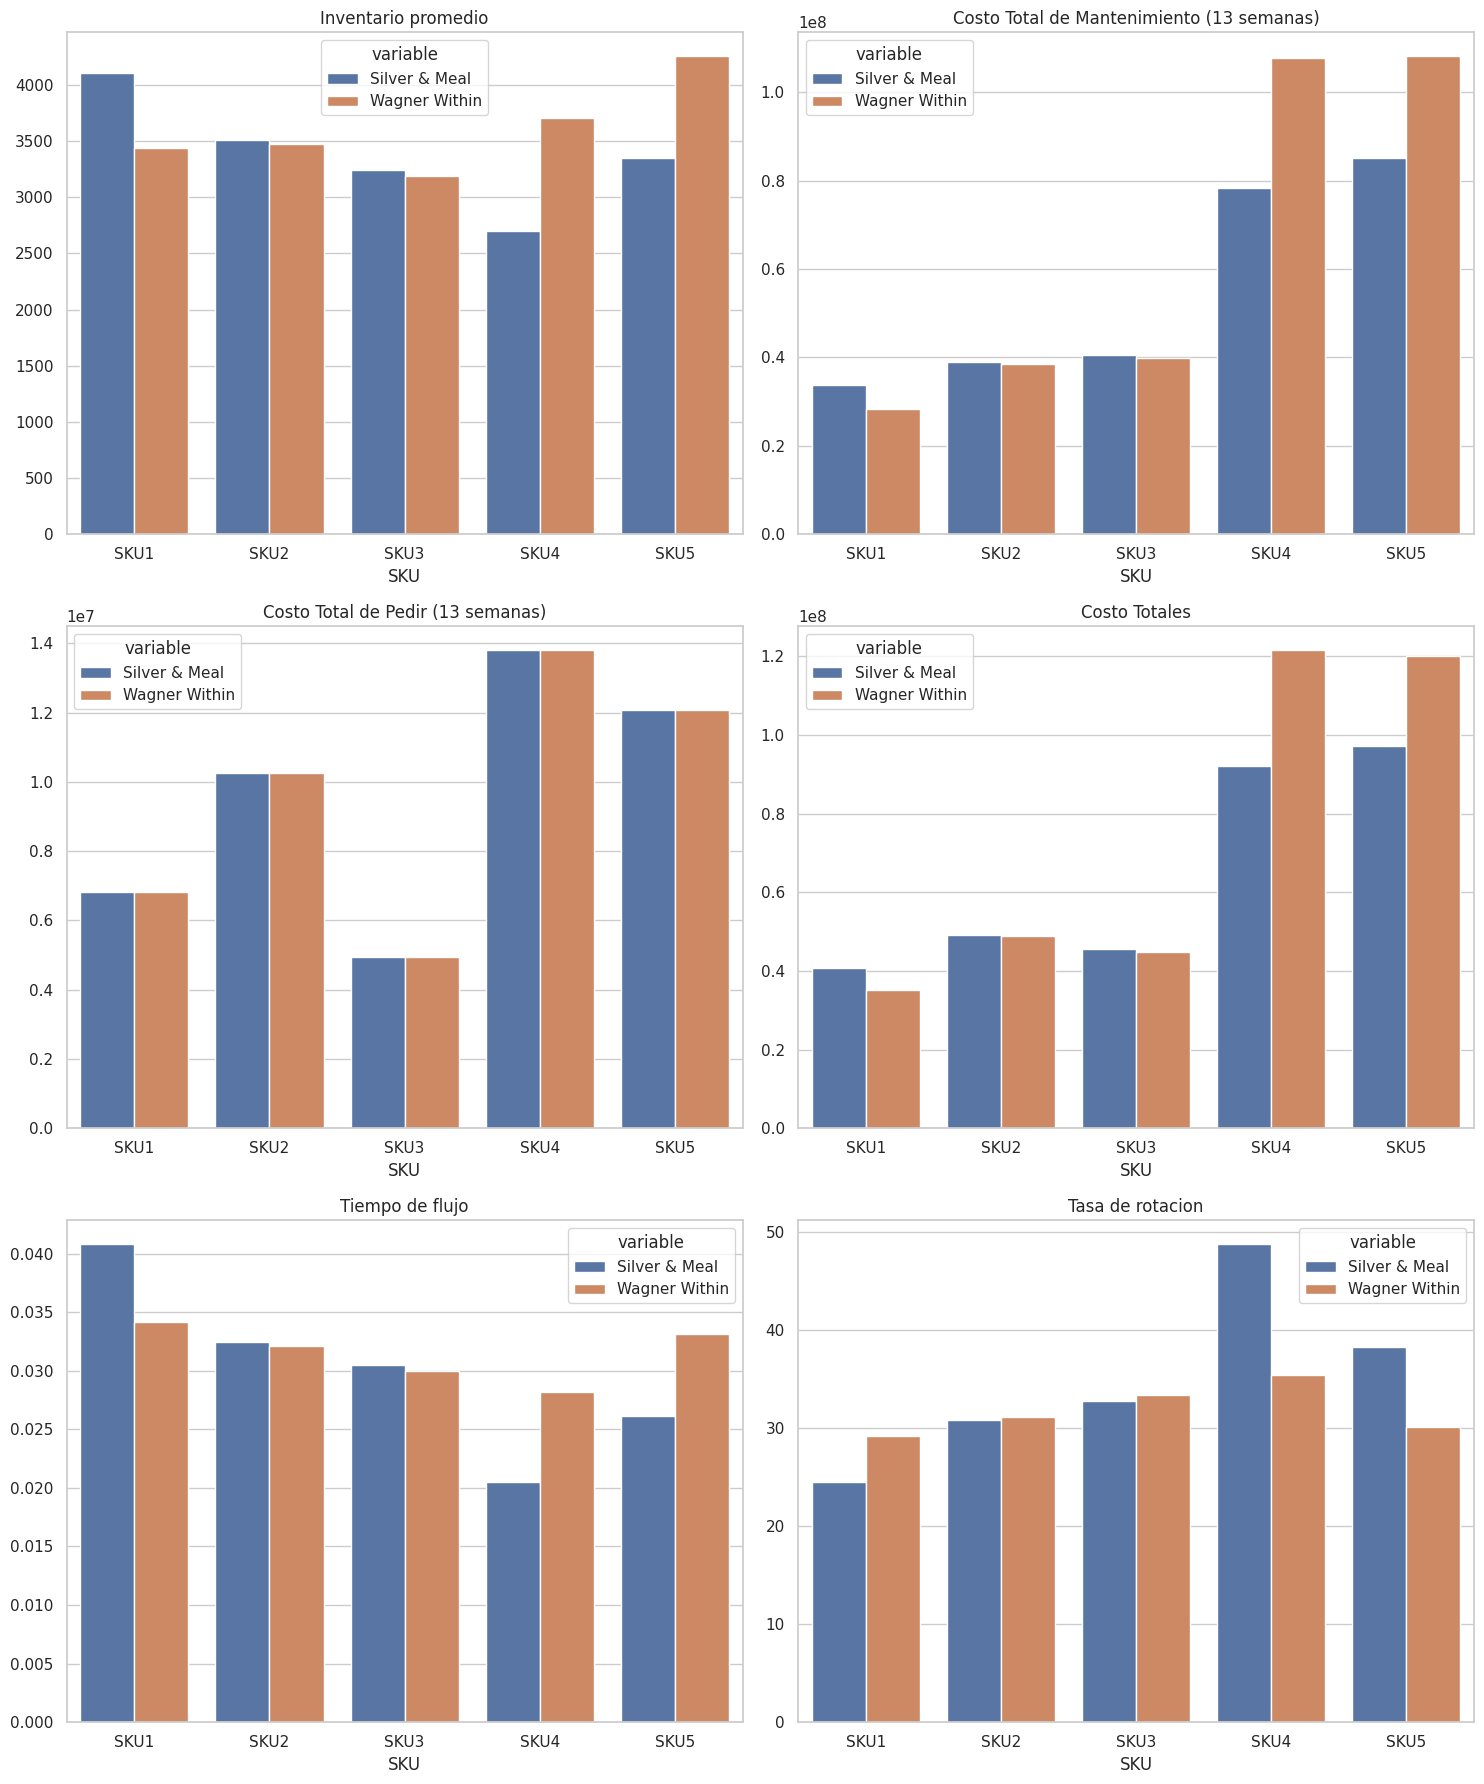

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Datos para Silver & Meal (primera imagen)
data_sm = {
    'SKU': ['SKU1', 'SKU2', 'SKU3', 'SKU4', 'SKU5'],
    'Inventario promedio': [4102.837527, 3508.661981, 3243.050207, 2697.213629, 3350.487339],
    'Costo Total de Mantenimiento (13 semanas)': [3.384396e+07, 3.893672e+07, 4.063365e+07, 7.837159e+07, 8.515297e+07],
    'Costo Total de Pedir (13 semanas)': [6831720.0, 10249220.0, 4943200.0, 13804800.0, 12070800.0],
    'Costo Totales': [4.067568e+07, 4.918594e+07, 4.557685e+07, 9.217639e+07, 9.722377e+07],
    'Tiempo de flujo': [0.040795, 0.032429, 0.030481, 0.020507, 0.026107],
    'Tasa de rotacion': [24.512548, 30.836826, 32.807386, 48.763657, 38.304278]
}

# Datos para Wagner Within (segunda imagen)
data_ww = {
    'SKU': ['SKU1', 'SKU2', 'SKU3', 'SKU4', 'SKU5'],
    'Inventario promedio': [3438.744444, 3476.455556, 3191.311111, 3708.844444, 4255.477778],
    'Costo Total de Mantenimiento (13 semanas)': [2.836591e+07, 3.857931e+07, 3.998539e+07, 1.077660e+08, 1.081534e+08],
    'Costo Total de Pedir (13 semanas)': [6831720.0, 10249220.0, 4943200.0, 13804800.0, 12070800.0],
    'Costo Totales': [3.519763e+07, 4.882853e+07, 4.492859e+07, 1.215708e+08, 1.202242e+08],
    'Tiempo de flujo': [0.034192, 0.032131, 0.029995, 0.028199, 0.033158],
    'Tasa de rotacion': [29.246430, 31.122503, 33.339275, 35.462798, 30.158306]
}

df_sm = pd.DataFrame(data_sm)
df_ww = pd.DataFrame(data_ww)

# Reestructurar los datos para facilitar el plot con seaborn
df_sm_melted = df_sm.melt(id_vars='SKU', var_name='Métrica', value_name='Silver & Meal')
df_ww_melted = df_ww.melt(id_vars='SKU', var_name='Métrica', value_name='Wagner Within')

# Unir los dos datasets basados en SKU y Métrica
df_merged = pd.merge(df_sm_melted, df_ww_melted, on=['SKU', 'Métrica'])

# Crear los gráficos
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 2, figsize=(15, 18))

metricas = df_merged['Métrica'].unique()
for i, metrica in enumerate(metricas):
    ax = axes[i//2, i%2]
    sns.barplot(x='SKU', y='value', hue='variable', data=pd.melt(df_merged[df_merged['Métrica'] == metrica], id_vars=['SKU', 'Métrica']), ax=ax)
    ax.set_title(metrica)
    ax.set_ylabel('')
    ax.set_xlabel('SKU')

plt.tight_layout()
plt.show()


## Familia 3

### SKU 7

In [ ]:
  #Se ingresa la base de datos
df7 = pd.read_excel("/content/drive/MyDrive/Operaciones I/Base de datos/sku 7.xlsx")
df7

,SKU,Semana,Demanda
0,SKU7,1,2165
1,SKU7,2,2179
2,SKU7,3,2215
3,SKU7,4,2418
4,SKU7,5,2169
...,...,...,...
85,SKU7,86,966
86,SKU7,87,156
87,SKU7,88,685
88,SKU7,89,951


Resultados del pronóstico para las próximas 13 semanas:
     Semana     Demanda
90       91  770.189648
91       92  746.436616
92       93  815.585695
93       94  631.691013
94       95  544.145322
95       96  602.595414
96       97  595.434760
97       98  426.904918
98       99  397.970754
99      100  356.705468
100     101  422.419159
101     102  436.553013
102     103  637.561667


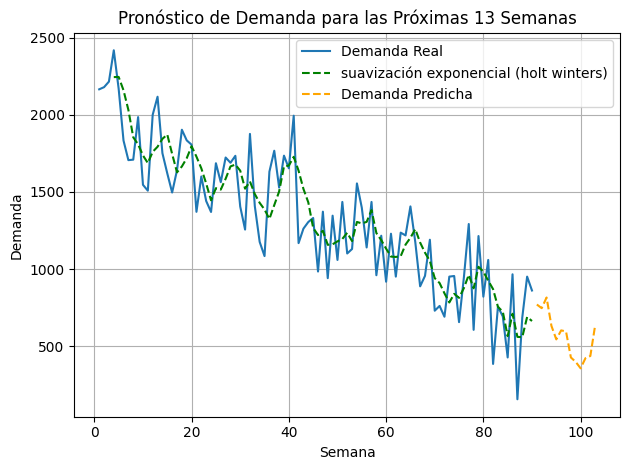

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing


# Calcular el promedio móvil simple (SMA)
window_size = 4
df7['suavización exponencial (holt winters)'] = df7['Demanda'].rolling(window=window_size).mean()

# Configuración del modelo de Holt-Winters
model = ExponentialSmoothing(df7['Demanda'], trend='add', seasonal='add', seasonal_periods=13)
fit = model.fit()

# Pronosticar las próximas 13 semanas
n_weeks_forecast = 13
forecast = fit.forecast(steps=n_weeks_forecast)

# Crear un DataFrame con los pronósticos
last_week = df7['Semana'].max()
forecast_weeks = list(range(last_week + 1, last_week + 1 + n_weeks_forecast))
forecast_df7 = pd.DataFrame({
    'SKU' : 'SKU 7',
    'Semana': forecast_weeks,
    'Demanda': forecast
})

# Imprimir los resultados del pronóstico
print("Resultados del pronóstico para las próximas 13 semanas:")
print(forecast_df7[['Semana', 'Demanda']])

# Combinar los datos reales con los pronósticos
combined_df7 = pd.concat([df7, forecast_df7], ignore_index=True)

# Graficar los resultados
plt.plot(df7['Semana'], df7['Demanda'], label='Demanda Real')
plt.plot(df7['Semana'], df7['suavización exponencial (holt winters)'], label='suavización exponencial (holt winters)', linestyle='--', color='green')
plt.plot(forecast_df7['Semana'], forecast_df7['Demanda'], label='Demanda Predicha', linestyle='--', color='orange')

plt.title("Pronóstico de Demanda para las Próximas 13 Semanas")
plt.xlabel("Semana")
plt.ylabel("Demanda")
plt.legend()

plt.tight_layout()
plt.grid()
plt.show()


In [ ]:
from scipy.stats import norm

# Supuestos
D = combined_df7['Demanda'].mean()  # Demanda promedio
σ_D = combined_df7['Demanda'].std()  # Desviación estándar de la demanda
L = 1  # Tiempo de entrega en semanas (supuesto)
Q = 8910  # Tamaño del lote (supuesto)
CSL = 0.95  # Nivel de servicio del ciclo (95%)

# Calcular el inventario de seguridad (ss)
D_L = D * L
σ_L = np.sqrt(L) * σ_D
z = norm.ppf(CSL)
ss = z * σ_L

# Calcular el punto de reorden (ROP)
ROP = D_L + ss

# Calcular el inventario de ciclo (CI)
CI = Q / 2

# Calcular el inventario promedio (WIP)
WIP = ss + CI

# Calcular el flujo de tiempo promedio (AFT)
AFT = WIP / D

# Imprimir los resultados
print(f"El stock de seguridad es {ss:.2f} unidades")
print(f"El inventario promedio por ciclo es {CI:.2f} unidades")
print(f"El inventario promedio es {WIP:.2f} unidades")
print(f"El tiempo de flujo promedio es de {AFT:.2f} semanas")

# Estimar los costos
costo_ordenar = 50  # Costo por orden (supuesto)
costo_mantener = 2  # Costo por unidad por semana (supuesto)
costo_faltante = 10  # Costo por unidad faltante (supuesto)

# Calcular el costo total
costo_total_ordenar = (D / Q) * costo_ordenar
costo_total_mantener = WIP * costo_mantener
ESC = (1 - CSL) * Q  # Escasez esperada por ciclo de reabastecimiento
costo_total_faltante = ESC * costo_faltante

costo_total = costo_total_ordenar + costo_total_mantener + costo_total_faltante

# Imprimir los resultados de costos
print(f"Costo total de ordenar: ${costo_total_ordenar:.2f}")
print(f"Costo total de mantener: ${costo_total_mantener:.2f}")
print(f"Costo total de faltantes: ${costo_total_faltante:.2f}")
print(f"Costo total: ${costo_total:.2f}")


El stock de seguridad es 823.20 unidades
El inventario promedio por ciclo es 4455.00 unidades
El inventario promedio es 5278.20 unidades
El tiempo de flujo promedio es de 4.26 semanas
Costo total de ordenar: $6.95
Costo total de mantener: $10556.40
Costo total de faltantes: $4455.00
Costo total: $15018.35


### SKU 8

In [ ]:
  #Se ingresa la base de datos
df8 = pd.read_excel("/content/drive/MyDrive/Operaciones I/Base de datos/sku 8.xlsx")
df8

,SKU,Semana,Demanda
0,SKU8,1,1840
1,SKU8,2,2164
2,SKU8,3,1902
3,SKU8,4,2626
4,SKU8,5,1535
...,...,...,...
85,SKU8,86,925
86,SKU8,87,903
87,SKU8,88,297
88,SKU8,89,804


    SKU  Semana  Demanda  holt winters
0  SKU8       1     1840           NaN
1  SKU8       2     2164           NaN
2  SKU8       3     1902           NaN
3  SKU8       4     2626       2133.00
4  SKU8       5     1535       2056.75
Resultados del pronóstico para las próximas 13 semanas:
     Semana     Demanda
90       91  788.756249
91       92  677.162077
92       93  805.826670
93       94  463.364065
94       95  506.207013
95       96  681.359017
96       97  627.512517
97       98  612.415554
98       99  442.079437
99      100  608.336869
100     101  446.799009
101     102  464.412176
102     103  370.906176


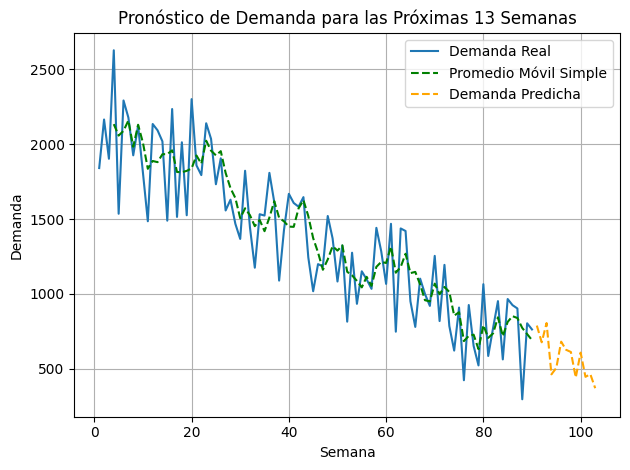

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Verificar la estructura del DataFrame
print(df8.head())

# Calcular el promedio móvil simple (SMA)
window_size = 4
df8['holt winters'] = df8['Demanda'].rolling(window=window_size).mean()

# Configuración del modelo de Holt-Winters
model = ExponentialSmoothing(df8['Demanda'], trend='add', seasonal='add', seasonal_periods=14)
fit = model.fit()

# Pronosticar las próximas 13 semanas
n_weeks_forecast = 13
forecast = fit.forecast(steps=n_weeks_forecast)

# Crear un DataFrame con los pronósticos
last_week = df8['Semana'].max()
forecast_weeks = list(range(last_week + 1, last_week + 1 + n_weeks_forecast))
forecast_df8 = pd.DataFrame({
    'Semana': forecast_weeks,
    'Demanda': forecast
})

# Imprimir los resultados del pronóstico
print("Resultados del pronóstico para las próximas 13 semanas:")
print(forecast_df8[['Semana', 'Demanda']])

# Combinar los datos reales con los pronósticos
combined_df8 = pd.concat([df8, forecast_df8], ignore_index=True)

# Graficar los resultados
plt.plot(df8['Semana'], df8['Demanda'], label='Demanda Real')
plt.plot(df8['Semana'], df8['holt winters'], label='Promedio Móvil Simple', linestyle='--', color='green')
plt.plot(forecast_df8['Semana'], forecast_df8['Demanda'], label='Demanda Predicha', linestyle='--', color='orange')

plt.title("Pronóstico de Demanda para las Próximas 13 Semanas")
plt.xlabel("Semana")
plt.ylabel("Demanda")
plt.legend()

plt.tight_layout()
plt.grid()
plt.show()


In [ ]:
from scipy.stats import norm

# Supuestos
D = combined_df8['Demanda'].mean()  # Demanda promedio
σ_D = combined_df8['Demanda'].std()  # Desviación estándar de la demanda
L = 1  # Tiempo de entrega en semanas (supuesto)
Q = 7282  # Tamaño del lote (supuesto)
CSL = 0.95  # Nivel de servicio del ciclo (95%)

# Calcular el inventario de seguridad (ss)
D_L = D * L
σ_L = np.sqrt(L) * σ_D
z = norm.ppf(CSL)
ss = z * σ_L

# Calcular el punto de reorden (ROP)
ROP = D_L + ss

# Calcular el inventario de ciclo (CI)
CI = Q / 2

# Calcular el inventario promedio (WIP)
WIP = ss + CI

# Calcular el flujo de tiempo promedio (AFT)
AFT = WIP / D

# Imprimir los resultados
print(f"El stock de seguridad es {ss:.2f} unidades")
print(f"El inventario promedio por ciclo es {CI:.2f} unidades")
print(f"El inventario promedio es {WIP:.2f} unidades")
print(f"El tiempo de flujo promedio es de {AFT:.2f} semanas")

# Estimar los costos
costo_ordenar = 50  # Costo por orden (supuesto)
costo_mantener = 2  # Costo por unidad por semana (supuesto)
costo_faltante = 10  # Costo por unidad faltante (supuesto)

# Calcular el costo total
costo_total_ordenar = (D / Q) * costo_ordenar
costo_total_mantener = WIP * costo_mantener
ESC = (1 - CSL) * Q  # Escasez esperada por ciclo de reabastecimiento
costo_total_faltante = ESC * costo_faltante

costo_total = costo_total_ordenar + costo_total_mantener + costo_total_faltante

# Imprimir los resultados de costos
print(f"Costo total de ordenar: ${costo_total_ordenar:.2f}")
print(f"Costo total de mantener: ${costo_total_mantener:.2f}")
print(f"Costo total de faltantes: ${costo_total_faltante:.2f}")
print(f"Costo total: ${costo_total:.2f}")


El stock de seguridad es 906.73 unidades
El inventario promedio por ciclo es 3641.00 unidades
El inventario promedio es 4547.73 unidades
El tiempo de flujo promedio es de 3.61 semanas
Costo total de ordenar: $8.65
Costo total de mantener: $9095.45
Costo total de faltantes: $3641.00
Costo total: $12745.10


### SKU 9

In [ ]:
  #Se ingresa la base de datos
df9 = pd.read_excel("/content/drive/MyDrive/Operaciones I/Base de datos/sku 9.xlsx")
df9

,SKU,Semana,Demanda
0,SKU9,1,1761
1,SKU9,2,2033
2,SKU9,3,1966
3,SKU9,4,1636
4,SKU9,5,1827
...,...,...,...
85,SKU9,86,303
86,SKU9,87,474
87,SKU9,88,889
88,SKU9,89,608


    SKU  Semana  Demanda
0  SKU9       1     1761
1  SKU9       2     2033
2  SKU9       3     1966
3  SKU9       4     1636
4  SKU9       5     1827
Resultados del pronóstico para las próximas 13 semanas:
     Semana     Demanda
90       91  821.949145
91       92  660.807838
92       93  788.554510
93       94  516.671085
94       95  674.896570
95       96  711.904442
96       97  400.788063
97       98  587.295038
98       99  601.738767
99      100  459.669719
100     101  467.002777
101     102  459.321048
102     103  561.939691


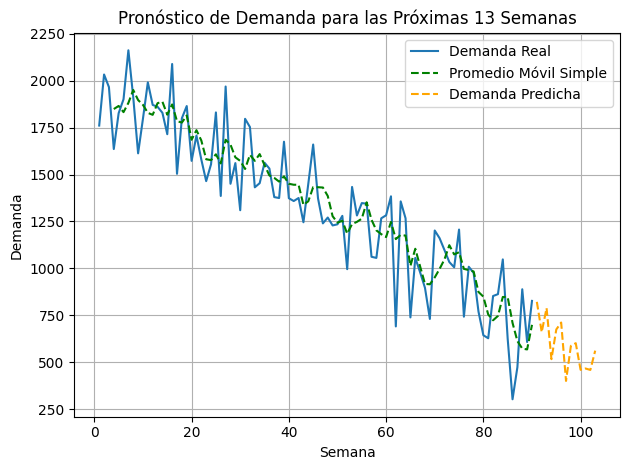

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Verificar la estructura del DataFrame
print(df9.head())

# Calcular el promedio móvil simple (SMA)
window_size = 4
df9['holt winters'] = df9['Demanda'].rolling(window=window_size).mean()

# Configuración del modelo de Holt-Winters
model = ExponentialSmoothing(df9['Demanda'], trend='add', seasonal='add', seasonal_periods=16)
fit = model.fit()

# Pronosticar las próximas 13 semanas
n_weeks_forecast = 13
forecast = fit.forecast(steps=n_weeks_forecast)

# Crear un DataFrame con los pronósticos
last_week = df9['Semana'].max()
forecast_weeks = list(range(last_week + 1, last_week + 1 + n_weeks_forecast))
forecast_df9 = pd.DataFrame({
    'Semana': forecast_weeks,
    'Demanda': forecast
})

# Imprimir los resultados del pronóstico
print("Resultados del pronóstico para las próximas 13 semanas:")
print(forecast_df9[['Semana', 'Demanda']])

# Combinar los datos reales con los pronósticos
combined_df9 = pd.concat([df9, forecast_df9], ignore_index=True)

# Graficar los resultados
plt.plot(df9['Semana'], df9['Demanda'], label='Demanda Real')
plt.plot(df9['Semana'], df9['holt winters'], label='Promedio Móvil Simple', linestyle='--', color='green')
plt.plot(forecast_df9['Semana'], forecast_df9['Demanda'], label='Demanda Predicha', linestyle='--', color='orange')

plt.title("Pronóstico de Demanda para las Próximas 13 Semanas")
plt.xlabel("Semana")
plt.ylabel("Demanda")
plt.legend()

plt.tight_layout()
plt.grid()
plt.show()

In [ ]:
from scipy.stats import norm

# Supuestos
D = combined_df9['Demanda'].mean()  # Demanda promedio
σ_D = combined_df9['Demanda'].std()  # Desviación estándar de la demanda
L = 1  # Tiempo de entrega en semanas (supuesto)
Q = 6284  # Tamaño del lote (supuesto)
CSL = 0.95  # Nivel de servicio del ciclo (95%)

# Calcular el inventario de seguridad (ss)
D_L = D * L
σ_L = np.sqrt(L) * σ_D
z = norm.ppf(CSL)
ss = z * σ_L

# Calcular el punto de reorden (ROP)
ROP = D_L + ss

# Calcular el inventario de ciclo (CI)
CI = Q / 2

# Calcular el inventario promedio (WIP)
WIP = ss + CI

# Calcular el flujo de tiempo promedio (AFT)
AFT = WIP / D

# Imprimir los resultados
print(f"El stock de seguridad es {ss:.2f} unidades")
print(f"El inventario promedio por ciclo es {CI:.2f} unidades")
print(f"El inventario promedio es {WIP:.2f} unidades")
print(f"El tiempo de flujo promedio es de {AFT:.2f} semanas")

# Estimar los costos
costo_ordenar = 50  # Costo por orden (supuesto)
costo_mantener = 2  # Costo por unidad por semana (supuesto)
costo_faltante = 10  # Costo por unidad faltante (supuesto)

# Calcular el costo total
costo_total_ordenar = (D / Q) * costo_ordenar
costo_total_mantener = WIP * costo_mantener
ESC = (1 - CSL) * Q  # Escasez esperada por ciclo de reabastecimiento
costo_total_faltante = ESC * costo_faltante

costo_total = costo_total_ordenar + costo_total_mantener + costo_total_faltante

# Imprimir los resultados de costos
print(f"Costo total de ordenar: ${costo_total_ordenar:.2f}")
print(f"Costo total de mantener: ${costo_total_mantener:.2f}")
print(f"Costo total de faltantes: ${costo_total_faltante:.2f}")
print(f"Costo total: ${costo_total:.2f}")


El stock de seguridad es 759.70 unidades
El inventario promedio por ciclo es 3142.00 unidades
El inventario promedio es 3901.70 unidades
El tiempo de flujo promedio es de 3.13 semanas
Costo total de ordenar: $9.92
Costo total de mantener: $7803.39
Costo total de faltantes: $3142.00
Costo total: $10955.31


## Familia 4

### SKU 10

In [ ]:
  #Se ingresa la base de datos
df10 = pd.read_excel("/content/drive/MyDrive/Operaciones I/Base de datos/sku 10.xlsx")
df10

,SKU,Semana,Demanda
0,SKU10,1,1288
1,SKU10,2,1312
2,SKU10,3,1748
3,SKU10,4,1500
4,SKU10,5,1511
...,...,...,...
85,SKU10,86,740
86,SKU10,87,529
87,SKU10,88,709
88,SKU10,89,461


    SKU  Semana  Demanda  holt winters  promedio_movil_simple
0  SKU7       1     2165           NaN                    NaN
1  SKU7       2     2179           NaN                    NaN
2  SKU7       3     2215           NaN                    NaN
3  SKU7       4     2418       2244.25                2244.25
4  SKU7       5     2169       2245.25                2245.25
Resultados del pronóstico para las próximas 13 semanas:
     Semana     Demanda
90       91  572.712926
91       92  635.667387
92       93  769.671738
93       94  426.816775
94       95  541.683983
95       96  538.091577
96       97  615.670759
97       98  475.978623
98       99  468.528515
99      100  530.457031
100     101  502.481465
101     102  497.545778
102     103  443.388661


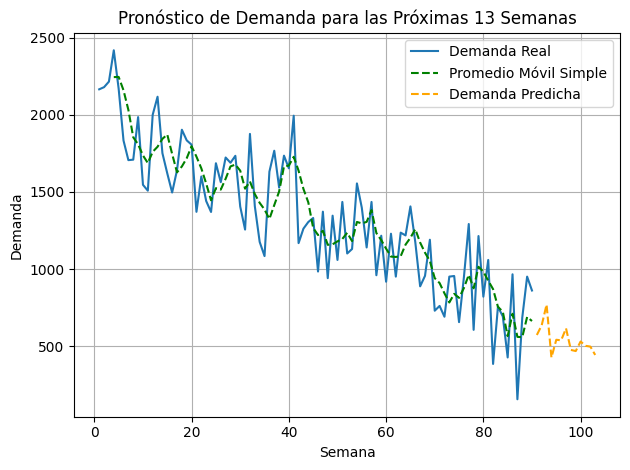

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing


# Verificar la estructura del DataFrame
print(df10.head())

# Calcular el promedio móvil simple (SMA)
window_size = 4
df10['promedio_movil_simple'] = df10['Demanda'].rolling(window=window_size).mean()

# Configuración del modelo de Holt-Winters
model = ExponentialSmoothing(df10['Demanda'], trend='add', seasonal='add', seasonal_periods=16)
fit = model.fit()

# Pronosticar las próximas 13 semanas
n_weeks_forecast = 13
forecast = fit.forecast(steps=n_weeks_forecast)

# Crear un DataFrame con los pronósticos
last_week = df10['Semana'].max()
forecast_weeks = list(range(last_week + 1, last_week + 1 + n_weeks_forecast))
forecast_df10 = pd.DataFrame({
    'Semana': forecast_weeks,
    'Demanda': forecast
})

# Imprimir los resultados del pronóstico
print("Resultados del pronóstico para las próximas 13 semanas:")
print(forecast_df10[['Semana', 'Demanda']])

# Combinar los datos reales con los pronósticos
combined_df10 = pd.concat([df10, forecast_df10], ignore_index=True)

# Graficar los resultados
plt.plot(df10['Semana'], df10['Demanda'], label='Demanda Real')
plt.plot(df10['Semana'], df10['promedio_movil_simple'], label='Promedio Móvil Simple', linestyle='--', color='green')
plt.plot(forecast_df10['Semana'], forecast_df10['Demanda'], label='Demanda Predicha', linestyle='--', color='orange')

plt.title("Pronóstico de Demanda para las Próximas 13 Semanas")
plt.xlabel("Semana")
plt.ylabel("Demanda")
plt.legend()

plt.tight_layout()
plt.grid()
plt.show()


### SKU 11

In [ ]:
  #Se ingresa la base de datos
df11 = pd.read_excel("/content/drive/MyDrive/Operaciones I/Base de datos/sku 11.xlsx")
df11

,SKU,Semana,Demanda
0,SKU11,1,1206
1,SKU11,2,1361
2,SKU11,3,1433
3,SKU11,4,1535
4,SKU11,5,1615
...,...,...,...
85,SKU11,86,588
86,SKU11,87,848
87,SKU11,88,545
88,SKU11,89,657


     SKU  Semana  Demanda  promedio_movil_simple
0  SKU11       1     1206                    NaN
1  SKU11       2     1361                    NaN
2  SKU11       3     1433                    NaN
3  SKU11       4     1535                1383.75
4  SKU11       5     1615                1486.00
Resultados del pronóstico para las próximas 13 semanas:
     Semana     Demanda
90       91  514.860483
91       92  418.965200
92       93  387.733504
93       94  297.171593
94       95  396.971685
95       96  124.945590
96       97   82.451932
97       98   74.905645
98       99   56.386504
99      100  -12.579588
100     101  -32.309263
101     102 -116.116845
102     103  -50.367010


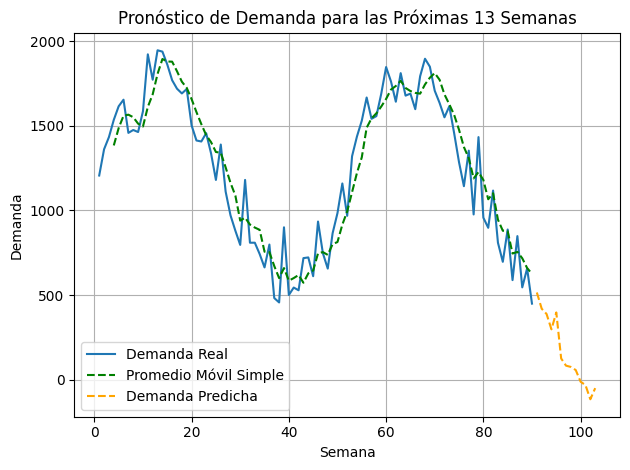

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing


# Verificar la estructura del DataFrame
print(df11.head())

# Calcular el promedio móvil simple (SMA)
window_size = 4
df11['promedio_movil_simple'] = df11['Demanda'].rolling(window=window_size).mean()

# Configuración del modelo de Holt-Winters
model = ExponentialSmoothing(df11['Demanda'], trend='add', seasonal='add', seasonal_periods=16)
fit = model.fit()

# Pronosticar las próximas 13 semanas
n_weeks_forecast = 13
forecast = fit.forecast(steps=n_weeks_forecast)

# Crear un DataFrame con los pronósticos
last_week = df11['Semana'].max()
forecast_weeks = list(range(last_week + 1, last_week + 1 + n_weeks_forecast))
forecast_df11 = pd.DataFrame({
    'Semana': forecast_weeks,
    'Demanda': forecast
})

# Imprimir los resultados del pronóstico
print("Resultados del pronóstico para las próximas 13 semanas:")
print(forecast_df11[['Semana', 'Demanda']])

# Combinar los datos reales con los pronósticos
combined_df11 = pd.concat([df11, forecast_df11], ignore_index=True)

# Graficar los resultados
plt.plot(df11['Semana'], df11['Demanda'], label='Demanda Real')
plt.plot(df11['Semana'], df11['promedio_movil_simple'], label='Promedio Móvil Simple', linestyle='--', color='green')
plt.plot(forecast_df11['Semana'], forecast_df11['Demanda'], label='Demanda Predicha', linestyle='--', color='orange')

plt.title("Pronóstico de Demanda para las Próximas 13 Semanas")
plt.xlabel("Semana")
plt.ylabel("Demanda")
plt.legend()

plt.tight_layout()
plt.grid()
plt.show()

### SKU 12

In [ ]:
#Se ingresa la base de datos
df12 = pd.read_excel("/content/drive/MyDrive/Operaciones I/Base de datos/sku 12.xlsx")
df12

,SKU,Semana,Demanda
0,SKU12,1,1379
1,SKU12,2,1365
2,SKU12,3,1341
3,SKU12,4,1424
4,SKU12,5,1663
...,...,...,...
85,SKU12,86,690
86,SKU12,87,675
87,SKU12,88,739
88,SKU12,89,499


     SKU  Semana  Demanda
0  SKU12       1     1379
1  SKU12       2     1365
2  SKU12       3     1341
3  SKU12       4     1424
4  SKU12       5     1663
Resultados del pronóstico para las próximas 13 semanas:
     Semana     Demanda
90       91  440.893768
91       92  365.959352
92       93  441.791699
93       94  407.364353
94       95  114.643467
95       96   58.533072
96       97   54.922141
97       98   -1.400796
98       99  -83.456484
99      100  -60.388803
100     101 -129.586973
101     102 -215.709701
102     103 -217.740786


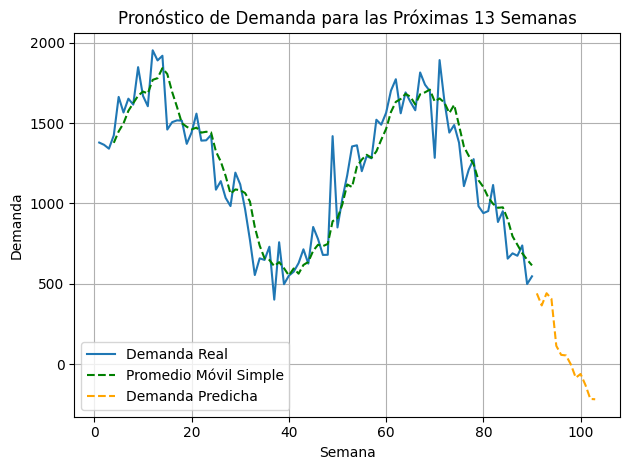

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing


# Verificar la estructura del DataFrame
print(df12.head())

# Calcular el promedio móvil simple (SMA)
window_size = 4
df12['promedio_movil_simple'] = df12['Demanda'].rolling(window=window_size).mean()

# Configuración del modelo de Holt-Winters
model = ExponentialSmoothing(df12['Demanda'], trend='add', seasonal='add', seasonal_periods=16)
fit = model.fit()

# Pronosticar las próximas 13 semanas
n_weeks_forecast = 13
forecast = fit.forecast(steps=n_weeks_forecast)

# Crear un DataFrame con los pronósticos
last_week = df12['Semana'].max()
forecast_weeks = list(range(last_week + 1, last_week + 1 + n_weeks_forecast))
forecast_df12 = pd.DataFrame({
    'Semana': forecast_weeks,
    'Demanda': forecast
})

# Imprimir los resultados del pronóstico
print("Resultados del pronóstico para las próximas 13 semanas:")
print(forecast_df12[['Semana', 'Demanda']])

# Combinar los datos reales con los pronósticos
combined_df12 = pd.concat([df12, forecast_df12], ignore_index=True)

# Graficar los resultados
plt.plot(df12['Semana'], df12['Demanda'], label='Demanda Real')
plt.plot(df12['Semana'], df12['promedio_movil_simple'], label='Promedio Móvil Simple', linestyle='--', color='green')
plt.plot(forecast_df12['Semana'], forecast_df12['Demanda'], label='Demanda Predicha', linestyle='--', color='orange')

plt.title("Pronóstico de Demanda para las Próximas 13 Semanas")
plt.xlabel("Semana")
plt.ylabel("Demanda")
plt.legend()

plt.tight_layout()
plt.grid()
plt.show()